In [1]:
import h3
import geopandas as gpd
import h3pandas
import matplotlib.pyplot as plt
import pandas as pd
import shapely
shapely.speedups.disable()
from shapely.ops import unary_union
from shapely.geometry import mapping, Polygon
import pandas as pd
import plotly.express as px
import geopandas as gpd
import pyproj
from shapely import wkt
import geopandas  as gpd
import matplotlib.pyplot as plt
import pandas
import libpysal
from tobler.util import h3fy
from tobler.area_weighted import area_interpolate
import contextily as ctx
from cenpy import products
from sklearn.neighbors import BallTree
import numpy as np
from scipy.spatial.distance import cdist
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc = {'figure.figsize':(15,8)})

# Adding in Python Data and creating Hex Grids 

In [2]:
pythons = pd.read_csv('Mangiapane_Gianluca_PythonPredictor/raw_data/PythonSightings.csv')
pythons['ObsDate'] = pd.to_datetime(pythons['ObsDate'], format='%m/%d/%Y')
pythons1620 = pythons.loc[(pythons['ObsDate'] >= '01/01/2016') & (pythons['ObsDate'] < '01/01/2021')]
pythons1620 = pythons1620[['objectid', 'ObsDate', 'Latitude','Longitude']]
pythons1620.dropna(inplace=True)

In [3]:
pythons1620

,objectid,ObsDate,Latitude,Longitude
2244,4455294,2016-01-17,26.09410,-80.51183
2245,4455354,2016-01-20,25.50858,-80.55805
2246,4456193,2016-01-26,26.70519,-81.74914
2247,4456212,2016-01-26,26.85639,-82.00524
2248,4457001,2016-01-30,25.46334,-80.33154
...,...,...,...,...
7526,8821451,2020-09-21,28.27322,-81.62104
7527,8821481,2020-07-18,27.63630,-81.82753
7528,8821693,2020-12-04,26.85742,-82.21788
7532,9319776,2017-01-23,25.76230,-80.82164


In [4]:
pythons1620["ObsDate"] = pythons1620["ObsDate"].dt.strftime("%B")

In [5]:
pythons1620

,objectid,ObsDate,Latitude,Longitude
2244,4455294,January,26.09410,-80.51183
2245,4455354,January,25.50858,-80.55805
2246,4456193,January,26.70519,-81.74914
2247,4456212,January,26.85639,-82.00524
2248,4457001,January,25.46334,-80.33154
...,...,...,...,...
7526,8821451,September,28.27322,-81.62104
7527,8821481,July,27.63630,-81.82753
7528,8821693,December,26.85742,-82.21788
7532,9319776,January,25.76230,-80.82164


In [6]:
geoPython1620 = gpd.GeoDataFrame(pythons1620, geometry=gpd.points_from_xy(pythons1620.Longitude, pythons1620.Latitude))
geoPython1620 = geoPython1620.set_crs(epsg=4326, inplace=True)
geoPython1620

,objectid,ObsDate,Latitude,Longitude,geometry
2244,4455294,January,26.09410,-80.51183,POINT (-80.51183 26.09410)
2245,4455354,January,25.50858,-80.55805,POINT (-80.55805 25.50858)
2246,4456193,January,26.70519,-81.74914,POINT (-81.74914 26.70519)
2247,4456212,January,26.85639,-82.00524,POINT (-82.00524 26.85639)
2248,4457001,January,25.46334,-80.33154,POINT (-80.33154 25.46334)
...,...,...,...,...,...
7526,8821451,September,28.27322,-81.62104,POINT (-81.62104 28.27322)
7527,8821481,July,27.63630,-81.82753,POINT (-81.82753 27.63630)
7528,8821693,December,26.85742,-82.21788,POINT (-82.21788 26.85742)
7532,9319776,January,25.76230,-80.82164,POINT (-80.82164 25.76230)


In [7]:
counties = gpd.read_file('Mangiapane_Gianluca_PythonPredictor/raw_data/geojson-fl-counties-fips.json')
counties = counties.to_crs(epsg=4326)
counties

,id,GEO_ID,STATE,COUNTY,NAME,LSAD,CENSUSAREA,geometry
0,12083,0500000US12083,12,083,Marion,County,1584.546,"POLYGON ((-82.31170 28.96039, -82.42700 29.021..."
1,12087,0500000US12087,12,087,Monroe,County,983.282,"MULTIPOLYGON (((-80.25058 25.34193, -80.25492 ..."
2,12095,0500000US12095,12,095,Orange,County,903.429,"POLYGON ((-81.65739 28.55312, -81.65811 28.682..."
3,12111,0500000US12111,12,111,St. Lucie,County,571.926,"POLYGON ((-80.67786 27.20599, -80.67861 27.448..."
4,12119,0500000US12119,12,119,Sumter,County,546.933,"POLYGON ((-81.95419 28.96005, -81.95358 28.820..."
...,...,...,...,...,...,...,...,...
62,12065,0500000US12065,12,065,Jefferson,County,598.095,"POLYGON ((-84.00739 30.67210, -83.88032 30.665..."
63,12009,0500000US12009,12,009,Brevard,County,1015.664,"POLYGON ((-80.63131 28.65519, -80.61679 28.634..."
64,12075,0500000US12075,12,075,Levy,County,1118.206,"POLYGON ((-82.40515 29.33026, -82.40459 29.278..."
65,12021,0500000US12021,12,021,Collier,County,1998.324,"POLYGON ((-81.56376 26.51332, -81.27177 26.517..."


In [8]:
joined = gpd.sjoin(geoPython1620, counties, op='within', how='left')

joined

,objectid,ObsDate,Latitude,Longitude,geometry,index_right,id,GEO_ID,STATE,COUNTY,NAME,LSAD,CENSUSAREA
2244,4455294,January,26.09410,-80.51183,POINT (-80.51183 26.09410),27.0,12011,0500000US12011,12,011,Broward,County,1209.785
2245,4455354,January,25.50858,-80.55805,POINT (-80.55805 25.50858),57.0,12086,0500000US12086,12,086,Miami-Dade,County,1897.716
2246,4456193,January,26.70519,-81.74914,POINT (-81.74914 26.70519),29.0,12071,0500000US12071,12,071,Lee,County,784.513
2247,4456212,January,26.85639,-82.00524,POINT (-82.00524 26.85639),28.0,12015,0500000US12015,12,015,Charlotte,County,680.279
2248,4457001,January,25.46334,-80.33154,POINT (-80.33154 25.46334),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7526,8821451,September,28.27322,-81.62104,POINT (-81.62104 28.27322),15.0,12097,0500000US12097,12,097,Osceola,County,1327.453
7527,8821481,July,27.63630,-81.82753,POINT (-81.82753 27.63630),38.0,12049,0500000US12049,12,049,Hardee,County,637.783
7528,8821693,December,26.85742,-82.21788,POINT (-82.21788 26.85742),28.0,12015,0500000US12015,12,015,Charlotte,County,680.279
7532,9319776,January,25.76230,-80.82164,POINT (-80.82164 25.76230),57.0,12086,0500000US12086,12,086,Miami-Dade,County,1897.716


In [9]:
grouped = joined.groupby('NAME', as_index=False)

count = grouped.agg(pythonCount=('objectid','count'))
count.sort_values(by='pythonCount', ascending=False)

#count = count[count['NAME'].isin(['Miami-Dade', 'Collier', 'Broward', 'Monroe'])]

count

,NAME,pythonCount
0,Brevard,2
1,Broward,475
2,Charlotte,7
3,Collier,901
4,Glades,1
5,Hardee,1
6,Hendry,5
7,Hernando,1
8,Highlands,2
9,Hillsborough,2


In [10]:
pythonsPerCounty = counties.merge(count, on='NAME', how="outer")
pythonsPerCounty.fillna(0, inplace=True)

pythonsPerCounty['pythonCount'] = pythonsPerCounty['pythonCount'].astype(int)
pythonsPerCounty

,id,GEO_ID,STATE,COUNTY,NAME,LSAD,CENSUSAREA,geometry,pythonCount
0,12083,0500000US12083,12,083,Marion,County,1584.546,"POLYGON ((-82.31170 28.96039, -82.42700 29.021...",1
1,12087,0500000US12087,12,087,Monroe,County,983.282,"MULTIPOLYGON (((-80.25058 25.34193, -80.25492 ...",306
2,12095,0500000US12095,12,095,Orange,County,903.429,"POLYGON ((-81.65739 28.55312, -81.65811 28.682...",5
3,12111,0500000US12111,12,111,St. Lucie,County,571.926,"POLYGON ((-80.67786 27.20599, -80.67861 27.448...",2
4,12119,0500000US12119,12,119,Sumter,County,546.933,"POLYGON ((-81.95419 28.96005, -81.95358 28.820...",0
...,...,...,...,...,...,...,...,...,...
62,12065,0500000US12065,12,065,Jefferson,County,598.095,"POLYGON ((-84.00739 30.67210, -83.88032 30.665...",0
63,12009,0500000US12009,12,009,Brevard,County,1015.664,"POLYGON ((-80.63131 28.65519, -80.61679 28.634...",2
64,12075,0500000US12075,12,075,Levy,County,1118.206,"POLYGON ((-82.40515 29.33026, -82.40459 29.278...",1
65,12021,0500000US12021,12,021,Collier,County,1998.324,"POLYGON ((-81.56376 26.51332, -81.27177 26.517...",901


In [11]:
pythonsPerCounty['pythonCount'] = pythonsPerCounty['pythonCount'].astype(int)
pythonsPerCounty

,id,GEO_ID,STATE,COUNTY,NAME,LSAD,CENSUSAREA,geometry,pythonCount
0,12083,0500000US12083,12,083,Marion,County,1584.546,"POLYGON ((-82.31170 28.96039, -82.42700 29.021...",1
1,12087,0500000US12087,12,087,Monroe,County,983.282,"MULTIPOLYGON (((-80.25058 25.34193, -80.25492 ...",306
2,12095,0500000US12095,12,095,Orange,County,903.429,"POLYGON ((-81.65739 28.55312, -81.65811 28.682...",5
3,12111,0500000US12111,12,111,St. Lucie,County,571.926,"POLYGON ((-80.67786 27.20599, -80.67861 27.448...",2
4,12119,0500000US12119,12,119,Sumter,County,546.933,"POLYGON ((-81.95419 28.96005, -81.95358 28.820...",0
...,...,...,...,...,...,...,...,...,...
62,12065,0500000US12065,12,065,Jefferson,County,598.095,"POLYGON ((-84.00739 30.67210, -83.88032 30.665...",0
63,12009,0500000US12009,12,009,Brevard,County,1015.664,"POLYGON ((-80.63131 28.65519, -80.61679 28.634...",2
64,12075,0500000US12075,12,075,Levy,County,1118.206,"POLYGON ((-82.40515 29.33026, -82.40459 29.278...",1
65,12021,0500000US12021,12,021,Collier,County,1998.324,"POLYGON ((-81.56376 26.51332, -81.27177 26.517...",901


In [12]:
pythonsPerCounty.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [13]:
county_hex = h3fy(pythonsPerCounty, resolution=5, return_geoms=True)

C:\Users\gianl\miniconda3\envs\Capstone\lib\site-packages\tobler\util\util.py:141: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  hexids = pandas.Series(
C:\Users\gianl\miniconda3\envs\Capstone\lib\site-packages\tobler\util\util.py:141: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  hexids = pandas.Series(
C:\Users\gianl\miniconda3\envs\Capstone\lib\site-packages\tobler\util\util.py:141: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  hexids = pandas.Series(
C:\Users\gianl\miniconda3\envs\Capstone\lib\site-packages\tobler\util\util.py:141: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version

<AxesSubplot:>

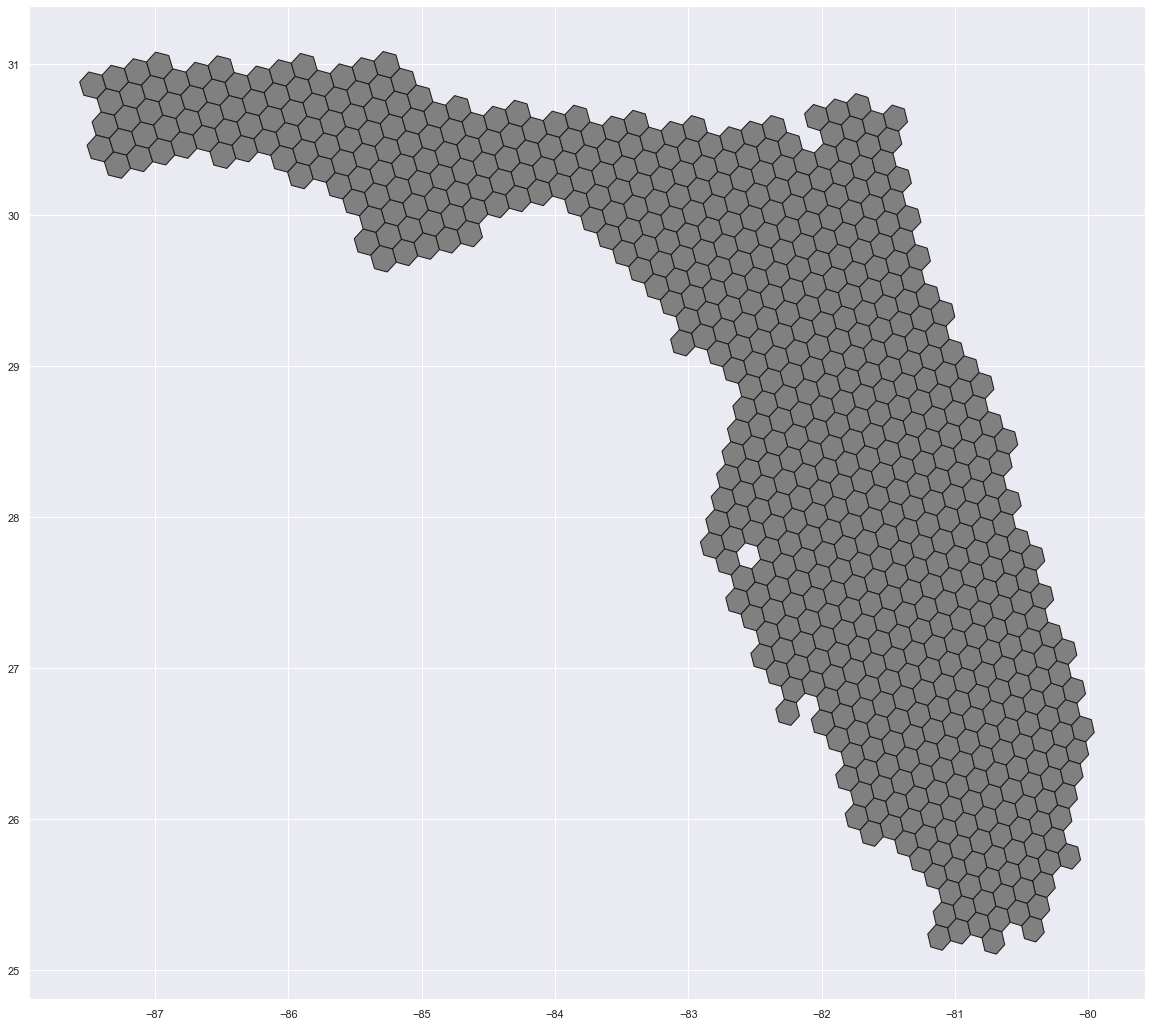

In [14]:
fig, ax = plt.subplots(figsize=(20,20))

county_hex.plot(ax=ax, facecolor='Grey', edgecolor='k',alpha=1,linewidth=1)

In [15]:
python_hexWIP = gpd.sjoin(geoPython1620, county_hex, op='within', how='left')

In [16]:
python_hexWIP

,objectid,ObsDate,Latitude,Longitude,geometry,index_right
2244,4455294,January,26.09410,-80.51183,POINT (-80.51183 26.09410),8544a1affffffff
2245,4455354,January,25.50858,-80.55805,POINT (-80.55805 25.50858),8544125bfffffff
2246,4456193,January,26.70519,-81.74914,POINT (-81.74914 26.70519),85441363fffffff
2247,4456212,January,26.85639,-82.00524,POINT (-82.00524 26.85639),8544132ffffffff
2248,4457001,January,25.46334,-80.33154,POINT (-80.33154 25.46334),8544a193fffffff
...,...,...,...,...,...,...
7526,8821451,September,28.27322,-81.62104,POINT (-81.62104 28.27322),8544a987fffffff
7527,8821481,July,27.63630,-81.82753,POINT (-81.82753 27.63630),8544ad33fffffff
7528,8821693,December,26.85742,-82.21788,POINT (-82.21788 26.85742),85441327fffffff
7532,9319776,January,25.76230,-80.82164,POINT (-80.82164 25.76230),85441247fffffff


In [17]:
grouped = python_hexWIP.groupby(['index_right'])['objectid'].agg('count').reset_index()

In [18]:
grouped = grouped.rename(columns={"index_right": "hex_id", "objectid": "pythonsPerHex"})
grouped.sort_values(by='pythonsPerHex', ascending=False)

,hex_id,pythonsPerHex
22,8544127bfffffff,512
12,8544124ffffffff,338
10,85441247fffffff,306
8,8544123bfffffff,287
11,8544124bfffffff,287
...,...,...
80,8544a8c3fffffff,1
81,8544a8dbfffffff,1
82,8544a903fffffff,1
84,8544a90ffffffff,1


In [19]:
pythons_hex = county_hex.merge(grouped, on='hex_id', how="outer")

In [20]:
pythons_hex

,hex_id,geometry,pythonsPerHex
0,8544a90ffffffff,"POLYGON ((-81.27561 28.52559, -81.21028 28.587...",1.0
1,8544acd7fffffff,"POLYGON ((-80.80714 26.17106, -80.74335 26.233...",1.0
2,8544a80bfffffff,"POLYGON ((-80.38993 27.64624, -80.32544 27.707...",NaN
3,85441a23fffffff,"POLYGON ((-82.59021 28.47570, -82.52449 28.538...",1.0
4,8544ac9bfffffff,"POLYGON ((-80.95732 26.13137, -80.89349 26.194...",9.0
...,...,...,...
640,85441a4bfffffff,"POLYGON ((-81.82167 28.11416, -81.75640 28.176...",NaN
641,8544ad07fffffff,"POLYGON ((-81.71961 27.44838, -81.65476 27.511...",NaN
642,8544f53bfffffff,"POLYGON ((-83.00557 30.18533, -82.93871 30.247...",NaN
643,8544f567fffffff,"POLYGON ((-82.80492 30.37248, -82.73799 30.434...",NaN


In [21]:
pythons_hex.fillna(0, inplace=True)

In [22]:
pythons_hex['pythonsPerHex'] = pythons_hex['pythonsPerHex'].astype(int)

In [23]:
pythons_hex.sort_values(by='pythonsPerHex', ascending=False)

,hex_id,geometry,pythonsPerHex
333,8544127bfffffff,"POLYGON ((-80.78107 25.76680, -80.71751 25.829...",512
167,8544124ffffffff,"POLYGON ((-80.67295 25.65879, -80.60949 25.721...",338
465,85441247fffffff,"POLYGON ((-80.82220 25.61873, -80.75871 25.681...",306
162,8544124bfffffff,"POLYGON ((-80.56520 25.55087, -80.50184 25.613...",287
50,8544123bfffffff,"POLYGON ((-81.18965 25.79445, -81.12593 25.857...",287
...,...,...,...
240,8544a827fffffff,"POLYGON ((-80.82962 28.08530, -80.76471 28.146...",0
241,8544a897fffffff,"POLYGON ((-80.92821 27.23734, -80.86376 27.299...",0
242,8544a9cffffffff,"POLYGON ((-81.09369 28.15758, -81.02865 28.219...",0
243,8544e08bfffffff,"POLYGON ((-84.97856 30.12001, -84.91124 30.184...",0


In [24]:
pythons_hex.groupby('pythonsPerHex').count()

,hex_id,geometry
pythonsPerHex,,
0,529,529
1,46,46
2,15,15
3,2,2
4,2,2
5,1,1
7,5,5
8,3,3
9,2,2


In [25]:
pythons_hex = pythons_hex.to_crs(epsg=3857)

In [26]:
hexcentroid = pythons_hex.centroid
hexcentroid = hexcentroid.reset_index(drop=True)
hexcentroid

0      POINT (-9050181.874 3326310.557)
1      POINT (-8997921.306 3030893.014)
2      POINT (-8951459.517 3215203.658)
3      POINT (-9196682.884 3320052.649)
4      POINT (-9014656.211 3025974.433)
                     ...               
640    POINT (-9111026.706 3274265.357)
641    POINT (-9099636.278 3190412.299)
642    POINT (-9243016.245 3538575.980)
643    POINT (-9220659.153 3562712.315)
644    POINT (-9156490.624 3086977.903)
Length: 645, dtype: geometry

In [27]:
hexcentroid.crs

<Derived Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

# Configuring python data to respective month sightings were recorded in

In [28]:
group = python_hexWIP.groupby(['index_right', 'ObsDate'])['objectid'].agg('count').reset_index()

In [29]:
group

,index_right,ObsDate,objectid
0,8544120bfffffff,July,1
1,8544120ffffffff,April,3
2,8544120ffffffff,August,14
3,8544120ffffffff,December,2
4,8544120ffffffff,February,3
...,...,...,...
540,8544ae87fffffff,October,1
541,8544ae97fffffff,June,1
542,8544aebbfffffff,October,1
543,8544f473fffffff,June,1


In [30]:
months = group.pivot(index='index_right', columns='ObsDate', values='objectid', )

In [31]:
months

ObsDate,April,August,December,February,January,July,June,March,May,November,October,September
index_right,,,,,,,,,,,,
8544120bfffffff,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
8544120ffffffff,3.0,14.0,2.0,3.0,3.0,16.0,4.0,2.0,2.0,NaN,7.0,9.0
8544121bfffffff,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
85441223fffffff,2.0,4.0,2.0,1.0,1.0,9.0,1.0,NaN,1.0,3.0,2.0,1.0
85441227fffffff,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8544ae87fffffff,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
8544ae97fffffff,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
8544aebbfffffff,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


In [32]:
months.fillna(0, inplace=True)

In [33]:
month = ['April', 'August', 'December', 'February', 'January', 'July', 'June', 'March', 'May', 'November', 'October', 'September']

In [34]:
month

['April',
 'August',
 'December',
 'February',
 'January',
 'July',
 'June',
 'March',
 'May',
 'November',
 'October',
 'September']

In [35]:
def function(x):
    months[x] = months[x].astype(int)
    return months

In [36]:
function(month)    

ObsDate,April,August,December,February,January,July,June,March,May,November,October,September
index_right,,,,,,,,,,,,
8544120bfffffff,0,0,0,0,0,1,0,0,0,0,0,0
8544120ffffffff,3,14,2,3,3,16,4,2,2,0,7,9
8544121bfffffff,0,0,0,0,0,0,0,0,0,1,0,0
85441223fffffff,2,4,2,1,1,9,1,0,1,3,2,1
85441227fffffff,0,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8544ae87fffffff,0,0,0,0,0,0,0,0,0,0,1,0
8544ae97fffffff,0,0,0,0,0,0,1,0,0,0,0,0
8544aebbfffffff,0,0,0,0,0,0,0,0,0,0,1,0


In [37]:
months = months.rename_axis("hex_id")

In [38]:
months

ObsDate,April,August,December,February,January,July,June,March,May,November,October,September
hex_id,,,,,,,,,,,,
8544120bfffffff,0,0,0,0,0,1,0,0,0,0,0,0
8544120ffffffff,3,14,2,3,3,16,4,2,2,0,7,9
8544121bfffffff,0,0,0,0,0,0,0,0,0,1,0,0
85441223fffffff,2,4,2,1,1,9,1,0,1,3,2,1
85441227fffffff,0,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8544ae87fffffff,0,0,0,0,0,0,0,0,0,0,1,0
8544ae97fffffff,0,0,0,0,0,0,1,0,0,0,0,0
8544aebbfffffff,0,0,0,0,0,0,0,0,0,0,1,0


In [39]:
months = months.rename(columns={"ObsDate": "hex_id"})

In [40]:
months

ObsDate,April,August,December,February,January,July,June,March,May,November,October,September
hex_id,,,,,,,,,,,,
8544120bfffffff,0,0,0,0,0,1,0,0,0,0,0,0
8544120ffffffff,3,14,2,3,3,16,4,2,2,0,7,9
8544121bfffffff,0,0,0,0,0,0,0,0,0,1,0,0
85441223fffffff,2,4,2,1,1,9,1,0,1,3,2,1
85441227fffffff,0,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8544ae87fffffff,0,0,0,0,0,0,0,0,0,0,1,0
8544ae97fffffff,0,0,0,0,0,0,1,0,0,0,0,0
8544aebbfffffff,0,0,0,0,0,0,0,0,0,0,1,0


In [41]:
pythons_hex

,hex_id,geometry,pythonsPerHex
0,8544a90ffffffff,"POLYGON ((-9047559.298 3315401.843, -9040287.4...",1
1,8544acd7fffffff,"POLYGON ((-8995410.077 3020283.100, -8988308.4...",1
2,8544a80bfffffff,"POLYGON ((-8948965.809 3204445.652, -8941787.3...",0
3,85441a23fffffff,"POLYGON ((-9193899.960 3309082.059, -9186583.7...",1
4,8544ac9bfffffff,"POLYGON ((-9012127.741 3015360.604, -9005022.5...",9
...,...,...,...
640,85441a4bfffffff,"POLYGON ((-9108346.948 3263374.729, -9101081.3...",0
641,8544ad07fffffff,"POLYGON ((-9096984.913 3179603.439, -9089766.2...",0
642,8544f53bfffffff,"POLYGON ((-9240138.213 3527394.197, -9232694.6...",0
643,8544f567fffffff,"POLYGON ((-9217801.196 3551519.040, -9210351.3...",0


In [42]:
months

ObsDate,April,August,December,February,January,July,June,March,May,November,October,September
hex_id,,,,,,,,,,,,
8544120bfffffff,0,0,0,0,0,1,0,0,0,0,0,0
8544120ffffffff,3,14,2,3,3,16,4,2,2,0,7,9
8544121bfffffff,0,0,0,0,0,0,0,0,0,1,0,0
85441223fffffff,2,4,2,1,1,9,1,0,1,3,2,1
85441227fffffff,0,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8544ae87fffffff,0,0,0,0,0,0,0,0,0,0,1,0
8544ae97fffffff,0,0,0,0,0,0,1,0,0,0,0,0
8544aebbfffffff,0,0,0,0,0,0,0,0,0,0,1,0


In [43]:
pythons_hex = pythons_hex.merge(months, on='hex_id', how="outer")

In [44]:
pythons_hex

,hex_id,geometry,pythonsPerHex,April,August,December,February,January,July,June,March,May,November,October,September
0,8544a90ffffffff,"POLYGON ((-9047559.298 3315401.843, -9040287.4...",1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8544acd7fffffff,"POLYGON ((-8995410.077 3020283.100, -8988308.4...",1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8544a80bfffffff,"POLYGON ((-8948965.809 3204445.652, -8941787.3...",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,85441a23fffffff,"POLYGON ((-9193899.960 3309082.059, -9186583.7...",1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,8544ac9bfffffff,"POLYGON ((-9012127.741 3015360.604, -9005022.5...",9,0.0,1.0,0.0,3.0,0.0,0.0,1.0,2.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,85441a4bfffffff,"POLYGON ((-9108346.948 3263374.729, -9101081.3...",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
641,8544ad07fffffff,"POLYGON ((-9096984.913 3179603.439, -9089766.2...",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
642,8544f53bfffffff,"POLYGON ((-9240138.213 3527394.197, -9232694.6...",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
643,8544f567fffffff,"POLYGON ((-9217801.196 3551519.040, -9210351.3...",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
pythons_hex.fillna(0, inplace=True)

In [46]:
pythons_hex

,hex_id,geometry,pythonsPerHex,April,August,December,February,January,July,June,March,May,November,October,September
0,8544a90ffffffff,"POLYGON ((-9047559.298 3315401.843, -9040287.4...",1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8544acd7fffffff,"POLYGON ((-8995410.077 3020283.100, -8988308.4...",1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8544a80bfffffff,"POLYGON ((-8948965.809 3204445.652, -8941787.3...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,85441a23fffffff,"POLYGON ((-9193899.960 3309082.059, -9186583.7...",1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,8544ac9bfffffff,"POLYGON ((-9012127.741 3015360.604, -9005022.5...",9,0.0,1.0,0.0,3.0,0.0,0.0,1.0,2.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,85441a4bfffffff,"POLYGON ((-9108346.948 3263374.729, -9101081.3...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
641,8544ad07fffffff,"POLYGON ((-9096984.913 3179603.439, -9089766.2...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
642,8544f53bfffffff,"POLYGON ((-9240138.213 3527394.197, -9232694.6...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
643,8544f567fffffff,"POLYGON ((-9217801.196 3551519.040, -9210351.3...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
pythons_hex.sort_values(by='pythonsPerHex', ascending=False)

,hex_id,geometry,pythonsPerHex,April,August,December,February,January,July,June,March,May,November,October,September
333,8544127bfffffff,"POLYGON ((-8992507.664 2970226.717, -8985432.5...",512,25.0,70.0,12.0,18.0,37.0,86.0,50.0,4.0,43.0,27.0,87.0,53.0
167,8544124ffffffff,"POLYGON ((-8980471.229 2956881.151, -8973407.3...",338,52.0,32.0,31.0,5.0,24.0,22.0,38.0,16.0,42.0,11.0,29.0,36.0
465,85441247fffffff,"POLYGON ((-8997086.009 2951935.157, -8990018.4...",306,10.0,52.0,15.0,2.0,15.0,60.0,35.0,7.0,20.0,24.0,47.0,19.0
162,8544124bfffffff,"POLYGON ((-8968476.701 2943560.217, -8961424.0...",287,6.0,90.0,5.0,6.0,22.0,46.0,13.0,6.0,10.0,20.0,21.0,42.0
50,8544123bfffffff,"POLYGON ((-9037991.037 2973644.524, -9030897.7...",287,7.0,72.0,10.0,2.0,8.0,98.0,9.0,1.0,2.0,9.0,29.0,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,8544a827fffffff,"POLYGON ((-8997911.809 3259732.303, -8990686.5...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
241,8544a897fffffff,"POLYGON ((-9008886.687 3153155.480, -9001712.3...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
242,8544a9cffffffff,"POLYGON ((-9027308.406 3268855.071, -9020067.7...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
243,8544e08bfffffff,"POLYGON ((-9459769.562 3518985.380, -9452276.5...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Configuring the county each sighting was in, merged with the Hex 

In [48]:
pythonWIPforCounty = pythons_hex.copy(deep=True)

In [49]:
pythonWIPforCounty['centroids'] = hexcentroid

In [50]:
pythonWIPforCounty

,hex_id,geometry,pythonsPerHex,April,August,December,February,January,July,June,March,May,November,October,September,centroids
0,8544a90ffffffff,"POLYGON ((-9047559.298 3315401.843, -9040287.4...",1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,POINT (-9050181.874 3326310.557)
1,8544acd7fffffff,"POLYGON ((-8995410.077 3020283.100, -8988308.4...",1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,POINT (-8997921.306 3030893.014)
2,8544a80bfffffff,"POLYGON ((-8948965.809 3204445.652, -8941787.3...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,POINT (-8951459.517 3215203.658)
3,85441a23fffffff,"POLYGON ((-9193899.960 3309082.059, -9186583.7...",1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,POINT (-9196682.884 3320052.649)
4,8544ac9bfffffff,"POLYGON ((-9012127.741 3015360.604, -9005022.5...",9,0.0,1.0,0.0,3.0,0.0,0.0,1.0,2.0,1.0,1.0,0.0,0.0,POINT (-9014656.211 3025974.433)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,85441a4bfffffff,"POLYGON ((-9108346.948 3263374.729, -9101081.3...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,POINT (-9111026.706 3274265.357)
641,8544ad07fffffff,"POLYGON ((-9096984.913 3179603.439, -9089766.2...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,POINT (-9099636.278 3190412.299)
642,8544f53bfffffff,"POLYGON ((-9240138.213 3527394.197, -9232694.6...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,POINT (-9243016.245 3538575.980)
643,8544f567fffffff,"POLYGON ((-9217801.196 3551519.040, -9210351.3...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,POINT (-9220659.153 3562712.315)


In [51]:
pythonWIPforCounty.crs

<Derived Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [52]:
pythonWIPforCounty = pythonWIPforCounty.drop('geometry', axis=1)

In [53]:
pythonWIPforCounty = pythonWIPforCounty.rename(columns={"centroids": "geometry"})

In [54]:
pythonWIPforCounty.crs

<Derived Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [55]:
pythonWIPforCounty

,hex_id,pythonsPerHex,April,August,December,February,January,July,June,March,May,November,October,September,geometry
0,8544a90ffffffff,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,POINT (-9050181.874 3326310.557)
1,8544acd7fffffff,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,POINT (-8997921.306 3030893.014)
2,8544a80bfffffff,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,POINT (-8951459.517 3215203.658)
3,85441a23fffffff,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,POINT (-9196682.884 3320052.649)
4,8544ac9bfffffff,9,0.0,1.0,0.0,3.0,0.0,0.0,1.0,2.0,1.0,1.0,0.0,0.0,POINT (-9014656.211 3025974.433)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,85441a4bfffffff,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,POINT (-9111026.706 3274265.357)
641,8544ad07fffffff,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,POINT (-9099636.278 3190412.299)
642,8544f53bfffffff,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,POINT (-9243016.245 3538575.980)
643,8544f567fffffff,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,POINT (-9220659.153 3562712.315)


In [56]:
counties = counties.to_crs(epsg=3857)

<AxesSubplot:>

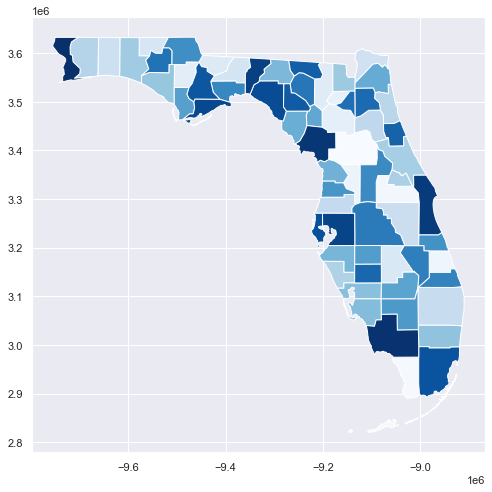

In [57]:
counties.plot(cmap="Blues")  

<AxesSubplot:>

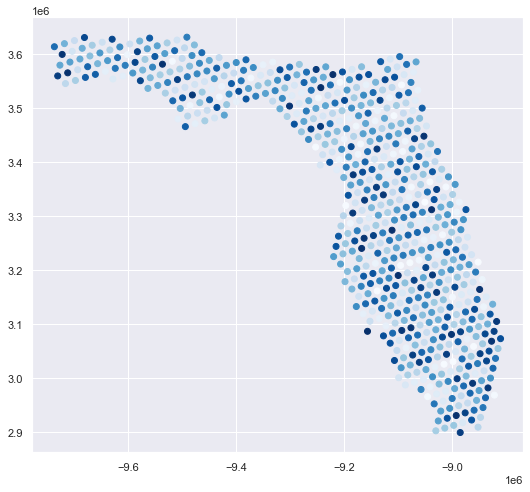

In [58]:
pythonWIPforCounty.plot(cmap="Blues")

In [59]:
counties.crs

<Derived Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [60]:
sjoinedCountyHex = gpd.sjoin(pythonWIPforCounty, counties, op='within', how='left')

In [61]:
sjoinedCountyHex

,hex_id,pythonsPerHex,April,August,December,February,January,July,June,March,...,September,geometry,index_right,id,GEO_ID,STATE,COUNTY,NAME,LSAD,CENSUSAREA
0,8544a90ffffffff,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,POINT (-9050181.874 3326310.557),22,12117,0500000US12117,12,117,Seminole,County,309.221
1,8544acd7fffffff,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,POINT (-8997921.306 3030893.014),27,12011,0500000US12011,12,011,Broward,County,1209.785
2,8544a80bfffffff,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,POINT (-8951459.517 3215203.658),41,12061,0500000US12061,12,061,Indian River,County,502.872
3,85441a23fffffff,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,POINT (-9196682.884 3320052.649),40,12053,0500000US12053,12,053,Hernando,County,472.539
4,8544ac9bfffffff,9,0.0,1.0,0.0,3.0,0.0,0.0,1.0,2.0,...,0.0,POINT (-9014656.211 3025974.433),65,12021,0500000US12021,12,021,Collier,County,1998.324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,85441a4bfffffff,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,POINT (-9111026.706 3274265.357),47,12105,0500000US12105,12,105,Polk,County,1797.837
641,8544ad07fffffff,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,POINT (-9099636.278 3190412.299),38,12049,0500000US12049,12,049,Hardee,County,637.783
642,8544f53bfffffff,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,POINT (-9243016.245 3538575.980),48,12121,0500000US12121,12,121,Suwannee,County,688.552
643,8544f567fffffff,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,POINT (-9220659.153 3562712.315),54,12047,0500000US12047,12,047,Hamilton,County,513.790


In [62]:
sjoinedCountyHex = sjoinedCountyHex[['hex_id','NAME']]

In [63]:
sjoinedCountyHex

,hex_id,NAME
0,8544a90ffffffff,Seminole
1,8544acd7fffffff,Broward
2,8544a80bfffffff,Indian River
3,85441a23fffffff,Hernando
4,8544ac9bfffffff,Collier
...,...,...
640,85441a4bfffffff,Polk
641,8544ad07fffffff,Hardee
642,8544f53bfffffff,Suwannee
643,8544f567fffffff,Hamilton


In [64]:
pythons_hex = pythons_hex.merge(sjoinedCountyHex, on='hex_id', how="outer")

In [65]:
pythons_hex = pythons_hex.set_geometry('geometry')

In [66]:
pythons_hex

,hex_id,geometry,pythonsPerHex,April,August,December,February,January,July,June,March,May,November,October,September,NAME
0,8544a90ffffffff,"POLYGON ((-9047559.298 3315401.843, -9040287.4...",1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Seminole
1,8544acd7fffffff,"POLYGON ((-8995410.077 3020283.100, -8988308.4...",1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Broward
2,8544a80bfffffff,"POLYGON ((-8948965.809 3204445.652, -8941787.3...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Indian River
3,85441a23fffffff,"POLYGON ((-9193899.960 3309082.059, -9186583.7...",1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Hernando
4,8544ac9bfffffff,"POLYGON ((-9012127.741 3015360.604, -9005022.5...",9,0.0,1.0,0.0,3.0,0.0,0.0,1.0,2.0,1.0,1.0,0.0,0.0,Collier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,85441a4bfffffff,"POLYGON ((-9108346.948 3263374.729, -9101081.3...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Polk
641,8544ad07fffffff,"POLYGON ((-9096984.913 3179603.439, -9089766.2...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Hardee
642,8544f53bfffffff,"POLYGON ((-9240138.213 3527394.197, -9232694.6...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Suwannee
643,8544f567fffffff,"POLYGON ((-9217801.196 3551519.040, -9210351.3...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Hamilton


# Binarize the County feature to the hex_id through One Hot Encode 

In [67]:
from sklearn.preprocessing import OneHotEncoder

In [68]:
#creating instance of one-hot-encoder
encoder = OneHotEncoder()
encoder_df = encoder.fit_transform(pythons_hex[['NAME']])
column_name = encoder.get_feature_names_out(['NAME'])

In [69]:
one_hot_encoded_frame =  pd.DataFrame(encoder_df.todense(), columns= column_name)

In [70]:
one_hot_encoded_frame

,NAME_Alachua,NAME_Baker,NAME_Bay,NAME_Bradford,NAME_Brevard,NAME_Broward,NAME_Calhoun,NAME_Charlotte,NAME_Citrus,NAME_Clay,...,NAME_St. Johns,NAME_St. Lucie,NAME_Sumter,NAME_Suwannee,NAME_Taylor,NAME_Union,NAME_Volusia,NAME_Wakulla,NAME_Walton,NAME_Washington
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
641,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
642,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
pythons_hex = pythons_hex.join(one_hot_encoded_frame)

In [72]:
pythons_hex

,hex_id,geometry,pythonsPerHex,April,August,December,February,January,July,June,...,NAME_St. Johns,NAME_St. Lucie,NAME_Sumter,NAME_Suwannee,NAME_Taylor,NAME_Union,NAME_Volusia,NAME_Wakulla,NAME_Walton,NAME_Washington
0,8544a90ffffffff,"POLYGON ((-9047559.298 3315401.843, -9040287.4...",1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8544acd7fffffff,"POLYGON ((-8995410.077 3020283.100, -8988308.4...",1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8544a80bfffffff,"POLYGON ((-8948965.809 3204445.652, -8941787.3...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,85441a23fffffff,"POLYGON ((-9193899.960 3309082.059, -9186583.7...",1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8544ac9bfffffff,"POLYGON ((-9012127.741 3015360.604, -9005022.5...",9,0.0,1.0,0.0,3.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,85441a4bfffffff,"POLYGON ((-9108346.948 3263374.729, -9101081.3...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
641,8544ad07fffffff,"POLYGON ((-9096984.913 3179603.439, -9089766.2...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
642,8544f53bfffffff,"POLYGON ((-9240138.213 3527394.197, -9232694.6...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
643,8544f567fffffff,"POLYGON ((-9217801.196 3551519.040, -9210351.3...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Adding in Bird Sanctuary Data in a shapefile

In [73]:
birdSanctuaries = gpd.read_file('Mangiapane_Gianluca_PythonPredictor/raw_data/Designated_Bird_Sanctuaries_in_Florida.shp')

In [74]:
birdSanctuaries = birdSanctuaries.to_crs(epsg=3857)
birdSanctuaries

,OBJECTID,Name,County,ORDER_NO,Notes,geometry
0,1,Casselberry Restricted Hunting Area,Seminole,RHA 19-01,None,"MULTIPOLYGON (((-9052832.044 3327998.637, -905..."
1,2,Belle Isle Restricted Hunting Area,Orange,RHA 18-01,None,"POLYGON ((-9057844.695 3309165.527, -9057632.4..."
2,3,Harbour Heights,Charlotte,16E (73-24),None,"MULTIPOLYGON (((-9134635.212 3122016.620, -913..."
3,4,El Jobean-Gulf Cove,Charlotte,16E-75.48,None,"MULTIPOLYGON (((-9151979.702 3117818.260, -915..."
4,5,Englewood,Charlotte,165 (67-2),None,"POLYGON ((-9163927.896 3116717.514, -9163958.0..."
...,...,...,...,...,...,...
127,128,Halifax,Volusia,16E (74-54),None,"POLYGON ((-9021104.313 3409721.150, -9021109.7..."
128,129,10948 Acme Road,Palm Beach,165 (70-02),None,"POLYGON ((-8929850.618 3083116.892, -8929393.0..."
129,130,Switzerland,St. Johns,BS 89-4,None,"POLYGON ((-9080162.043 3518722.739, -9080160.6..."
130,131,St. Augustine Beach,St. Johns,16E-75.68,None,"POLYGON ((-9046417.283 3484021.793, -9046411.0..."


In [75]:
birdSanctuaries.crs

<Derived Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [76]:
#birdCentroid = birdSanctuaries.centroid
#birdCentroid = birdCentroid.reset_index(drop=True)

In [77]:
#birdCentroid = birdCentroid.to_crs(epsg=3857)

In [78]:
#birdCentroid.crs

In [79]:
distance = hexcentroid.geometry.apply(lambda x: birdSanctuaries.distance(x).min())

In [80]:
distance 

0        665.599629
1      75474.477081
2      17350.822380
3       5912.771435
4      82300.969772
           ...     
640    19567.951056
641     7400.685977
642    17845.467981
643    14093.878871
644      214.656868
Length: 645, dtype: float64

In [81]:
pythons_hex['distanceToBirdSanctuaries'] = distance 

In [82]:
pythons_hex

,hex_id,geometry,pythonsPerHex,April,August,December,February,January,July,June,...,NAME_St. Lucie,NAME_Sumter,NAME_Suwannee,NAME_Taylor,NAME_Union,NAME_Volusia,NAME_Wakulla,NAME_Walton,NAME_Washington,distanceToBirdSanctuaries
0,8544a90ffffffff,"POLYGON ((-9047559.298 3315401.843, -9040287.4...",1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,665.599629
1,8544acd7fffffff,"POLYGON ((-8995410.077 3020283.100, -8988308.4...",1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75474.477081
2,8544a80bfffffff,"POLYGON ((-8948965.809 3204445.652, -8941787.3...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17350.822380
3,85441a23fffffff,"POLYGON ((-9193899.960 3309082.059, -9186583.7...",1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5912.771435
4,8544ac9bfffffff,"POLYGON ((-9012127.741 3015360.604, -9005022.5...",9,0.0,1.0,0.0,3.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82300.969772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,85441a4bfffffff,"POLYGON ((-9108346.948 3263374.729, -9101081.3...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19567.951056
641,8544ad07fffffff,"POLYGON ((-9096984.913 3179603.439, -9089766.2...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7400.685977
642,8544f53bfffffff,"POLYGON ((-9240138.213 3527394.197, -9232694.6...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,17845.467981
643,8544f567fffffff,"POLYGON ((-9217801.196 3551519.040, -9210351.3...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14093.878871


# Adding in Eagle Nests 

In [83]:
eagleNests = gpd.read_file('Mangiapane_Gianluca_PythonPredictor/raw_data/Eagle_Nesting.geojson')
eagleNests = eagleNests.to_crs(epsg=3857)
eagleNests

,OBJECTID,NestID,County,NestTownsh,NestRange,NestSectio,GazPage,LastKnownA,LastSurvey,LatDec,...,Act10,Active11,Active12,Active13,Active14,Active15,last_edited_date,Active16,Active17,geometry
0,2549,AL001,Alachua,12S,22E,17,72,2011,2014,29.453500,...,*,Y,*,*,N,*,2017-09-19T23:51:32+00:00,*,None,POINT (-9142744.029 3433494.022)
1,2550,AL002,Alachua,11S,21E,25,66,1994,2011,29.503333,...,*,-,*,*,*,*,2017-09-19T23:51:32+00:00,*,None,POINT (-9146380.391 3439866.362)
2,2551,AL003,Alachua,11S,22E,29,72,2014,2014,29.499500,...,*,Y,*,*,Y,*,2017-09-19T23:51:32+00:00,*,None,POINT (-9143152.126 3439376.110)
3,2552,AL004,Alachua,11S,21E,25,66,1991,2011,29.505000,...,*,-,*,*,*,*,2017-09-19T23:51:32+00:00,*,None,POINT (-9146565.961 3440079.582)
4,2553,AL005,Alachua,11S,22E,04,66,2014,2014,29.562000,...,*,Y,*,*,Y,*,2017-09-19T23:51:32+00:00,*,None,POINT (-9140870.077 3447372.362)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2609,5158,VO133,Volusia,16S,32E,12,75,0,2016,29.127000,...,*,*,*,*,*,*,2017-09-19T23:51:32+00:00,U,None,POINT (-9022184.983 3391820.241)
2610,5159,VO134,Volusia,15S,33E,37,75,2016,2016,29.222667,...,*,*,*,*,*,*,2017-09-19T23:51:32+00:00,Y,None,POINT (-9021832.472 3404017.153)
2611,5160,VO135,Volusia,16S,33E,08,75,2016,2016,29.124333,...,*,*,*,*,*,*,2017-09-19T23:51:32+00:00,Y,None,POINT (-9018158.928 3391480.420)
2612,5161,VO136,Volusia,18S,35E,75,81,2016,2016,28.918667,...,*,*,*,*,*,*,2017-09-19T23:51:32+00:00,Y,None,POINT (-9002166.028 3365298.191)


In [84]:
eagleNests.crs

<Derived Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [85]:
pythons_hex.crs

<Derived Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [86]:
eagle_hex = gpd.sjoin(eagleNests, pythons_hex, op='within', how='left')

In [87]:
eagle_hex

,OBJECTID,NestID,County,NestTownsh,NestRange,NestSectio,GazPage,LastKnownA,LastSurvey,LatDec,...,NAME_St. Lucie,NAME_Sumter,NAME_Suwannee,NAME_Taylor,NAME_Union,NAME_Volusia,NAME_Wakulla,NAME_Walton,NAME_Washington,distanceToBirdSanctuaries
0,2549,AL001,Alachua,12S,22E,17,72,2011,2014,29.453500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40967.072231
1,2550,AL002,Alachua,11S,21E,25,66,1994,2011,29.503333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23057.963207
2,2551,AL003,Alachua,11S,22E,29,72,2014,2014,29.499500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23057.963207
3,2552,AL004,Alachua,11S,21E,25,66,1991,2011,29.505000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23057.963207
4,2553,AL005,Alachua,11S,22E,04,66,2014,2014,29.562000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39254.916303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2609,5158,VO133,Volusia,16S,32E,12,75,0,2016,29.127000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,22214.535732
2610,5159,VO134,Volusia,15S,33E,37,75,2016,2016,29.222667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2611,5160,VO135,Volusia,16S,33E,08,75,2016,2016,29.124333,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,22214.535732
2612,5161,VO136,Volusia,18S,35E,75,81,2016,2016,28.918667,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,38992.914731


In [88]:
grouped = eagle_hex.groupby(['hex_id'])['OBJECTID'].agg('count').reset_index()

grouped = grouped.rename(columns={"OBJECTID": "eagleNestsPerHex"})
grouped.sort_values(by='eagleNestsPerHex', ascending=False)

,hex_id,eagleNestsPerHex
357,8544f44ffffffff,61
353,8544f43bfffffff,46
356,8544f44bfffffff,40
160,8544a963fffffff,36
165,8544a977fffffff,35
...,...,...
277,8544e0a3fffffff,1
278,8544e0b7fffffff,1
279,8544e0cffffffff,1
280,8544e193fffffff,1


In [89]:
pythons_hex = pythons_hex.merge(grouped, on='hex_id', how="outer")

pythons_hex.fillna(0, inplace=True)

pythons_hex['eagleNestsPerHex'] = pythons_hex['eagleNestsPerHex'].astype(int)

pythons_hex.sort_values(by='distanceToBirdSanctuaries', ascending=False)

,hex_id,geometry,pythonsPerHex,April,August,December,February,January,July,June,...,NAME_Sumter,NAME_Suwannee,NAME_Taylor,NAME_Union,NAME_Volusia,NAME_Wakulla,NAME_Walton,NAME_Washington,distanceToBirdSanctuaries,eagleNestsPerHex
259,8544f597fffffff,"POLYGON ((-9276049.873 3445551.568, -9268639.2...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,103604.616382,0
560,8544e64bfffffff,"POLYGON ((-9289268.706 3459713.497, -9281847.1...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,101533.310470,5
200,8544ac83fffffff,"POLYGON ((-9024295.117 3028811.835, -9017178.6...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100462.866605,0
320,8544acabfffffff,"POLYGON ((-9027336.657 3079193.982, -9020193.4...",1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100269.158117,0
216,8544e64ffffffff,"POLYGON ((-9302533.703 3473895.645, -9295101.1...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,99668.197791,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,8544a183fffffff,"POLYGON ((-8940009.154 2935167.096, -8932971.6...",43,2.0,5.0,3.0,5.0,4.0,2.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0
431,8544a903fffffff,"POLYGON ((-9052210.963 3296671.787, -9044947.1...",1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,8
415,85441e57fffffff,"POLYGON ((-9174503.197 3122092.893, -9167289.0...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,10
314,8544a187fffffff,"POLYGON ((-8951924.155 2948470.862, -8944875.3...",41,4.0,6.0,4.0,0.0,2.0,6.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0


In [90]:
distance = hexcentroid.geometry.apply(lambda x: eagleNests.distance(x).min())

In [91]:
pythons_hex['distanceToEagleNests'] = distance 

In [92]:
pythons_hex

,hex_id,geometry,pythonsPerHex,April,August,December,February,January,July,June,...,NAME_Suwannee,NAME_Taylor,NAME_Union,NAME_Volusia,NAME_Wakulla,NAME_Walton,NAME_Washington,distanceToBirdSanctuaries,eagleNestsPerHex,distanceToEagleNests
0,8544a90ffffffff,"POLYGON ((-9047559.298 3315401.843, -9040287.4...",1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,665.599629,13,2873.398852
1,8544acd7fffffff,"POLYGON ((-8995410.077 3020283.100, -8988308.4...",1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75474.477081,0,12999.281573
2,8544a80bfffffff,"POLYGON ((-8948965.809 3204445.652, -8941787.3...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17350.822380,2,3089.605559
3,85441a23fffffff,"POLYGON ((-9193899.960 3309082.059, -9186583.7...",1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5912.771435,9,1023.838245
4,8544ac9bfffffff,"POLYGON ((-9012127.741 3015360.604, -9005022.5...",9,0.0,1.0,0.0,3.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82300.969772,1,9160.207797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,85441a4bfffffff,"POLYGON ((-9108346.948 3263374.729, -9101081.3...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19567.951056,6,2902.284456
641,8544ad07fffffff,"POLYGON ((-9096984.913 3179603.439, -9089766.2...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7400.685977,2,5574.275619
642,8544f53bfffffff,"POLYGON ((-9240138.213 3527394.197, -9232694.6...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,17845.467981,0,16064.186176
643,8544f567fffffff,"POLYGON ((-9217801.196 3551519.040, -9210351.3...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14093.878871,3,2536.514309


# Bird Nests 2000

In [93]:
nests2000 = gpd.read_file('Mangiapane_Gianluca_PythonPredictor/raw_data/ESI_Bird_Nests_2000.geojson')
nests2000 = nests2000.to_crs(epsg=3857)
nests2000

,OBJECTID,RARNUM,BIOGWIS_RA,SPECIES_ID,SEASON_ID,EL_RAR,EL_SPE,EL_SPE_SEA,GEO_SRC,SEASON_SRC,...,ACTIVE_SEP,ACTIVE_OCT,ACTIVE_NOV,ACTIVE_DEC,ESI_INFO,created_user,created_date,last_edited_user,last_edited_date,geometry
0,1,44,44,86,2,BIRD_44,B00086,B0008602,32,37,...,,,,,Least tern; Status: Threatened (FL); Present: ...,None,None,None,None,POINT (-9031140.824 3436915.309)
1,2,45,45,86,2,BIRD_45,B00086,B0008602,32,37,...,,,,,Least tern; Status: Threatened (FL); Present: ...,None,None,None,None,POINT (-9025017.959 3421579.699)
2,3,47,47,60,1,BIRD_47,B00060,B0006001,32,37,...,,,,,Red knot; Status: ; Present: Jan Feb Mar Apr ...,None,None,None,None,POINT (-9022561.266 3415974.752)
3,4,47,47,66,1,BIRD_47,B00066,B0006601,32,37,...,,,,,Western sandpiper; Status: ; Present: Jan Feb...,None,None,None,None,POINT (-9022561.266 3415974.752)
4,5,47,47,67,1,BIRD_47,B00067,B0006701,32,37,...,,,,,Sanderling; Status: ; Present: Jan Feb Mar Ap...,None,None,None,None,POINT (-9022561.266 3415974.752)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5690,5691,1092,1092,73,1,BIRD_1092,B00073,B0007301,32,37,...,,,,,Ruddy turnstone; Status: ; Present: Jan Feb M...,None,None,None,None,POINT (-9355737.145 3513657.556)
5691,5692,1092,1092,73,1,BIRD_1092,B00073,B0007301,32,37,...,,,,,Ruddy turnstone; Status: ; Present: Jan Feb M...,None,None,None,None,POINT (-9355542.202 3513735.550)
5692,5693,1092,1092,142,1,BIRD_1092,B00142,B0014201,32,37,...,,,,,Black-necked stilt; Status: ; Present: Jan Fe...,None,None,None,None,POINT (-9355749.251 3513796.345)
5693,5694,1092,1092,142,1,BIRD_1092,B00142,B0014201,32,37,...,,,,,Black-necked stilt; Status: ; Present: Jan Fe...,None,None,None,None,POINT (-9355737.145 3513657.556)


In [94]:
nests2000

,OBJECTID,RARNUM,BIOGWIS_RA,SPECIES_ID,SEASON_ID,EL_RAR,EL_SPE,EL_SPE_SEA,GEO_SRC,SEASON_SRC,...,ACTIVE_SEP,ACTIVE_OCT,ACTIVE_NOV,ACTIVE_DEC,ESI_INFO,created_user,created_date,last_edited_user,last_edited_date,geometry
0,1,44,44,86,2,BIRD_44,B00086,B0008602,32,37,...,,,,,Least tern; Status: Threatened (FL); Present: ...,None,None,None,None,POINT (-9031140.824 3436915.309)
1,2,45,45,86,2,BIRD_45,B00086,B0008602,32,37,...,,,,,Least tern; Status: Threatened (FL); Present: ...,None,None,None,None,POINT (-9025017.959 3421579.699)
2,3,47,47,60,1,BIRD_47,B00060,B0006001,32,37,...,,,,,Red knot; Status: ; Present: Jan Feb Mar Apr ...,None,None,None,None,POINT (-9022561.266 3415974.752)
3,4,47,47,66,1,BIRD_47,B00066,B0006601,32,37,...,,,,,Western sandpiper; Status: ; Present: Jan Feb...,None,None,None,None,POINT (-9022561.266 3415974.752)
4,5,47,47,67,1,BIRD_47,B00067,B0006701,32,37,...,,,,,Sanderling; Status: ; Present: Jan Feb Mar Ap...,None,None,None,None,POINT (-9022561.266 3415974.752)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5690,5691,1092,1092,73,1,BIRD_1092,B00073,B0007301,32,37,...,,,,,Ruddy turnstone; Status: ; Present: Jan Feb M...,None,None,None,None,POINT (-9355737.145 3513657.556)
5691,5692,1092,1092,73,1,BIRD_1092,B00073,B0007301,32,37,...,,,,,Ruddy turnstone; Status: ; Present: Jan Feb M...,None,None,None,None,POINT (-9355542.202 3513735.550)
5692,5693,1092,1092,142,1,BIRD_1092,B00142,B0014201,32,37,...,,,,,Black-necked stilt; Status: ; Present: Jan Fe...,None,None,None,None,POINT (-9355749.251 3513796.345)
5693,5694,1092,1092,142,1,BIRD_1092,B00142,B0014201,32,37,...,,,,,Black-necked stilt; Status: ; Present: Jan Fe...,None,None,None,None,POINT (-9355737.145 3513657.556)


In [95]:
distance = hexcentroid.geometry.apply(lambda x: nests2000.distance(x).min())

In [96]:
distance

0       19140.882643
1       67706.403773
2        3010.275717
3        2090.607106
4       53864.121011
           ...      
640     65813.821834
641     67963.177631
642     82346.208026
643    114761.199937
644      2815.448791
Length: 645, dtype: float64

In [97]:
pythons_hex['distanceToBirdNests2000'] = distance 

In [98]:
pythons_hex

,hex_id,geometry,pythonsPerHex,April,August,December,February,January,July,June,...,NAME_Taylor,NAME_Union,NAME_Volusia,NAME_Wakulla,NAME_Walton,NAME_Washington,distanceToBirdSanctuaries,eagleNestsPerHex,distanceToEagleNests,distanceToBirdNests2000
0,8544a90ffffffff,"POLYGON ((-9047559.298 3315401.843, -9040287.4...",1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,665.599629,13,2873.398852,19140.882643
1,8544acd7fffffff,"POLYGON ((-8995410.077 3020283.100, -8988308.4...",1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,75474.477081,0,12999.281573,67706.403773
2,8544a80bfffffff,"POLYGON ((-8948965.809 3204445.652, -8941787.3...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,17350.822380,2,3089.605559,3010.275717
3,85441a23fffffff,"POLYGON ((-9193899.960 3309082.059, -9186583.7...",1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5912.771435,9,1023.838245,2090.607106
4,8544ac9bfffffff,"POLYGON ((-9012127.741 3015360.604, -9005022.5...",9,0.0,1.0,0.0,3.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,82300.969772,1,9160.207797,53864.121011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,85441a4bfffffff,"POLYGON ((-9108346.948 3263374.729, -9101081.3...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,19567.951056,6,2902.284456,65813.821834
641,8544ad07fffffff,"POLYGON ((-9096984.913 3179603.439, -9089766.2...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,7400.685977,2,5574.275619,67963.177631
642,8544f53bfffffff,"POLYGON ((-9240138.213 3527394.197, -9232694.6...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,17845.467981,0,16064.186176,82346.208026
643,8544f567fffffff,"POLYGON ((-9217801.196 3551519.040, -9210351.3...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,14093.878871,3,2536.514309,114761.199937


# Land Mammal Habitats 

In [99]:
mammalHabitats = gpd.read_file('Mangiapane_Gianluca_PythonPredictor/raw_data/ESI_Land_Mammal_Habitat_Areas.geojson')
mammalHabitats = mammalHabitats.to_crs(epsg=3857)
mammalHabitats

,OBJECTID,RARNUM,SPECIES_ID,SEASON_ID,EL_RAR,EL_SPE,EL_SPE_SEA,GEO_SRC,SEASON_SRC,CONCENTRA,...,T_MAMMAL_RARNUM,T_MAMMAL_Shape_Length,T_MAMMAL_Shape_Area,created_user,created_date,last_edited_user,last_edited_date,Shapearea,Shapelen,geometry
0,2,20031264,103,1,T_MAMMAL_20031264,T00103,T00103012003,20030163,20030040,,...,20031264,None,None,None,None,None,None,3.807691e+09,2.471380e+06,"MULTIPOLYGON (((-9314929.853 3514620.293, -931..."
1,3,20032198,103,1,T_MAMMAL_20032198,T00103,T00103012003,20030137,20030137,POTENTIAL,...,20032198,None,None,None,None,None,None,3.273926e+08,1.438263e+06,"MULTIPOLYGON (((-9057128.729 3374469.066, -905..."
2,4,20032253,38,1,T_MAMMAL_20032253,T00038,T00038012003,20030168,20030040,HIGH,...,20032253,None,None,None,None,None,None,2.451691e+08,2.510412e+05,"MULTIPOLYGON (((-9214318.249 3401362.462, -921..."
3,5,20130902,25,1,T_MAMMAL_20130902,T00025,T00025012013,20130063,20130087,,...,20130902,None,None,None,None,None,None,1.487985e+08,1.000849e+06,"MULTIPOLYGON (((-9058479.165 2838137.789, -905..."
4,6,20131093,77,1,T_MAMMAL_20131093,T00077,T00077012013,20130060,20130087,,...,20131093,None,None,None,None,None,None,1.459848e+08,1.677431e+06,"MULTIPOLYGON (((-9085588.613 2826650.005, -908..."
5,7,20130925,73,1,T_MAMMAL_20130925,T00073,T00073012013,20130088,20130087,,...,20130925,None,None,None,None,None,None,9.039675e+07,1.915305e+06,"MULTIPOLYGON (((-9061003.429 2841005.363, -906..."
6,8,20032260,8,1,T_MAMMAL_20032260,T00008,T00008012003,20030133,20030133,HIGH,...,20032260,None,None,None,None,None,None,8.276065e+07,4.556339e+05,"MULTIPOLYGON (((-9098205.903 3438039.006, -909..."
7,9,20032273,76,1,T_MAMMAL_20032273,T00076,T00076012003,40060168,20030040,,...,20032273,None,None,None,None,None,None,6.816161e+07,3.264652e+05,"MULTIPOLYGON (((-9214318.249 3401362.462, -921..."
8,10,20120175,67,1,T_MAMMAL_20120175,T00067,T00067012012,20120096,20120096,,...,20120175,None,None,None,None,None,None,6.105874e+07,1.575688e+05,"MULTIPOLYGON (((-9472271.565 3459410.491, -947..."
9,11,20031613,12,1,T_MAMMAL_20031613,T00012,T00012012003,20030169,20030040,POT,...,20031613,None,None,None,None,None,None,3.973082e+07,1.790127e+05,"MULTIPOLYGON (((-9146974.262 3058947.215, -914..."


In [100]:
mammalCentroid = mammalHabitats.centroid
mammalCentroid = mammalCentroid.reset_index(drop=True)

mammalCentroid = mammalCentroid.to_crs(epsg=3857)

mammalCentroid.crs

<Derived Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [101]:
distance = hexcentroid.geometry.apply(lambda x: mammalCentroid.distance(x).min())

In [102]:
distance

0       64321.439876
1      141486.447770
2       34748.086183
3        4520.498994
4      127334.288402
           ...      
640    101525.558641
641    141430.727708
642     83142.354574
643    115679.330400
644     37006.088188
Length: 645, dtype: float64

In [103]:
pythons_hex['distanceToMammalHabitats'] = distance 

In [104]:
pythons_hex

,hex_id,geometry,pythonsPerHex,April,August,December,February,January,July,June,...,NAME_Union,NAME_Volusia,NAME_Wakulla,NAME_Walton,NAME_Washington,distanceToBirdSanctuaries,eagleNestsPerHex,distanceToEagleNests,distanceToBirdNests2000,distanceToMammalHabitats
0,8544a90ffffffff,"POLYGON ((-9047559.298 3315401.843, -9040287.4...",1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,665.599629,13,2873.398852,19140.882643,64321.439876
1,8544acd7fffffff,"POLYGON ((-8995410.077 3020283.100, -8988308.4...",1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,75474.477081,0,12999.281573,67706.403773,141486.447770
2,8544a80bfffffff,"POLYGON ((-8948965.809 3204445.652, -8941787.3...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,17350.822380,2,3089.605559,3010.275717,34748.086183
3,85441a23fffffff,"POLYGON ((-9193899.960 3309082.059, -9186583.7...",1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,5912.771435,9,1023.838245,2090.607106,4520.498994
4,8544ac9bfffffff,"POLYGON ((-9012127.741 3015360.604, -9005022.5...",9,0.0,1.0,0.0,3.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,82300.969772,1,9160.207797,53864.121011,127334.288402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,85441a4bfffffff,"POLYGON ((-9108346.948 3263374.729, -9101081.3...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,19567.951056,6,2902.284456,65813.821834,101525.558641
641,8544ad07fffffff,"POLYGON ((-9096984.913 3179603.439, -9089766.2...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,7400.685977,2,5574.275619,67963.177631,141430.727708
642,8544f53bfffffff,"POLYGON ((-9240138.213 3527394.197, -9232694.6...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,17845.467981,0,16064.186176,82346.208026,83142.354574
643,8544f567fffffff,"POLYGON ((-9217801.196 3551519.040, -9210351.3...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,14093.878871,3,2536.514309,114761.199937,115679.330400


# Bird Habitat Areas 2003 

In [105]:
birdHabitats = gpd.read_file('Mangiapane_Gianluca_PythonPredictor/raw_data/ESI_Bird_Habitat_Areas_2003.geojson')
birdHabitats = birdHabitats.to_crs(epsg=3857)
birdHabitats

,OBJECTID,RARNUM,BIOGWIS_RA,SPECIES_ID,SEASON_ID,EL_RAR,EL_SPE,EL_SPE_SEA,GEO_SRC,SEASON_SRC,...,ACTIVE_DEC,SHAPE_LENG,ESI_INFO,created_user,created_date,last_edited_user,last_edited_date,Shapearea,Shapelen,geometry
0,1,1633,1633,1002,1,BIRD_1633,B01002,B0100201,173,37,...,,4172.769019,Shorebirds; Status: ; Present: Jan Feb Mar Ap...,None,None,None,None,1.311812e+06,4648.109661,"POLYGON ((-9098089.505 2987875.942, -9098090.6..."
1,2,1634,1634,152,1,BIRD_1634,B00152,B0015201,173,37,...,,10330.690269,American oystercatcher; Status: ; Present: Ja...,None,None,None,None,1.577585e+06,11504.434373,"MULTIPOLYGON (((-9092526.689 2984601.498, -909..."
2,3,1641,1641,60,1,BIRD_1641,B00060,B0006001,173,37,...,,13138.886986,Red knot; Status: ; Present: Jan Feb Mar Apr ...,None,None,None,None,1.677014e+07,14627.345786,"POLYGON ((-9089261.413 2977958.953, -9089261.8..."
3,4,1641,1641,63,1,BIRD_1641,B00063,B0006301,173,37,...,,13138.886986,Dunlin; Status: ; Present: Jan Feb Mar Apr Ma...,None,None,None,None,1.677014e+07,14627.345786,"POLYGON ((-9089261.413 2977958.953, -9089261.8..."
4,5,1641,1641,66,1,BIRD_1641,B00066,B0006601,173,37,...,,13138.886986,Western sandpiper; Status: ; Present: Jan Feb...,None,None,None,None,1.677014e+07,14627.345786,"POLYGON ((-9089261.413 2977958.953, -9089261.8..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,1231,1836,1836,121,2,BIRD_1836,B00121,B0012102,164,37,...,,1653.152855,Anhinga; Status: ; Present: Jan Feb Mar Apr M...,None,None,None,None,2.424266e+05,1915.704344,"POLYGON ((-9058496.226 3528215.218, -9058503.6..."
1231,1232,1836,1836,163,2,BIRD_1836,B00163,B0016302,164,37,...,Nesting,1653.152855,Reddish egret; Status: ; Present: Jan Feb Mar...,None,None,None,None,2.424266e+05,1915.704344,"POLYGON ((-9058496.226 3528215.218, -9058503.6..."
1232,1233,1838,1838,8,2,BIRD_1838,B00008,B0000802,164,37,...,,710.951645,Double-crested cormorant; Status: ; Present: ...,None,None,None,None,5.295776e+04,824.089962,"POLYGON ((-9066734.733 3531794.821, -9066724.9..."
1233,1234,1838,1838,90,2,BIRD_1838,B00090,B0009002,164,37,...,Nesting,710.951645,Black-crowned night-heron; Status: ; Present:...,None,None,None,None,5.295776e+04,824.089962,"POLYGON ((-9066734.733 3531794.821, -9066724.9..."


In [106]:
birdhabitatcentroid = birdHabitats.centroid
birdhabitatcentroid = birdhabitatcentroid.reset_index(drop=True)

birdhabitatcentroid = birdhabitatcentroid.to_crs(epsg=3857)

birdhabitatcentroid.crs

<Derived Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [107]:
distance = hexcentroid.geometry.apply(lambda x: birdhabitatcentroid.distance(x).min())

In [108]:
distance

0       39812.332009
1       32172.495627
2        6616.368435
3       12705.778778
4       28504.630330
           ...      
640     59882.278892
641     81637.102800
642     88116.050037
643    121014.802467
644      4274.479389
Length: 645, dtype: float64

In [109]:
pythons_hex['distance2003BirdHabitats'] = distance 

In [110]:
pythons_hex

,hex_id,geometry,pythonsPerHex,April,August,December,February,January,July,June,...,NAME_Volusia,NAME_Wakulla,NAME_Walton,NAME_Washington,distanceToBirdSanctuaries,eagleNestsPerHex,distanceToEagleNests,distanceToBirdNests2000,distanceToMammalHabitats,distance2003BirdHabitats
0,8544a90ffffffff,"POLYGON ((-9047559.298 3315401.843, -9040287.4...",1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,665.599629,13,2873.398852,19140.882643,64321.439876,39812.332009
1,8544acd7fffffff,"POLYGON ((-8995410.077 3020283.100, -8988308.4...",1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,75474.477081,0,12999.281573,67706.403773,141486.447770,32172.495627
2,8544a80bfffffff,"POLYGON ((-8948965.809 3204445.652, -8941787.3...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,17350.822380,2,3089.605559,3010.275717,34748.086183,6616.368435
3,85441a23fffffff,"POLYGON ((-9193899.960 3309082.059, -9186583.7...",1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,5912.771435,9,1023.838245,2090.607106,4520.498994,12705.778778
4,8544ac9bfffffff,"POLYGON ((-9012127.741 3015360.604, -9005022.5...",9,0.0,1.0,0.0,3.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,82300.969772,1,9160.207797,53864.121011,127334.288402,28504.630330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,85441a4bfffffff,"POLYGON ((-9108346.948 3263374.729, -9101081.3...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,19567.951056,6,2902.284456,65813.821834,101525.558641,59882.278892
641,8544ad07fffffff,"POLYGON ((-9096984.913 3179603.439, -9089766.2...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,7400.685977,2,5574.275619,67963.177631,141430.727708,81637.102800
642,8544f53bfffffff,"POLYGON ((-9240138.213 3527394.197, -9232694.6...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,17845.467981,0,16064.186176,82346.208026,83142.354574,88116.050037
643,8544f567fffffff,"POLYGON ((-9217801.196 3551519.040, -9210351.3...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,14093.878871,3,2536.514309,114761.199937,115679.330400,121014.802467


# Shorebird Habitats

In [111]:
shorebirds = pd.read_csv('Mangiapane_Gianluca_PythonPredictor/raw_data/Florida_Shorebird_Database.csv', low_memory=False)

In [112]:
shorebirds

,X,Y,OBJECTID,RecordStatus,LocationVisitID,LocationID,SiteVisitID,SiteID,SpCountID,NatalNestSiteID,...,SiteCounty,Renest,OriginalNestID,Duration,AdditionalAdultsAMOY,AdditionalAdultsSNPL,AdditionalAdultsWIPL,VantagePoint,FeatheredChick,DogUnlshd
0,-85.735346,30.177044,80801,Approved,P9003.2014.T0004.20180322.01,P9003.2014.T0004,P9003.2018.C0001.20180322.01,P9003.2018.C0001,P9003.2018.C0001.20180322.01.C01,NaN,...,Bay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-85.735346,30.177044,80802,Approved,P9003.2014.T0004.20180427.01,P9003.2014.T0004,P9003.2018.C0001.20180427.01,P9003.2018.C0001,P9003.2018.C0001.20180427.01.C01,NaN,...,Bay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2,-85.735346,30.177044,80803,Approved,P9003.2014.T0004.20180427.01,P9003.2014.T0004,P9003.2018.C0001.20180427.01,P9003.2018.C0001,P9003.2018.C0001.20180427.01.C02,NaN,...,Bay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
3,-85.735346,30.177044,80804,Approved,P9003.2014.T0004.20180521.01,P9003.2014.T0004,P9003.2018.C0001.20180521.01,P9003.2018.C0001,P9003.2018.C0001.20180521.01.C01,NaN,...,Bay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,-85.735346,30.177044,80805,Approved,P9003.2014.T0004.20180521.01,P9003.2014.T0004,P9003.2018.C0001.20180521.01,P9003.2018.C0001,P9003.2018.C0001.20180521.01.C02,NaN,...,Bay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80559,-86.309995,30.366284,161360,Approved,S0305.2011.T0001.20110531.01,S0305.2011.T0001,S0305.2011.C0001.20110531.01,S0305.2011.C0001,S0305.2011.C0001.20110531.01.C01,NaN,...,Walton,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
80560,-86.309995,30.366284,161361,Approved,S0305.2011.T0001.20110627.01,S0305.2011.T0001,S0305.2011.C0001.20110627.01,S0305.2011.C0001,S0305.2011.C0001.20110627.01.C01,NaN,...,Walton,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
80561,-86.309995,30.366284,161362,Approved,S0305.2011.T0001.20110708.01,S0305.2011.T0001,S0305.2011.C0001.20110708.01,S0305.2011.C0001,S0305.2011.C0001.20110708.01.C01,NaN,...,Walton,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
80562,-86.309995,30.366284,161363,Approved,S0305.2011.T0001.20110718.01,S0305.2011.T0001,S0305.2011.C0001.20110718.01,S0305.2011.C0001,S0305.2011.C0001.20110718.01.C01,NaN,...,Walton,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN


In [113]:
geoShoreBirds = gpd.GeoDataFrame(shorebirds, geometry=gpd.points_from_xy(shorebirds.X, shorebirds.Y))
geoShoreBirds = geoShoreBirds.set_crs(epsg=3857, inplace=True)
geoShoreBirds

,X,Y,OBJECTID,RecordStatus,LocationVisitID,LocationID,SiteVisitID,SiteID,SpCountID,NatalNestSiteID,...,Renest,OriginalNestID,Duration,AdditionalAdultsAMOY,AdditionalAdultsSNPL,AdditionalAdultsWIPL,VantagePoint,FeatheredChick,DogUnlshd,geometry
0,-85.735346,30.177044,80801,Approved,P9003.2014.T0004.20180322.01,P9003.2014.T0004,P9003.2018.C0001.20180322.01,P9003.2018.C0001,P9003.2018.C0001.20180322.01.C01,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-85.73535 30.17704)
1,-85.735346,30.177044,80802,Approved,P9003.2014.T0004.20180427.01,P9003.2014.T0004,P9003.2018.C0001.20180427.01,P9003.2018.C0001,P9003.2018.C0001.20180427.01.C01,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,POINT (-85.73535 30.17704)
2,-85.735346,30.177044,80803,Approved,P9003.2014.T0004.20180427.01,P9003.2014.T0004,P9003.2018.C0001.20180427.01,P9003.2018.C0001,P9003.2018.C0001.20180427.01.C02,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,POINT (-85.73535 30.17704)
3,-85.735346,30.177044,80804,Approved,P9003.2014.T0004.20180521.01,P9003.2014.T0004,P9003.2018.C0001.20180521.01,P9003.2018.C0001,P9003.2018.C0001.20180521.01.C01,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,POINT (-85.73535 30.17704)
4,-85.735346,30.177044,80805,Approved,P9003.2014.T0004.20180521.01,P9003.2014.T0004,P9003.2018.C0001.20180521.01,P9003.2018.C0001,P9003.2018.C0001.20180521.01.C02,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,POINT (-85.73535 30.17704)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80559,-86.309995,30.366284,161360,Approved,S0305.2011.T0001.20110531.01,S0305.2011.T0001,S0305.2011.C0001.20110531.01,S0305.2011.C0001,S0305.2011.C0001.20110531.01.C01,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,POINT (-86.31000 30.36628)
80560,-86.309995,30.366284,161361,Approved,S0305.2011.T0001.20110627.01,S0305.2011.T0001,S0305.2011.C0001.20110627.01,S0305.2011.C0001,S0305.2011.C0001.20110627.01.C01,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,POINT (-86.31000 30.36628)
80561,-86.309995,30.366284,161362,Approved,S0305.2011.T0001.20110708.01,S0305.2011.T0001,S0305.2011.C0001.20110708.01,S0305.2011.C0001,S0305.2011.C0001.20110708.01.C01,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,POINT (-86.31000 30.36628)
80562,-86.309995,30.366284,161363,Approved,S0305.2011.T0001.20110718.01,S0305.2011.T0001,S0305.2011.C0001.20110718.01,S0305.2011.C0001,S0305.2011.C0001.20110718.01.C01,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,POINT (-86.31000 30.36628)


In [114]:
geoShoreBirds.crs

<Derived Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [115]:
hexcentroid.crs

<Derived Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [116]:
distance = hexcentroid.geometry.apply(lambda x: geoShoreBirds.distance(x).min())

In [117]:
distance.sort_values(ascending=False)

495    1.038584e+07
310    1.037039e+07
631    1.036734e+07
341    1.036433e+07
610    1.036135e+07
           ...     
511    9.416347e+06
466    9.415017e+06
186    9.413719e+06
191    9.412453e+06
14     9.402199e+06
Length: 645, dtype: float64

In [118]:
pythons_hex['distanceToShoreBirds'] = distance 

# Traffic

In [119]:
traffic = gpd.read_file('Mangiapane_Gianluca_PythonPredictor/raw_data/Annual_Average_Daily_Traffic_Historical_TDA.shp')
traffic = traffic.to_crs(epsg=3857)
traffic

,OBJECTID,YEAR_,DISTRICT,COSITE,ROADWAY,DESC_FRM,DESC_TO,AADT,AADTFLG,KFLG,...,MNG_DIST,BEGIN_POST,END_POST,KFCTR,K100FCTR,DFCTR,TFCTR,Shape_Leng,Shape__Len,geometry
0,1,2016,5,797044,79130000,N/A,N/A,6700,C,F,...,5,4.209,5.211,9.0,0.0,61.4,2.3,1611.2782,1611.278104,"LINESTRING (-9001421.940 3373152.631, -9001528..."
1,2,2016,3,570008,57509500,CR-393,MILLSIDE RD,250,C,F,...,3,0.000,1.700,9.5,0.0,52.1,3.7,2761.8307,2761.830729,"LINESTRING (-9618706.473 3621697.015, -9619332..."
2,3,2016,6,878604,87053000,W 2 AVE,SR 5/US-1/BISCAYNE,7400,F,F,...,6,8.680,9.298,9.0,0.0,56.1,4.3,995.7005,995.700423,"LINESTRING (-8927510.424 2971121.452, -8927350..."
3,4,2016,5,798174,79570000,SR 44,US 17 / SR 15,2600,S,F,...,5,0.000,6.613,9.0,0.0,61.4,5.3,10595.7154,10595.715402,"LINESTRING (-9055507.758 3379025.770, -9055508..."
4,5,2016,2,729141,72000080,I-295 END OF BRIDGE,SAN JOSE BLVD,7700,S,F,...,2,0.000,2.760,9.0,0.0,56.2,1.5,4451.2149,4451.214958,"LINESTRING (-9087556.752 3527263.896, -9087526..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98892,98893,2020,6,900623,90060000,CALOOSA COVE ENT,N/A,13600,C,F,...,6,0.000,6.652,9.0,0.0,54.1,17.9,10705.1802,10705.180143,"LINESTRING (-8987719.705 2857432.033, -8987384..."
98893,98894,2020,6,908110,90000022,EATON ST,SOUTHARD ST,3700,C,F,...,6,0.000,0.172,9.0,0.0,54.1,9.5,274.2249,274.224875,"LINESTRING (-9105264.966 2821782.349, -9105360..."
98894,98895,2020,5,757089,75515000,OSCEOLA COUNTY LINE,75471128 EB ON,77000,C,F,...,5,0.000,5.040,9.0,0.0,53.0,2.4,8103.4100,8103.409958,"LINESTRING (-9063584.179 3292909.491, -9063583..."
98895,98896,2020,2,319116,31561000,CR 341,US-129/SR-49,850,R,F,...,2,0.000,2.513,9.5,0.0,54.2,5.8,4044.6470,4044.647010,"LINESTRING (-9229311.602 3473591.010, -9227449..."


In [120]:
groupedTraffic = traffic.groupby(['COSITE'])['AADT'].agg('mean').reset_index()

In [121]:
groupedTraffic

,COSITE,AADT
0,010001,29600.0
1,010002,15040.0
2,010004,25800.0
3,010007,34600.0
4,010008,11760.0
...,...,...
18834,979208,1540.0
18835,979209,4510.0
18836,979210,2258.0
18837,979211,2020.0


In [122]:
averageAADT = traffic.merge(groupedTraffic, on='COSITE', how="outer")

In [123]:
averageAADT

,OBJECTID,YEAR_,DISTRICT,COSITE,ROADWAY,DESC_FRM,DESC_TO,AADT_x,AADTFLG,KFLG,...,BEGIN_POST,END_POST,KFCTR,K100FCTR,DFCTR,TFCTR,Shape_Leng,Shape__Len,geometry,AADT_y
0,1,2016,5,797044,79130000,N/A,N/A,6700,C,F,...,4.209,5.211,9.0,0.0,61.4,2.3,1611.2782,1611.278104,"LINESTRING (-9001421.940 3373152.631, -9001528...",7380.0
1,20280,2017,5,797044,79130000,N/A,N/A,6900,F,F,...,4.209,5.211,9.0,0.0,60.9,2.3,1611.2782,1611.278104,"LINESTRING (-9001421.940 3373152.631, -9001528...",7380.0
2,56604,2018,5,797044,79130000,N/A,N/A,7100,S,F,...,4.238,5.240,9.0,0.0,60.0,2.3,1610.7719,1610.771944,"LINESTRING (-9001452.140 3373197.573, -9001528...",7380.0
3,58970,2019,5,797044,79130000,N/A,N/A,8200,C,F,...,4.238,5.240,9.0,0.0,59.0,5.2,1610.7719,1610.771944,"LINESTRING (-9001452.140 3373197.573, -9001528...",7380.0
4,82173,2020,5,797044,79130000,N/A,N/A,8000,F,F,...,4.238,5.240,9.0,0.0,58.7,5.2,1610.7719,1610.771944,"LINESTRING (-9001452.140 3373197.573, -9001528...",7380.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98892,98611,2020,5,758397,75820600,SEIDEL RD,SEIDEL RD,600,C,F,...,0.000,0.284,9.0,0.0,53.0,5.5,457.5074,457.507398,"LINESTRING (-9084250.242 3304086.487, -9084222...",600.0
98893,98720,2020,5,758398,75500380,AEROSPACE PKWY,MONUMENT PKWY,9800,C,F,...,0.000,1.330,9.5,0.0,53.0,6.4,2152.7556,2152.755618,"LINESTRING (-9035873.628 3304929.656, -9035854...",9800.0
98894,98773,2020,5,758399,75500381,INNOVATION WAY,END OF ROAD,3300,C,F,...,0.000,1.630,9.5,0.0,53.0,6.4,2632.5458,2632.545750,"LINESTRING (-9035886.693 3304916.154, -9035863...",3300.0
98895,98782,2020,5,758396,75820511,SEIDEL RD,LAKE HUCKLEBERRY LN,140,C,F,...,0.000,0.019,9.0,0.0,53.0,5.5,29.9958,29.995676,"LINESTRING (-9084794.001 3303455.470, -9084802...",140.0


In [124]:
averageAADT = averageAADT.drop_duplicates(subset=['COSITE'])

In [125]:
averageAADT

,OBJECTID,YEAR_,DISTRICT,COSITE,ROADWAY,DESC_FRM,DESC_TO,AADT_x,AADTFLG,KFLG,...,BEGIN_POST,END_POST,KFCTR,K100FCTR,DFCTR,TFCTR,Shape_Leng,Shape__Len,geometry,AADT_y
0,1,2016,5,797044,79130000,N/A,N/A,6700,C,F,...,4.209,5.211,9.0,0.0,61.4,2.3,1611.2782,1611.278104,"LINESTRING (-9001421.940 3373152.631, -9001528...",7380.0
5,2,2016,3,570008,57509500,CR-393,MILLSIDE RD,250,C,F,...,0.000,1.700,9.5,0.0,52.1,3.7,2761.8307,2761.830729,"LINESTRING (-9618706.473 3621697.015, -9619332...",300.0
15,3,2016,6,878604,87053000,W 2 AVE,SR 5/US-1/BISCAYNE,7400,F,F,...,8.680,9.298,9.0,0.0,56.1,4.3,995.7005,995.700423,"LINESTRING (-8927510.424 2971121.452, -8927350...",7050.0
23,4,2016,5,798174,79570000,SR 44,US 17 / SR 15,2600,S,F,...,0.000,6.613,9.0,0.0,61.4,5.3,10595.7154,10595.715402,"LINESTRING (-9055507.758 3379025.770, -9055508...",2480.0
28,5,2016,2,729141,72000080,I-295 END OF BRIDGE,SAN JOSE BLVD,7700,S,F,...,0.000,2.760,9.0,0.0,56.2,1.5,4451.2149,4451.214958,"LINESTRING (-9087556.752 3527263.896, -9087526...",8200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98891,98481,2020,6,876474,87200144,NW 14 ST,RAMP 87200142,16500,C,F,...,0.000,0.121,8.0,0.0,99.9,15.0,194.4468,194.446778,"LINESTRING (-8934639.022 2972606.097, -8934667...",16500.0
98892,98611,2020,5,758397,75820600,SEIDEL RD,SEIDEL RD,600,C,F,...,0.000,0.284,9.0,0.0,53.0,5.5,457.5074,457.507398,"LINESTRING (-9084250.242 3304086.487, -9084222...",600.0
98893,98720,2020,5,758398,75500380,AEROSPACE PKWY,MONUMENT PKWY,9800,C,F,...,0.000,1.330,9.5,0.0,53.0,6.4,2152.7556,2152.755618,"LINESTRING (-9035873.628 3304929.656, -9035854...",9800.0
98894,98773,2020,5,758399,75500381,INNOVATION WAY,END OF ROAD,3300,C,F,...,0.000,1.630,9.5,0.0,53.0,6.4,2632.5458,2632.545750,"LINESTRING (-9035886.693 3304916.154, -9035863...",3300.0


In [126]:
averageAADT.sort_values(by='COSITE', ascending=True)

,OBJECTID,YEAR_,DISTRICT,COSITE,ROADWAY,DESC_FRM,DESC_TO,AADT_x,AADTFLG,KFLG,...,BEGIN_POST,END_POST,KFCTR,K100FCTR,DFCTR,TFCTR,Shape_Leng,Shape__Len,geometry,AADT_y
40971,7959,2016,1,010001,01050000,CR-775/PLACIDA RD,SAN CASA DR,28500,C,F,...,2.237,3.799,9.0,0.0,52.0,3.5,2514.5889,2514.588965,"LINESTRING (-9165731.928 3115778.348, -9165714...",29600.0
40671,7896,2016,1,010002,01060000,ROTUNDA BLVD W,S MCCALL RD/SR 776,14200,S,F,...,4.990,9.230,9.0,0.0,52.8,4.7,6873.3468,6873.346849,"LINESTRING (-9162610.792 3109458.349, -9162609...",15040.0
36633,7115,2016,1,010004,01050000,TOLEDO BLADE BLVD,US-41/SR-45,25000,C,F,...,16.449,17.549,9.0,0.0,52.0,6.7,1770.7852,1770.785195,"LINESTRING (-9146310.987 3124358.872, -9146074...",25800.0
62427,12244,2016,1,010007,01010000,MURDOCK CIR,VETERANS BLVD,38000,C,F,...,21.548,21.899,9.0,0.0,56.9,3.6,564.0566,564.056691,"LINESTRING (-9143902.307 3124801.020, -9144445...",34600.0
42313,8236,2016,1,010008,01040201,CR 764/WASH LOOP RD,WASH LOOP RD/CR764,10700,F,F,...,0.000,1.673,9.0,0.0,52.4,13.2,2692.7701,2692.770186,"LINESTRING (-9123824.385 3119854.700, -9123784...",11760.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54120,10522,2016,5,979208,92472008,CR 522/OSCEOLA PKWY,SR 417 SB; MP.2.083,1300,C,F,...,0.000,0.229,9.0,0.0,99.9,14.7,373.4572,373.457257,"LINESTRING (-9074584.762 3292179.197, -9074581...",1540.0
58304,11370,2016,5,979209,92472009,SR 417 SB; MP.2.588,CR 522/OSCEOLA PKWY,3250,C,F,...,0.000,0.282,9.0,0.0,99.9,14.7,455.5943,455.594294,"LINESTRING (-9074157.367 3292541.012, -9074383...",4510.0
50352,9817,2016,5,979210,92472010,CR 522/OSCEOLA PKWY,SR 417 NB; MP.2.696,1630,C,F,...,0.000,0.606,9.0,0.0,99.9,14.7,989.7038,989.703814,"LINESTRING (-9074339.496 3291999.283, -9074332...",2258.0
54989,10697,2016,5,979211,92472011,CR 522/OSCEOLA PKWY,RAMP 010; MP 0.350,1500,C,F,...,0.000,0.143,9.0,0.0,99.9,14.7,232.1043,232.104299,"LINESTRING (-9074253.847 3292008.812, -9074265...",2020.0


In [127]:
averageAADT.crs

<Derived Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [128]:
distance = hexcentroid.geometry.apply(lambda x: averageAADT.distance(x).min())

In [129]:
distance

0        45.851827
1      2881.173941
2      1391.285131
3      2009.595331
4      5740.117665
          ...     
640    2600.362549
641     413.318984
642    1135.670592
643    1369.456377
644    1709.525363
Length: 645, dtype: float64

In [130]:
pythons_hex['distanceToRoad'] = distance

In [131]:
pythons_hex.crs

<Derived Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [132]:
pythons_hex.sort_values(by='pythonsPerHex', ascending=False)

,hex_id,geometry,pythonsPerHex,April,August,December,February,January,July,June,...,NAME_Walton,NAME_Washington,distanceToBirdSanctuaries,eagleNestsPerHex,distanceToEagleNests,distanceToBirdNests2000,distanceToMammalHabitats,distance2003BirdHabitats,distanceToShoreBirds,distanceToRoad
333,8544127bfffffff,"POLYGON ((-8992507.664 2970226.717, -8985432.5...",512,25.0,70.0,12.0,18.0,37.0,86.0,50.0,...,0.0,0.0,39187.824272,0,27898.493260,43019.023682,95075.536676,20829.410747,9.475942e+06,9614.232907
167,8544124ffffffff,"POLYGON ((-8980471.229 2956881.151, -8973407.3...",338,52.0,32.0,31.0,5.0,24.0,22.0,38.0,...,0.0,0.0,24060.565813,0,37356.450101,46612.962459,77496.921836,38484.385802,9.460303e+06,2209.526722
465,85441247fffffff,"POLYGON ((-8997086.009 2951935.157, -8990018.4...",306,10.0,52.0,15.0,2.0,15.0,60.0,35.0,...,0.0,0.0,36185.449796,0,25679.020476,33895.303194,82799.172356,37210.884443,9.474550e+06,7412.498887
162,8544124bfffffff,"POLYGON ((-8968476.701 2943560.217, -8961424.0...",287,6.0,90.0,5.0,6.0,22.0,46.0,13.0,...,0.0,0.0,7137.237771,0,32175.078777,29845.944544,60205.326795,39431.470230,9.444719e+06,11970.532019
50,8544123bfffffff,"POLYGON ((-9037991.037 2973644.524, -9030897.7...",287,7.0,72.0,10.0,2.0,8.0,98.0,9.0,...,0.0,0.0,82448.399831,1,5809.148628,6250.009525,120762.392204,23229.580530,9.520254e+06,609.493454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,8544a827fffffff,"POLYGON ((-8997911.809 3259732.303, -8990686.5...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,22813.671628,5,4511.624049,13367.935553,50614.086174,25608.402793,9.576183e+06,4875.117485
241,8544a897fffffff,"POLYGON ((-9008886.687 3153155.480, -9001712.3...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,65678.655362,5,3991.044518,64549.366661,75563.030833,72391.474741,9.550626e+06,2406.509879
242,8544a9cffffffff,"POLYGON ((-9027308.406 3268855.071, -9020067.7...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,14713.384861,1,1388.324163,41158.976611,68648.320393,47997.828731,9.606967e+06,2735.391248
243,8544e08bfffffff,"POLYGON ((-9459769.562 3518985.380, -9452276.5...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,60790.992634,1,7012.357707,45430.446533,63538.047789,60896.863376,1.009985e+07,1397.200070


In [133]:
traffic_hex = gpd.sjoin(averageAADT, pythons_hex, op='within', how='left')

In [134]:
traffic_hex

,OBJECTID,YEAR_,DISTRICT,COSITE,ROADWAY,DESC_FRM,DESC_TO,AADT_x,AADTFLG,KFLG,...,NAME_Walton,NAME_Washington,distanceToBirdSanctuaries,eagleNestsPerHex,distanceToEagleNests,distanceToBirdNests2000,distanceToMammalHabitats,distance2003BirdHabitats,distanceToShoreBirds,distanceToRoad
0,1,2016,5,797044,79130000,N/A,N/A,6700,C,F,...,0.0,0.0,38992.914731,11.0,371.368301,340.064840,50083.328685,6535.495051,9.617363e+06,549.618812
5,2,2016,3,570008,57509500,CR-393,MILLSIDE RD,250,C,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,3,2016,6,878604,87053000,W 2 AVE,SR 5/US-1/BISCAYNE,7400,F,F,...,0.0,0.0,3431.457284,0.0,19641.823218,594.520183,73830.446111,2130.063419,9.402199e+06,1760.284897
23,4,2016,5,798174,79570000,SR 44,US 17 / SR 15,2600,S,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,5,2016,2,729141,72000080,I-295 END OF BRIDGE,SAN JOSE BLVD,7700,S,F,...,0.0,0.0,9540.958332,3.0,6308.020155,5806.777227,51069.618040,12021.633465,9.742256e+06,98.199949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98891,98481,2020,6,876474,87200144,NW 14 ST,RAMP 87200142,16500,C,F,...,0.0,0.0,10434.503260,1.0,2703.120765,6406.819435,65200.338894,14941.791721,9.416347e+06,424.708906
98892,98611,2020,5,758397,75820600,SEIDEL RD,SEIDEL RD,600,C,F,...,0.0,0.0,10709.977462,3.0,4523.999063,61899.689053,96707.861715,68168.019577,9.668929e+06,1027.135422
98893,98720,2020,5,758398,75500380,AEROSPACE PKWY,MONUMENT PKWY,9800,C,F,...,0.0,0.0,15011.054569,3.0,1720.310124,31980.260694,69749.773865,52395.448113,9.625466e+06,1315.232126
98894,98773,2020,5,758399,75500381,INNOVATION WAY,END OF ROAD,3300,C,F,...,0.0,0.0,15011.054569,3.0,1720.310124,31980.260694,69749.773865,52395.448113,9.625466e+06,1315.232126


In [135]:
groupedAADT = traffic_hex.groupby(['hex_id'])['AADT_x'].agg('sum').reset_index()

In [136]:
groupedAADT

,hex_id,AADT_x
0,8544122ffffffff,3850
1,85441233fffffff,3100
2,8544126ffffffff,4750
3,8544130bfffffff,590675
4,8544130ffffffff,2167239
...,...,...
476,8544f6b3fffffff,45950
477,8544f6b7fffffff,12800
478,8544f6bbfffffff,4400
479,8544f6d3fffffff,445371


In [137]:
pythons_hex = pythons_hex.merge(groupedAADT, on='hex_id', how="outer")

pythons_hex.fillna(0, inplace=True)


In [138]:
pythons_hex

,hex_id,geometry,pythonsPerHex,April,August,December,February,January,July,June,...,NAME_Washington,distanceToBirdSanctuaries,eagleNestsPerHex,distanceToEagleNests,distanceToBirdNests2000,distanceToMammalHabitats,distance2003BirdHabitats,distanceToShoreBirds,distanceToRoad,AADT_x
0,8544a90ffffffff,"POLYGON ((-9047559.298 3315401.843, -9040287.4...",1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,665.599629,13,2873.398852,19140.882643,64321.439876,39812.332009,9.642010e+06,45.851827,3949950.0
1,8544acd7fffffff,"POLYGON ((-8995410.077 3020283.100, -8988308.4...",1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,75474.477081,0,12999.281573,67706.403773,141486.447770,32172.495627,9.494585e+06,2881.173941,0.0
2,8544a80bfffffff,"POLYGON ((-8948965.809 3204445.652, -8941787.3...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,17350.822380,2,3089.605559,3010.275717,34748.086183,6616.368435,9.511278e+06,1391.285131,515100.0
3,85441a23fffffff,"POLYGON ((-9193899.960 3309082.059, -9186583.7...",1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,5912.771435,9,1023.838245,2090.607106,4520.498994,12705.778778,9.777521e+06,2009.595331,142858.0
4,8544ac9bfffffff,"POLYGON ((-9012127.741 3015360.604, -9005022.5...",9,0.0,1.0,0.0,3.0,0.0,0.0,1.0,...,0.0,82300.969772,1,9160.207797,53864.121011,127334.288402,28504.630330,9.508879e+06,5740.117665,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,85441a4bfffffff,"POLYGON ((-9108346.948 3263374.729, -9101081.3...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,19567.951056,6,2902.284456,65813.821834,101525.558641,59882.278892,9.681417e+06,2600.362549,273868.0
641,8544ad07fffffff,"POLYGON ((-9096984.913 3179603.439, -9089766.2...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,7400.685977,2,5574.275619,67963.177631,141430.727708,81637.102800,9.642631e+06,413.318984,111700.0
642,8544f53bfffffff,"POLYGON ((-9240138.213 3527394.197, -9232694.6...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,17845.467981,0,16064.186176,82346.208026,83142.354574,88116.050037,9.897123e+06,1135.670592,186600.0
643,8544f567fffffff,"POLYGON ((-9217801.196 3551519.040, -9210351.3...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,14093.878871,3,2536.514309,114761.199937,115679.330400,121014.802467,9.884920e+06,1369.456377,250.0


# Snowy Polover Nests 

In [139]:
plover = gpd.read_file('Mangiapane_Gianluca_PythonPredictor/raw_data/Snowy_Plover_Nests.geojson')
plover = plover.to_crs(epsg=3857)
plover

,OBJECTID,SITENUMBER,TERRITORY,NEST,NESTYEAR,last_edited_date,geometry
0,1,CayoCosta,2,A,2002,None,POINT (-9154356.332 3078292.662)
1,2,SanibelC,3,B,2002,None,POINT (-9145404.481 3055897.534)
2,3,SanibelC,5,B,2002,None,POINT (-9145007.406 3055586.680)
3,4,SanibelC,14,B,2002,None,POINT (-9144892.411 3055526.623)
4,5,SanibelE,24,B,2002,None,POINT (-9135283.654 3051877.726)
...,...,...,...,...,...,...,...
521,522,SanibelC,23,A,2002,None,POINT (-9144213.365 3055020.943)
522,523,SanibelE,24,A,2002,None,POINT (-9135285.546 3051896.370)
523,524,SanibelE,25,A,2002,None,POINT (-9132458.030 3053454.413)
524,525,SanibelE,26,A,2002,None,POINT (-9131487.658 3054044.953)


In [140]:
distance = hexcentroid.geometry.apply(lambda x: plover.distance(x).min())

In [141]:
pythons_hex['distanceToPloverNests'] = distance

In [142]:
pythons_hex

,hex_id,geometry,pythonsPerHex,April,August,December,February,January,July,June,...,distanceToBirdSanctuaries,eagleNestsPerHex,distanceToEagleNests,distanceToBirdNests2000,distanceToMammalHabitats,distance2003BirdHabitats,distanceToShoreBirds,distanceToRoad,AADT_x,distanceToPloverNests
0,8544a90ffffffff,"POLYGON ((-9047559.298 3315401.843, -9040287.4...",1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,665.599629,13,2873.398852,19140.882643,64321.439876,39812.332009,9.642010e+06,45.851827,3949950.0,178188.374460
1,8544acd7fffffff,"POLYGON ((-8995410.077 3020283.100, -8988308.4...",1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,75474.477081,0,12999.281573,67706.403773,141486.447770,32172.495627,9.494585e+06,2881.173941,0.0,107809.050601
2,8544a80bfffffff,"POLYGON ((-8948965.809 3204445.652, -8941787.3...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,17350.822380,2,3089.605559,3010.275717,34748.086183,6616.368435,9.511278e+06,1391.285131,515100.0,234195.300314
3,85441a23fffffff,"POLYGON ((-9193899.960 3309082.059, -9186583.7...",1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,5912.771435,9,1023.838245,2090.607106,4520.498994,12705.778778,9.777521e+06,2009.595331,142858.0,48676.262461
4,8544ac9bfffffff,"POLYGON ((-9012127.741 3015360.604, -9005022.5...",9,0.0,1.0,0.0,3.0,0.0,0.0,1.0,...,82300.969772,1,9160.207797,53864.121011,127334.288402,28504.630330,9.508879e+06,5740.117665,0.0,90371.549396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,85441a4bfffffff,"POLYGON ((-9108346.948 3263374.729, -9101081.3...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,19567.951056,6,2902.284456,65813.821834,101525.558641,59882.278892,9.681417e+06,2600.362549,273868.0,109911.957889
641,8544ad07fffffff,"POLYGON ((-9096984.913 3179603.439, -9089766.2...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7400.685977,2,5574.275619,67963.177631,141430.727708,81637.102800,9.642631e+06,413.318984,111700.0,96445.857362
642,8544f53bfffffff,"POLYGON ((-9240138.213 3527394.197, -9232694.6...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,17845.467981,0,16064.186176,82346.208026,83142.354574,88116.050037,9.897123e+06,1135.670592,186600.0,163081.201486
643,8544f567fffffff,"POLYGON ((-9217801.196 3551519.040, -9210351.3...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14093.878871,3,2536.514309,114761.199937,115679.330400,121014.802467,9.884920e+06,1369.456377,250.0,192132.404145


In [143]:
plover_hex = gpd.sjoin(plover, pythons_hex, op='within', how='left')

grouped = plover_hex.groupby(['hex_id'])['OBJECTID'].agg('count').reset_index()

grouped = grouped.rename(columns={"OBJECTID": "ploverNestsPerHex"})

pythons_hex = pythons_hex.merge(grouped, on='hex_id', how="outer")

pythons_hex.fillna(0, inplace=True)

pythons_hex['ploverNestsPerHex'] = pythons_hex['ploverNestsPerHex'].astype(int)

pythons_hex

,hex_id,geometry,pythonsPerHex,April,August,December,February,January,July,June,...,eagleNestsPerHex,distanceToEagleNests,distanceToBirdNests2000,distanceToMammalHabitats,distance2003BirdHabitats,distanceToShoreBirds,distanceToRoad,AADT_x,distanceToPloverNests,ploverNestsPerHex
0,8544a90ffffffff,"POLYGON ((-9047559.298 3315401.843, -9040287.4...",1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,13,2873.398852,19140.882643,64321.439876,39812.332009,9.642010e+06,45.851827,3949950.0,178188.374460,0
1,8544acd7fffffff,"POLYGON ((-8995410.077 3020283.100, -8988308.4...",1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,12999.281573,67706.403773,141486.447770,32172.495627,9.494585e+06,2881.173941,0.0,107809.050601,0
2,8544a80bfffffff,"POLYGON ((-8948965.809 3204445.652, -8941787.3...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,3089.605559,3010.275717,34748.086183,6616.368435,9.511278e+06,1391.285131,515100.0,234195.300314,0
3,85441a23fffffff,"POLYGON ((-9193899.960 3309082.059, -9186583.7...",1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,9,1023.838245,2090.607106,4520.498994,12705.778778,9.777521e+06,2009.595331,142858.0,48676.262461,0
4,8544ac9bfffffff,"POLYGON ((-9012127.741 3015360.604, -9005022.5...",9,0.0,1.0,0.0,3.0,0.0,0.0,1.0,...,1,9160.207797,53864.121011,127334.288402,28504.630330,9.508879e+06,5740.117665,0.0,90371.549396,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,85441a4bfffffff,"POLYGON ((-9108346.948 3263374.729, -9101081.3...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6,2902.284456,65813.821834,101525.558641,59882.278892,9.681417e+06,2600.362549,273868.0,109911.957889,0
641,8544ad07fffffff,"POLYGON ((-9096984.913 3179603.439, -9089766.2...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,5574.275619,67963.177631,141430.727708,81637.102800,9.642631e+06,413.318984,111700.0,96445.857362,0
642,8544f53bfffffff,"POLYGON ((-9240138.213 3527394.197, -9232694.6...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,16064.186176,82346.208026,83142.354574,88116.050037,9.897123e+06,1135.670592,186600.0,163081.201486,0
643,8544f567fffffff,"POLYGON ((-9217801.196 3551519.040, -9210351.3...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,2536.514309,114761.199937,115679.330400,121014.802467,9.884920e+06,1369.456377,250.0,192132.404145,0


# Wading Bird Colonies 

In [144]:
wading = gpd.read_file('Mangiapane_Gianluca_PythonPredictor/raw_data/South_Florida_Wading_Bird_Colonies.geojson')
wading = wading.to_crs(epsg=3857)
wading

,FID,REPORTING_YEAR,ID,Region,Latitude,Longitude,ANHI,BAEA,BCNH,BRPE,...,TRHE,WHIB,WOST,YCNH,UnidWhite,UnidDark,Total,GWHE,SNHE,geometry
0,1,2015,Peanut Pond,Corbett,26.841950,-80.322510,2,0,0,0,...,0,0,0,0,59,2,515,0,0,POINT (-8941460.913 3103739.329)
1,2,2015,Trail 7,Corbett,26.843470,-80.356480,0,0,0,0,...,0,0,0,0,5,2,22,0,0,POINT (-8945242.436 3103928.968)
2,3,2015,Barron Collier 29,Corkscrew,26.273050,-81.343883,0,0,0,0,...,0,0,141,0,66,0,228,0,0,POINT (-9055159.635 3032938.847)
3,4,2015,Caloosahatchee East,Corkscrew,26.696583,-81.794950,0,0,0,0,...,0,0,0,0,4,0,11,0,0,POINT (-9105372.183 3085614.679)
4,5,2015,Corkscrew Swamp,Corkscrew,26.375033,-81.616417,0,0,0,0,...,0,0,0,0,0,0,0,0,0,POINT (-9085497.981 3045605.022)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573,574,2017,Moonshine Bay 3,Lake Okeechobee,26.928040,-81.034230,0,0,0,0,...,50,450,0,0,0,0,1076,0,100,POINT (-9020689.221 3114484.171)
574,575,2017,Rabbit Island,Kissimmee,27.938777,-81.254189,0,0,0,0,...,0,0,0,0,0,0,0,0,0,POINT (-9045174.944 3241257.160)
575,576,2017,Bumble Bee Island (Istokpoga),Kissimmee,27.340000,-81.285000,0,0,0,0,...,0,818,0,0,4,0,987,0,0,POINT (-9048604.809 3166014.855)
576,577,2017,Pool E Spoil Island South,Kissimmee,27.259000,-80.998000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,POINT (-9016656.115 3155867.810)


In [145]:
distance = hexcentroid.geometry.apply(lambda x: wading.distance(x).min())

In [146]:
pythons_hex['distanceToWadingBirdColonies'] = distance

In [147]:
pythons_hex

,hex_id,geometry,pythonsPerHex,April,August,December,February,January,July,June,...,distanceToEagleNests,distanceToBirdNests2000,distanceToMammalHabitats,distance2003BirdHabitats,distanceToShoreBirds,distanceToRoad,AADT_x,distanceToPloverNests,ploverNestsPerHex,distanceToWadingBirdColonies
0,8544a90ffffffff,"POLYGON ((-9047559.298 3315401.843, -9040287.4...",1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,2873.398852,19140.882643,64321.439876,39812.332009,9.642010e+06,45.851827,3949950.0,178188.374460,0,32134.474175
1,8544acd7fffffff,"POLYGON ((-8995410.077 3020283.100, -8988308.4...",1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,12999.281573,67706.403773,141486.447770,32172.495627,9.494585e+06,2881.173941,0.0,107809.050601,0,34197.785093
2,8544a80bfffffff,"POLYGON ((-8948965.809 3204445.652, -8941787.3...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3089.605559,3010.275717,34748.086183,6616.368435,9.511278e+06,1391.285131,515100.0,234195.300314,0,67928.625940
3,85441a23fffffff,"POLYGON ((-9193899.960 3309082.059, -9186583.7...",1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1023.838245,2090.607106,4520.498994,12705.778778,9.777521e+06,2009.595331,142858.0,48676.262461,0,132795.985316
4,8544ac9bfffffff,"POLYGON ((-9012127.741 3015360.604, -9005022.5...",9,0.0,1.0,0.0,3.0,0.0,0.0,1.0,...,9160.207797,53864.121011,127334.288402,28504.630330,9.508879e+06,5740.117665,0.0,90371.549396,0,37743.192411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,85441a4bfffffff,"POLYGON ((-9108346.948 3263374.729, -9101081.3...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2902.284456,65813.821834,101525.558641,59882.278892,9.681417e+06,2600.362549,273868.0,109911.957889,0,35893.627292
641,8544ad07fffffff,"POLYGON ((-9096984.913 3179603.439, -9089766.2...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5574.275619,67963.177631,141430.727708,81637.102800,9.642631e+06,413.318984,111700.0,96445.857362,0,42791.055774
642,8544f53bfffffff,"POLYGON ((-9240138.213 3527394.197, -9232694.6...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16064.186176,82346.208026,83142.354574,88116.050037,9.897123e+06,1135.670592,186600.0,163081.201486,0,317366.201517
643,8544f567fffffff,"POLYGON ((-9217801.196 3551519.040, -9210351.3...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2536.514309,114761.199937,115679.330400,121014.802467,9.884920e+06,1369.456377,250.0,192132.404145,0,322923.018430


# Urban Boundaries  

In [148]:
urban = gpd.read_file('Mangiapane_Gianluca_PythonPredictor/raw_data/Urban_Boundaries.shp')
urban = urban.to_crs(epsg=3857)
urban

,OBJECTID,Shape_Leng,Population,HPMS_NUM,NAME,Shape_Le_1,Shape__Are,Shape__Len,geometry
0,1,1405.872597,5502379,1370,Miami,698777.735716,3.641208e+09,698777.735716,"MULTIPOLYGON (((-8956511.947 2942650.112, -895..."
1,2,21.411603,32095,1070,Key West,140084.349163,5.545602e+07,140084.349163,"POLYGON ((-9105806.504 2824192.580, -9105793.6..."
2,3,11.140999,7540,164,Big Pine Key,81526.614950,2.885517e+07,81526.614950,"POLYGON ((-9056803.148 2838398.561, -9056751.2..."
3,4,10.912486,8965,1298,Marathon,90176.961662,2.826332e+07,90176.973088,"POLYGON ((-9028924.063 2837477.725, -9028977.8..."
4,5,23.611930,18121,1063,Key Largo,171293.140527,6.115486e+07,171293.140527,"POLYGON ((-8948729.746 2898495.180, -8948684.3..."
...,...,...,...,...,...,...,...,...,...
72,73,31.105403,10962,9903,Jupiter Farms,69226.884182,8.056295e+07,69226.884182,"POLYGON ((-8932668.843 3118097.282, -8932120.1..."
73,74,20.538399,5817,9907,Panama City NorthEast,40507.283486,5.319442e+07,40507.283486,"POLYGON ((-9518593.014 3534501.312, -9518591.5..."
74,75,179.150803,143280,1675,Panama City,171824.538200,4.640003e+08,171824.538200,"POLYGON ((-9556241.852 3533114.888, -9556241.8..."
75,76,474.043992,340067,1715,Pensacola,286290.705079,1.227773e+09,286290.705079,"POLYGON ((-9693501.450 3594312.910, -9691587.1..."


In [149]:
distance = hexcentroid.geometry.apply(lambda x: urban.distance(x).min())

In [150]:
pythons_hex['distanceToUrbanBoundary'] = distance

In [151]:
pythons_hex

,hex_id,geometry,pythonsPerHex,April,August,December,February,January,July,June,...,distanceToBirdNests2000,distanceToMammalHabitats,distance2003BirdHabitats,distanceToShoreBirds,distanceToRoad,AADT_x,distanceToPloverNests,ploverNestsPerHex,distanceToWadingBirdColonies,distanceToUrbanBoundary
0,8544a90ffffffff,"POLYGON ((-9047559.298 3315401.843, -9040287.4...",1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,19140.882643,64321.439876,39812.332009,9.642010e+06,45.851827,3949950.0,178188.374460,0,32134.474175,0.000000
1,8544acd7fffffff,"POLYGON ((-8995410.077 3020283.100, -8988308.4...",1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,67706.403773,141486.447770,32172.495627,9.494585e+06,2881.173941,0.0,107809.050601,0,34197.785093,43834.338766
2,8544a80bfffffff,"POLYGON ((-8948965.809 3204445.652, -8941787.3...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3010.275717,34748.086183,6616.368435,9.511278e+06,1391.285131,515100.0,234195.300314,0,67928.625940,0.000000
3,85441a23fffffff,"POLYGON ((-9193899.960 3309082.059, -9186583.7...",1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,2090.607106,4520.498994,12705.778778,9.777521e+06,2009.595331,142858.0,48676.262461,0,132795.985316,2079.668057
4,8544ac9bfffffff,"POLYGON ((-9012127.741 3015360.604, -9005022.5...",9,0.0,1.0,0.0,3.0,0.0,0.0,1.0,...,53864.121011,127334.288402,28504.630330,9.508879e+06,5740.117665,0.0,90371.549396,0,37743.192411,50179.496956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,85441a4bfffffff,"POLYGON ((-9108346.948 3263374.729, -9101081.3...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,65813.821834,101525.558641,59882.278892,9.681417e+06,2600.362549,273868.0,109911.957889,0,35893.627292,1477.538183
641,8544ad07fffffff,"POLYGON ((-9096984.913 3179603.439, -9089766.2...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,67963.177631,141430.727708,81637.102800,9.642631e+06,413.318984,111700.0,96445.857362,0,42791.055774,5303.184234
642,8544f53bfffffff,"POLYGON ((-9240138.213 3527394.197, -9232694.6...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,82346.208026,83142.354574,88116.050037,9.897123e+06,1135.670592,186600.0,163081.201486,0,317366.201517,2076.375779
643,8544f567fffffff,"POLYGON ((-9217801.196 3551519.040, -9210351.3...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,114761.199937,115679.330400,121014.802467,9.884920e+06,1369.456377,250.0,192132.404145,0,322923.018430,14317.166452


In [152]:
urbanCentroid = urban.centroid

In [153]:
urbanCentroid = urbanCentroid.reset_index(drop=True)

In [154]:
distance = hexcentroid.geometry.apply(lambda x: urbanCentroid.distance(x).min())

In [155]:
distance

0      16583.773009
1      55910.104053
2       9019.026623
3      14076.213586
4      55662.417073
           ...     
640    26193.919729
641     8421.104025
642     5795.861536
643    15902.716578
644    39753.274786
Length: 645, dtype: float64

In [156]:
pythons_hex['distanceToUrbanCenter'] = distance

In [157]:
pythons_hex

,hex_id,geometry,pythonsPerHex,April,August,December,February,January,July,June,...,distanceToMammalHabitats,distance2003BirdHabitats,distanceToShoreBirds,distanceToRoad,AADT_x,distanceToPloverNests,ploverNestsPerHex,distanceToWadingBirdColonies,distanceToUrbanBoundary,distanceToUrbanCenter
0,8544a90ffffffff,"POLYGON ((-9047559.298 3315401.843, -9040287.4...",1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,64321.439876,39812.332009,9.642010e+06,45.851827,3949950.0,178188.374460,0,32134.474175,0.000000,16583.773009
1,8544acd7fffffff,"POLYGON ((-8995410.077 3020283.100, -8988308.4...",1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,141486.447770,32172.495627,9.494585e+06,2881.173941,0.0,107809.050601,0,34197.785093,43834.338766,55910.104053
2,8544a80bfffffff,"POLYGON ((-8948965.809 3204445.652, -8941787.3...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,34748.086183,6616.368435,9.511278e+06,1391.285131,515100.0,234195.300314,0,67928.625940,0.000000,9019.026623
3,85441a23fffffff,"POLYGON ((-9193899.960 3309082.059, -9186583.7...",1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,4520.498994,12705.778778,9.777521e+06,2009.595331,142858.0,48676.262461,0,132795.985316,2079.668057,14076.213586
4,8544ac9bfffffff,"POLYGON ((-9012127.741 3015360.604, -9005022.5...",9,0.0,1.0,0.0,3.0,0.0,0.0,1.0,...,127334.288402,28504.630330,9.508879e+06,5740.117665,0.0,90371.549396,0,37743.192411,50179.496956,55662.417073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,85441a4bfffffff,"POLYGON ((-9108346.948 3263374.729, -9101081.3...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,101525.558641,59882.278892,9.681417e+06,2600.362549,273868.0,109911.957889,0,35893.627292,1477.538183,26193.919729
641,8544ad07fffffff,"POLYGON ((-9096984.913 3179603.439, -9089766.2...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,141430.727708,81637.102800,9.642631e+06,413.318984,111700.0,96445.857362,0,42791.055774,5303.184234,8421.104025
642,8544f53bfffffff,"POLYGON ((-9240138.213 3527394.197, -9232694.6...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,83142.354574,88116.050037,9.897123e+06,1135.670592,186600.0,163081.201486,0,317366.201517,2076.375779,5795.861536
643,8544f567fffffff,"POLYGON ((-9217801.196 3551519.040, -9210351.3...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,115679.330400,121014.802467,9.884920e+06,1369.456377,250.0,192132.404145,0,322923.018430,14317.166452,15902.716578


In [158]:
WIP2 = pythons_hex

In [159]:
WIP2 

,hex_id,geometry,pythonsPerHex,April,August,December,February,January,July,June,...,distanceToMammalHabitats,distance2003BirdHabitats,distanceToShoreBirds,distanceToRoad,AADT_x,distanceToPloverNests,ploverNestsPerHex,distanceToWadingBirdColonies,distanceToUrbanBoundary,distanceToUrbanCenter
0,8544a90ffffffff,"POLYGON ((-9047559.298 3315401.843, -9040287.4...",1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,64321.439876,39812.332009,9.642010e+06,45.851827,3949950.0,178188.374460,0,32134.474175,0.000000,16583.773009
1,8544acd7fffffff,"POLYGON ((-8995410.077 3020283.100, -8988308.4...",1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,141486.447770,32172.495627,9.494585e+06,2881.173941,0.0,107809.050601,0,34197.785093,43834.338766,55910.104053
2,8544a80bfffffff,"POLYGON ((-8948965.809 3204445.652, -8941787.3...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,34748.086183,6616.368435,9.511278e+06,1391.285131,515100.0,234195.300314,0,67928.625940,0.000000,9019.026623
3,85441a23fffffff,"POLYGON ((-9193899.960 3309082.059, -9186583.7...",1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,4520.498994,12705.778778,9.777521e+06,2009.595331,142858.0,48676.262461,0,132795.985316,2079.668057,14076.213586
4,8544ac9bfffffff,"POLYGON ((-9012127.741 3015360.604, -9005022.5...",9,0.0,1.0,0.0,3.0,0.0,0.0,1.0,...,127334.288402,28504.630330,9.508879e+06,5740.117665,0.0,90371.549396,0,37743.192411,50179.496956,55662.417073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,85441a4bfffffff,"POLYGON ((-9108346.948 3263374.729, -9101081.3...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,101525.558641,59882.278892,9.681417e+06,2600.362549,273868.0,109911.957889,0,35893.627292,1477.538183,26193.919729
641,8544ad07fffffff,"POLYGON ((-9096984.913 3179603.439, -9089766.2...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,141430.727708,81637.102800,9.642631e+06,413.318984,111700.0,96445.857362,0,42791.055774,5303.184234,8421.104025
642,8544f53bfffffff,"POLYGON ((-9240138.213 3527394.197, -9232694.6...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,83142.354574,88116.050037,9.897123e+06,1135.670592,186600.0,163081.201486,0,317366.201517,2076.375779,5795.861536
643,8544f567fffffff,"POLYGON ((-9217801.196 3551519.040, -9210351.3...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,115679.330400,121014.802467,9.884920e+06,1369.456377,250.0,192132.404145,0,322923.018430,14317.166452,15902.716578


# Lakes 

In [160]:
lakes = gpd.read_file('Mangiapane_Gianluca_PythonPredictor/raw_data/Florida_Lakes.geojson')
lakes = lakes.to_crs(epsg=3857)
lakes

,OBJECTID,PERIMETER,NAME,COUNTY,SHAPEAREA,SHAPELEN,geometry
0,1,11082.251506,Lake Maitland,ORANGE,1.818000e+06,11082.250892,"POLYGON ((-9055633.251 3327818.262, -9055640.1..."
1,2,2834.074075,Black Lake,ESCAMBIA,3.137978e+04,2834.074076,"POLYGON ((-9731582.400 3566804.381, -9731624.1..."
2,3,18768.273070,Lake Jackson,HIGHLANDS,1.360118e+07,18768.273762,"POLYGON ((-9068242.289 3181653.643, -9068233.8..."
3,4,493.278959,Halfmoon Lake,ESCAMBIA,6.337482e+03,493.278856,"POLYGON ((-9719650.114 3599073.688, -9719648.8..."
4,5,5662.687648,Crescent Lake,ESCAMBIA,3.382422e+05,5662.688705,"POLYGON ((-9715510.940 3564005.775, -9715454.4..."
...,...,...,...,...,...,...,...
4238,4239,1278.886808,Smith Lake,CLAY,1.445732e+04,1278.886364,"POLYGON ((-9122921.833 3476593.064, -9122874.0..."
4239,4240,327.551059,Smith Lake,CLAY,5.250288e+03,327.551438,"POLYGON ((-9122203.777 3478201.340, -9122167.2..."
4240,4241,495.775911,Smith Lake,CLAY,1.166739e+04,495.775838,"POLYGON ((-9121988.241 3478410.252, -9121963.6..."
4241,4242,1919.732769,Tigerhead Lake,MARION,1.123865e+05,1919.733059,"POLYGON ((-9114256.015 3371622.719, -9114245.1..."


In [161]:
lakesCentroid = lakes.centroid

In [162]:
lakesCentroid = lakesCentroid.reset_index(drop=True)

In [163]:
distance = hexcentroid.geometry.apply(lambda x: lakes.distance(x).min())

In [164]:
distance 

0       1450.106090
1      13231.088202
2      12312.224975
3       5686.412736
4       8265.248034
           ...     
640     2673.068189
641    15109.531372
642     5794.119260
643     5827.403661
644    13921.320296
Length: 645, dtype: float64

In [165]:
WIP2['distanceToLakeArea'] = distance

In [166]:
distance = hexcentroid.geometry.apply(lambda x: lakesCentroid.distance(x).min())

In [167]:
WIP2['distanceToLakeCenter'] = distance

In [168]:
WIP2

,hex_id,geometry,pythonsPerHex,April,August,December,February,January,July,June,...,distanceToShoreBirds,distanceToRoad,AADT_x,distanceToPloverNests,ploverNestsPerHex,distanceToWadingBirdColonies,distanceToUrbanBoundary,distanceToUrbanCenter,distanceToLakeArea,distanceToLakeCenter
0,8544a90ffffffff,"POLYGON ((-9047559.298 3315401.843, -9040287.4...",1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,9.642010e+06,45.851827,3949950.0,178188.374460,0,32134.474175,0.000000,16583.773009,1450.106090,1543.855980
1,8544acd7fffffff,"POLYGON ((-8995410.077 3020283.100, -8988308.4...",1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,9.494585e+06,2881.173941,0.0,107809.050601,0,34197.785093,43834.338766,55910.104053,13231.088202,13271.897053
2,8544a80bfffffff,"POLYGON ((-8948965.809 3204445.652, -8941787.3...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.511278e+06,1391.285131,515100.0,234195.300314,0,67928.625940,0.000000,9019.026623,12312.224975,12373.685800
3,85441a23fffffff,"POLYGON ((-9193899.960 3309082.059, -9186583.7...",1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,9.777521e+06,2009.595331,142858.0,48676.262461,0,132795.985316,2079.668057,14076.213586,5686.412736,6123.874351
4,8544ac9bfffffff,"POLYGON ((-9012127.741 3015360.604, -9005022.5...",9,0.0,1.0,0.0,3.0,0.0,0.0,1.0,...,9.508879e+06,5740.117665,0.0,90371.549396,0,37743.192411,50179.496956,55662.417073,8265.248034,8308.868717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,85441a4bfffffff,"POLYGON ((-9108346.948 3263374.729, -9101081.3...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.681417e+06,2600.362549,273868.0,109911.957889,0,35893.627292,1477.538183,26193.919729,2673.068189,3852.155017
641,8544ad07fffffff,"POLYGON ((-9096984.913 3179603.439, -9089766.2...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.642631e+06,413.318984,111700.0,96445.857362,0,42791.055774,5303.184234,8421.104025,15109.531372,15194.716470
642,8544f53bfffffff,"POLYGON ((-9240138.213 3527394.197, -9232694.6...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.897123e+06,1135.670592,186600.0,163081.201486,0,317366.201517,2076.375779,5795.861536,5794.119260,5845.848544
643,8544f567fffffff,"POLYGON ((-9217801.196 3551519.040, -9210351.3...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.884920e+06,1369.456377,250.0,192132.404145,0,322923.018430,14317.166452,15902.716578,5827.403661,5946.779230


# Springs 

In [169]:
springs = gpd.read_file('Mangiapane_Gianluca_PythonPredictor/raw_data/Florida_Springs_(2016).geojson')
springs = springs.to_crs(epsg=3857)
springs

,OBJECTID,BEST_LOCATION,SPRING_KEY,RESOURCE_,SURFACE_WATER_MEASURE,SPRING_NAME,STATION_NAME,STATION_ALIAS,STATION_ID,DATA_SOURCE,...,FGS_MAGNITUDE,SPRING_CLUSTER,DMS_LAT,DMS_LON,ALBERS_X,ALBERS_Y,DATUM_ALBERS,LOCATION_METHOD,OFS_NAME,geometry
0,1,CONDITIONAL,96,SPRING_GENERAL,YES,BELCHER SPRING,BELCHER SPRING,,284801082351701,SWFWMD - DEWITT,...,2,HOMOSASSA GROUP,28 47 48.287,82 35 10.628,537742.728151,533068.548874,NAD83/HARN/HPGN,DPHO,Homosassa Spring Group,POINT (-9193463.254 3349801.752)
1,2,CONDITIONAL,102,SPRING_GENERAL,YES,BELTONS HEAD SPRING 1,BELTONS MILLPOND HEAD SPRING 1,,284526082034401,SWFWMD - DEWITT,...,2,PANASOFFKEE CLUSTER,28 45 26.559,82 03 44.596,588852.828276,529390.678718,NAD83/HARN/HPGN,,None,POINT (-9135143.221 3344801.721)
2,3,CONDITIONAL,103,SPRING_GENERAL,YES,BELTONS HEAD SPRING 2,BELTONS MILLPOND HEAD SPRING 2,,284527082034301,SWFWMD - DEWITT,...,2,PANASOFFKEE CLUSTER,28 45 27.491,82 03 43.572,588880.098082,529419.861272,NAD83/HARN/HPGN,,None,POINT (-9135111.556 3344834.595)
3,4,CONDITIONAL,104,SPRING_GENERAL,YES,BELTONS MILLPOND HEAD SPRING 2A,BELTONS MILLPOND HEAD SPRING 2A,,284528082034801,SWFWMD - DEWITT,...,2,PANASOFFKEE CLUSTER,28 45 28.393,82 03 48.282,588752.152876,529445.679558,NAD83/HARN/HPGN,,None,POINT (-9135257.199 3344866.410)
4,5,CONDITIONAL,107,SPRING_GENERAL,YES,BELTONS MILLPOND HEAD SPRING 4,BELTONS MILLPOND HEAD SPRING 4 (BLUE HOLE),,284530082034701,SWFWMD - DEWITT,...,2,PANASOFFKEE CLUSTER,28 45 30.366,82 03 47.498,588772.421236,529506.868760,NAD83/HARN/HPGN,,None,POINT (-9135232.957 3344936.003)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,1088,YES,2288,SPRING_GENERAL,YES,WALKER SPRING (SUWANNEE),WALKER SPRING,,300759083075000,USGS,...,Unknown,,30 07 59,83 07 50,483695.136830,680995.003571,NAD27,,None,POINT (-9254019.097 3520721.458)
1088,1089,YES,2293,SPRING_BOIL,YES,WARM MINERAL SPRING,WARM MINERAL SPRING,WARM SALT; SALT; BIG SALT SPRING,DEP FGS-443,DEP FGS,...,3,SARASOTA CLUSTER,27 03 35.645,82 15 35.8339,572258.226434,340616.978279,WGS84,DGPS,None,POINT (-9157135.800 3130957.632)
1089,1090,YES,2307,SPRING_VENT,YES,WASHINGTON BLUE SPRING (CHOCTAWHATCHEE),WASHINGTON BLUE SPRING (CHOCTAWHATCHEE),BLUE SPRINGS (WA-HOLMES),DEP FGS-444,DEP FGS,...,2,,30 30 47.73215,85 50 49.86766,222880.284212,724174.145442,WGS84,DGPS,None,POINT (-9556464.758 3569696.221)
1090,1091,YES,2312,SPRING_VENT,YES,WASHINGTON BLUE SPRING (ECONFINA) #1,WASHINGTON BLUE SPRINGS (ECONFINA),BLUE SPRING (WA-ECONFINA),DEP FGS-445,DEP FGS,...,2,,30 27 10.161,85 31 49.32757,253173.745031,717051.854010,WGS84,DGPS,None,POINT (-9521196.871 3561889.543)


In [170]:
distance = hexcentroid.geometry.apply(lambda x: springs.distance(x).min())

In [171]:
WIP2['distanceToSprings'] = distance

# Rivers 

In [172]:
rivers = gpd.read_file('Mangiapane_Gianluca_PythonPredictor/raw_data/Major_Rivers_(lines).geojson')
rivers = rivers.to_crs(epsg=3857)
rivers

,FID,OBJECTID,LENGTH,NAME,TYPE,SHAPE_Leng,Shape__Length,geometry
0,1,1,44418.34680,Choctawatchee River,RIVER,44418.346927,51843.708207,"LINESTRING (-9554619.677 3632031.218, -9554651..."
1,2,2,5168.94812,Perdido River,RIVER,5168.948202,6020.310186,"LINESTRING (-9741371.521 3597451.329, -9741367..."
2,3,3,12839.67342,Blackwater River,RIVER,12839.675452,14974.890881,"LINESTRING (-9661615.558 3597006.429, -9661594..."
3,4,4,46268.17725,Choctawatchee River,RIVER,46268.176399,54004.489116,"LINESTRING (-9554297.447 3598934.560, -9554365..."
4,5,5,1859.92887,Perdido River,RIVER,1859.928820,2166.900006,"LINESTRING (-9737758.929 3595069.768, -9737726..."
...,...,...,...,...,...,...,...,...
1019,1020,1020,1316.07794,Caloosahatchee River,RIVER,1316.077808,1475.848316,"LINESTRING (-9104222.599 3086107.986, -9103717..."
1020,1021,1021,672.72582,Caloosahatchee River,RIVER,672.726163,754.614443,"LINESTRING (-9104637.686 3085960.565, -9104644..."
1021,1022,1022,1123.71259,Caloosahatchee River,RIVER,1123.712748,1259.842702,"LINESTRING (-9105903.837 3085789.643, -9105581..."
1022,1023,1023,759.19807,Caloosahatchee River,RIVER,759.197875,851.111340,"LINESTRING (-9106821.243 3085664.003, -9106514..."


In [173]:
distance = hexcentroid.geometry.apply(lambda x: rivers.distance(x).min())

In [174]:
WIP2['distanceToRivers'] = distance

In [175]:
WIP2

,hex_id,geometry,pythonsPerHex,April,August,December,February,January,July,June,...,AADT_x,distanceToPloverNests,ploverNestsPerHex,distanceToWadingBirdColonies,distanceToUrbanBoundary,distanceToUrbanCenter,distanceToLakeArea,distanceToLakeCenter,distanceToSprings,distanceToRivers
0,8544a90ffffffff,"POLYGON ((-9047559.298 3315401.843, -9040287.4...",1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,3949950.0,178188.374460,0,32134.474175,0.000000,16583.773009,1450.106090,1543.855980,12977.217890,12425.853283
1,8544acd7fffffff,"POLYGON ((-8995410.077 3020283.100, -8988308.4...",1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,107809.050601,0,34197.785093,43834.338766,55910.104053,13231.088202,13271.897053,132187.273492,10330.731782
2,8544a80bfffffff,"POLYGON ((-8948965.809 3204445.652, -8941787.3...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,515100.0,234195.300314,0,67928.625940,0.000000,9019.026623,12312.224975,12373.685800,119247.990575,39044.295020
3,85441a23fffffff,"POLYGON ((-9193899.960 3309082.059, -9186583.7...",1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,142858.0,48676.262461,0,132795.985316,2079.668057,14076.213586,5686.412736,6123.874351,1586.251331,36312.743016
4,8544ac9bfffffff,"POLYGON ((-9012127.741 3015360.604, -9005022.5...",9,0.0,1.0,0.0,3.0,0.0,0.0,1.0,...,0.0,90371.549396,0,37743.192411,50179.496956,55662.417073,8265.248034,8308.868717,115600.168200,26907.788061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,85441a4bfffffff,"POLYGON ((-9108346.948 3263374.729, -9101081.3...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,273868.0,109911.957889,0,35893.627292,1477.538183,26193.919729,2673.068189,3852.155017,19345.215015,16509.148737
641,8544ad07fffffff,"POLYGON ((-9096984.913 3179603.439, -9089766.2...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,111700.0,96445.857362,0,42791.055774,5303.184234,8421.104025,15109.531372,15194.716470,7978.119804,5332.399931
642,8544f53bfffffff,"POLYGON ((-9240138.213 3527394.197, -9232694.6...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,186600.0,163081.201486,0,317366.201517,2076.375779,5795.861536,5794.119260,5845.848544,15598.025182,18836.303342
643,8544f567fffffff,"POLYGON ((-9217801.196 3551519.040, -9210351.3...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,250.0,192132.404145,0,322923.018430,14317.166452,15902.716578,5827.403661,5946.779230,12452.625245,11471.001795


# Flowing Water Resources

In [176]:
waterFlow = gpd.read_file('Mangiapane_Gianluca_PythonPredictor/raw_data/WMS_Flowing_Waters_Resource.geojson')
waterFlow = waterFlow.to_crs(epsg=3857)
waterFlow

,OBJECTID,GNIS_NAME,LENGTH_KM,RESOURCE_,STREAMCODE,REPORTING_UNITS,SHAPELEN,geometry
0,1,None,1.495815,Stream,1-03110103000047,Zone 1,1495.815429,"LINESTRING (-9329824.226 3586639.805, -9329805..."
1,2,None,0.435522,Stream,2-03110103000225,Zone 1,435.521710,"LINESTRING (-9327741.949 3574295.779, -9327748..."
2,3,None,0.203906,Stream,3-03110103000225,Zone 1,203.905647,"LINESTRING (-9327669.455 3574675.457, -9327671..."
3,4,None,1.355171,Stream,4-03110103000231,Zone 1,1355.171145,"LINESTRING (-9328693.205 3578422.011, -9328693..."
4,5,None,3.658605,Stream,5-03110103000232,Zone 1,3658.604814,"LINESTRING (-9328329.009 3581782.904, -9328328..."
...,...,...,...,...,...,...,...,...
23989,23990,None,0.973811,Stream,113901-03080101017081,Zone 3,973.810736,"LINESTRING (-9063835.190 3329560.030, -9063905..."
23990,23991,Beale Creek,0.326385,Stream,113908-03140305000753,Zone 1,326.385198,"LINESTRING (-9706352.143 3586836.405, -9706359..."
23991,23992,None,3.446806,Stream,113915-03110103000142,Zone 2,3446.805705,"LINESTRING (-9313772.528 3547917.891, -9313794..."
23992,23993,Aucilla River,0.269855,River,113411-03110103000137,Zone 2,269.854506,"LINESTRING (-9347572.571 3522490.780, -9347580..."


In [177]:
distance = hexcentroid.geometry.apply(lambda x: waterFlow.distance(x).min())

In [178]:
WIP2['distanceToFlowingWater'] = distance

In [179]:
WIP2

,hex_id,geometry,pythonsPerHex,April,August,December,February,January,July,June,...,distanceToPloverNests,ploverNestsPerHex,distanceToWadingBirdColonies,distanceToUrbanBoundary,distanceToUrbanCenter,distanceToLakeArea,distanceToLakeCenter,distanceToSprings,distanceToRivers,distanceToFlowingWater
0,8544a90ffffffff,"POLYGON ((-9047559.298 3315401.843, -9040287.4...",1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,178188.374460,0,32134.474175,0.000000,16583.773009,1450.106090,1543.855980,12977.217890,12425.853283,238.281241
1,8544acd7fffffff,"POLYGON ((-8995410.077 3020283.100, -8988308.4...",1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,107809.050601,0,34197.785093,43834.338766,55910.104053,13231.088202,13271.897053,132187.273492,10330.731782,72.556366
2,8544a80bfffffff,"POLYGON ((-8948965.809 3204445.652, -8941787.3...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,234195.300314,0,67928.625940,0.000000,9019.026623,12312.224975,12373.685800,119247.990575,39044.295020,4505.083381
3,85441a23fffffff,"POLYGON ((-9193899.960 3309082.059, -9186583.7...",1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,48676.262461,0,132795.985316,2079.668057,14076.213586,5686.412736,6123.874351,1586.251331,36312.743016,3119.570999
4,8544ac9bfffffff,"POLYGON ((-9012127.741 3015360.604, -9005022.5...",9,0.0,1.0,0.0,3.0,0.0,0.0,1.0,...,90371.549396,0,37743.192411,50179.496956,55662.417073,8265.248034,8308.868717,115600.168200,26907.788061,5319.635138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,85441a4bfffffff,"POLYGON ((-9108346.948 3263374.729, -9101081.3...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,109911.957889,0,35893.627292,1477.538183,26193.919729,2673.068189,3852.155017,19345.215015,16509.148737,805.192369
641,8544ad07fffffff,"POLYGON ((-9096984.913 3179603.439, -9089766.2...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,96445.857362,0,42791.055774,5303.184234,8421.104025,15109.531372,15194.716470,7978.119804,5332.399931,782.648300
642,8544f53bfffffff,"POLYGON ((-9240138.213 3527394.197, -9232694.6...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,163081.201486,0,317366.201517,2076.375779,5795.861536,5794.119260,5845.848544,15598.025182,18836.303342,10987.749095
643,8544f567fffffff,"POLYGON ((-9217801.196 3551519.040, -9210351.3...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,192132.404145,0,322923.018430,14317.166452,15902.716578,5827.403661,5946.779230,12452.625245,11471.001795,6326.553670


# Wading Bird Rookeries

In [180]:
rookeries = gpd.read_file('Mangiapane_Gianluca_PythonPredictor/raw_data/Wading_Bird_Rookeries__-_1999.geojson')
rookeries = rookeries.to_crs(epsg=3857)
rookeries

,OBJECTID,ATLASNUM,DATE_,OBSMODE,COUNTY,TOWNSHIP,RANGE,SECTION,GAZPAGE,ERA,...,WOST,SMWT,LGWT,SMDK,LGDK,LONGDEC,LATDEC,last_edited_date,Present,geometry
0,1140,611124,1999-05-05T04:00:00+00:00,Aerial,Sumter,19S,23E,21,78,80,...,0,0,0,0,0,-82.016667,28.816667,2019-06-25T21:52:55+00:00,,POINT (-9130053.965 3352333.167)
1,1141,611126,1999-05-05T04:00:00+00:00,Aerial,Citrus,20S,20E,01,77,80,...,0,0,0,0,0,-82.266667,28.783333,2019-06-25T21:52:55+00:00,,POINT (-9157883.849 3348098.652)
2,1142,611127,1999-03-16T04:00:00+00:00,Aerial,Citrus,20S,20E,12,77,80,...,0,0,0,0,0,-82.266667,28.758333,2019-06-25T21:52:55+00:00,,POINT (-9157883.840 3344923.727)
3,1143,611128,1999-04-28T04:00:00+00:00,Aerial,Citrus,20S,20E,13,77,80,...,0,0,0,0,0,-82.266667,28.750000,2019-06-25T21:52:55+00:00,,POINT (-9157883.847 3343865.638)
4,1144,611129,1999-03-16T04:00:00+00:00,Aerial,Sumter,20S,22E,22,78,80,...,0,0,0,0,0,-82.100000,28.733333,2019-06-25T21:52:55+00:00,,POINT (-9139330.552 3341749.565)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134,2274,616117,1999-05-06T04:00:00+00:00,Aerial,Polk,29S,25E,09,93,80,...,20,0,0,0,0,-81.813833,27.969833,2019-06-25T21:52:55+00:00,"Anhinga, Great Egret, Cattle Egret, Wood Stork",POINT (-9107474.575 3245171.604)
1135,2275,616119,1999-03-25T04:00:00+00:00,Aerial,Brevard,29S,38E,16,96,80,...,0,0,0,0,0,-80.533333,27.966667,2019-06-25T21:52:55+00:00,"Brown Pelican, Double Crested Cormorant, Great...",POINT (-8964929.924 3244772.569)
1136,2276,616122,1999-05-05T04:00:00+00:00,Ground,Osceola,29S,31E,31,94,80,...,0,0,0,0,0,-81.255000,27.915000,2019-06-25T21:52:55+00:00,"Anhinga, Snowy Egret, Little Blue Heron, Trico...",POINT (-9045265.550 3238262.104)
1137,2277,616132,1999-04-29T04:00:00+00:00,Aerial,Polk,31S,24E,20,92,80,...,0,0,0,0,0,-81.925000,27.770000,2019-06-25T21:52:55+00:00,"Double Crested Cormorant, Great Egret, Black C...",POINT (-9119849.628 3220007.524)


In [181]:
distance = hexcentroid.geometry.apply(lambda x: rookeries.distance(x).min())

In [182]:
WIP2['distanceTo1999WadingBirdRookeries'] = distance

# Stormwater Activity Sites

In [183]:
stormWater = gpd.read_file('Mangiapane_Gianluca_PythonPredictor/raw_data/NPDES_Stormwater_Facilities_and_Activities.geojson')
stormWater = stormWater.to_crs(epsg=3857)
stormWater

,LOCATIONAL_ID,FACILITY_ID,FACILITY_NAME,ISSUE_DATE,EXPIRATION_DATE,FACILITY_STATUS,FACILITY_TYPE_CODE,PERMIT_TYPE,COUNTY,COUNTY_NAME,...,DCD_DATUM_ID,DETERMINATION_DATE,COLLECTOR_USERNAME,VERIFICATION_DATE,VERIFY_CMCD_METHOD_ID,VERIFIER_USERNAME,DOCUMENTS,LAST_INSPECTION_DATE,OBJECTID,geometry
0,2397,FLR04E034,"Destin, City Of",2018-09-12T00:00:00+00:00,2023-09-11T00:00:00+00:00,A,MS2,"MS2, > 10-50K",46,Okaloosa,...,NAD83,2018-01-26T00:00:00+00:00,ROBINSON_C,None,None,None,https://prodenv.dep.state.fl.us/DepNexus/publi...,2021-07-02T00:00:00+00:00,1,POINT (-9625580.430 3553816.433)
1,1172,FLR05A775,Metalplate Galvanizing Inc,2020-10-11T00:00:00+00:00,2025-10-10T00:00:00+00:00,A,MSP,Stormwater - Multisector Generic Permit,16,Duval,...,NAD83,2020-11-09T00:00:00+00:00,JEANLOUIS_K,2020-11-09T00:00:00+00:00,DPHO,JEANLOUIS_K,https://prodenv.dep.state.fl.us/DepNexus/publi...,2019-07-30T00:00:00+00:00,2,POINT (-9100376.753 3552947.820)
2,84414,FLR20AL48,Mandarin Water Reclamation Facility,2015-12-12T00:00:00+00:00,2020-12-11T00:00:00+00:00,A,CGD,Construction Generic Dewatering Small,16,Duval,...,WGS84,2016-12-05T13:15:56+00:00,INOI_AUTOMATIC_PROCESS,None,None,None,https://prodenv.dep.state.fl.us/DepNexus/publi...,None,3,POINT (-9085930.230 3526752.271)
3,1282,FLR05F520,Affordable Auto & Truck Parts,2019-02-08T00:00:00+00:00,2024-02-07T00:00:00+00:00,A,MSP,Stormwater - Multisector Generic Permit,53,Polk,...,NAD83,2019-01-18T00:00:00+00:00,BARAL_K,2019-01-18T00:00:00+00:00,DPHO,BARAL_K,https://prodenv.dep.state.fl.us/DepNexus/publi...,None,4,POINT (-9112459.263 3254824.281)
4,111965,FLR20DR28,John Prince Park Campground,2020-06-12T00:00:00+00:00,2025-06-11T00:00:00+00:00,A,CGD,Construction Generic Dewatering Large,50,Palm Beach,...,WGS84,2020-06-09T15:27:42+00:00,INOI_AUTOMATIC_PROCESS,None,None,None,https://prodenv.dep.state.fl.us/DepNexus/publi...,None,5,POINT (-8914571.458 3073286.717)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22602,122593,FLR10UZ29,Chautauqua Solar,2022-02-21T00:00:00+00:00,2027-02-20T00:00:00+00:00,A,CGP,Stormwater - Large Construction (>= 5 AC),66,Walton,...,WGS84,2022-02-18T17:55:33+00:00,INOI_AUTOMATIC_PROCESS,None,None,None,https://prodenv.dep.state.fl.us/DepNexus/publi...,None,22603,POINT (-9596584.814 3617755.046)
22603,123092,FLR20FG86,Monarch Acres at Lakewood Ranch,2022-03-26T00:00:00+00:00,2027-03-25T00:00:00+00:00,A,CGD,Construction Generic Dewatering Large,41,Manatee,...,NAD83,2022-03-21T00:00:00+00:00,BARAL_K,2022-03-21T00:00:00+00:00,DPHO,BARAL_K,https://prodenv.dep.state.fl.us/DepNexus/publi...,None,22604,POINT (-9167448.016 3173048.995)
22604,123083,FLR20FG83,Hyundai Saint Augustine,2022-03-24T00:00:00+00:00,2027-03-23T00:00:00+00:00,A,CGD,Construction Generic Dewatering Small,55,St. Johns,...,WGS84,2022-03-21T13:40:28+00:00,INOI_AUTOMATIC_PROCESS,None,None,None,https://prodenv.dep.state.fl.us/DepNexus/publi...,None,22605,POINT (-9059808.370 3483140.545)
22605,123074,FLR20FG77,Cross Bridge Church of the Nazarene,2022-03-07T00:00:00+00:00,2027-03-06T00:00:00+00:00,A,CGD,Construction Generic Dewatering Small,5,Brevard,...,NAD83,2022-03-21T00:00:00+00:00,KIPER_J,2022-03-21T00:00:00+00:00,DPHO,KIPER_J,https://prodenv.dep.state.fl.us/DepNexus/publi...,None,22606,POINT (-8986363.004 3286079.312)


In [184]:
distance = hexcentroid.geometry.apply(lambda x: stormWater.distance(x).min())

In [185]:
WIP2['distanceToStormwaterActivitySites'] = distance

# Waterbodies 

In [186]:
waterbodies = gpd.read_file('Mangiapane_Gianluca_PythonPredictor/raw_data/AHED_Waterbodies.geojson')
waterbodies = waterbodies.to_crs(epsg=3857)
waterbodies

,OBJECTID,EXPERT,SOURCEID,HYDROID,NAME,AREAACRES,WATERBODYTYPE,JUNCTIONID,NHD_GNIS_NAME,NHD_FCODE,NHD_SOURCE_FC,HYDRO_ORDER,ALIAS,SEG_NAME,QCSTATUS,FUNC_LOC,WOD,SHAPE_Length,SHAPE_Area,geometry
0,1,None,142.0,NaN,GATOR SLOUGH,2.022228,1,NaN,None,NaN,NaN,None,None,None,0,None,None,0.012666,7.425008e-07,"MULTIPOLYGON (((-9118157.754 3091780.385, -911..."
1,2,Maryam Mashayekhi,23.0,103710.0,None,22.882541,2,55562.0,,43613.0,2.0,None,None,None,0,None,None,0.012704,8.441653e-06,"MULTIPOLYGON (((-9020949.904 3158151.268, -902..."
2,3,Maryam Mashayekhi,23.0,103711.0,None,8.888585,2,0.0,,43613.0,2.0,None,None,None,0,None,None,0.007158,3.278605e-06,"MULTIPOLYGON (((-9019466.124 3155970.078, -901..."
3,4,Maryam Mashayekhi,23.0,103712.0,None,6.147786,2,0.0,,43613.0,2.0,None,None,None,0,None,None,0.007454,2.267611e-06,"MULTIPOLYGON (((-9019514.170 3155810.890, -901..."
4,5,Maryam Mashayekhi,23.0,103713.0,None,2.094284,2,0.0,,43613.0,2.0,None,None,None,0,None,None,0.003515,7.723597e-07,"MULTIPOLYGON (((-9049148.140 3153931.098, -904..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123669,123670,None,NaN,837905.0,None,0.134449,2,NaN,None,NaN,NaN,None,None,None,0,None,None,0.001013,4.948802e-08,"MULTIPOLYGON (((-8925248.644 3128358.893, -892..."
123670,123671,None,NaN,837906.0,None,1.715012,2,NaN,None,NaN,NaN,None,None,None,0,None,None,0.003349,6.312581e-07,"MULTIPOLYGON (((-8925189.046 3128297.930, -892..."
123671,123672,None,NaN,837907.0,None,3.381274,2,NaN,None,NaN,NaN,None,None,None,0,None,None,0.006139,1.244606e-06,"MULTIPOLYGON (((-8924446.475 3128696.901, -892..."
123672,123673,None,NaN,837908.0,None,12.699066,2,NaN,None,NaN,NaN,None,None,None,0,None,None,0.013685,4.674297e-06,"MULTIPOLYGON (((-8924995.190 3128857.744, -892..."


In [187]:
waterbodyCentroids = waterbodies.centroid

waterbodyCentroids = waterbodyCentroids.reset_index(drop=True)

In [188]:
distance = hexcentroid.geometry.apply(lambda x: waterbodyCentroids.distance(x).min())

In [189]:
WIP2['distanceToWaterBodies'] = distance

# Submerged Lands 

In [190]:
submergedLand = gpd.read_file('Mangiapane_Gianluca_PythonPredictor/raw_data/ERP_Applications_-_Submerged_Lands.geojson')
submergedLand = submergedLand.to_crs(epsg=3857)
submergedLand

,OBJECTID,APP_NO,OLD_AREA,PERMIT_NO,PROJECT_NAME,APP_STATUS,ACTIVE_MOD,ACTUAL_PERMIT_FILE,ACRES_SERVED,APP_RCVD_DATE,...,ZIP,PHONE,TWP,RGE,SEC,LINK,EXPIRATION_DATE,SHAPE_Length,SHAPE_Area,geometry
0,1,061005-3,4.014124e+05,36-05693-P,OASIS AT FORT MYERS THE,COMPLETE,None,GP,1.00,2006-10-05T03:59:59+00:00,...,33130,(800)435-8839,44.0,25.0,"7,18",http://my.sfwmd.gov/ePermitting/SearchPermit.d...,None,0.011433,3.380634e-06,"MULTIPOLYGON (((-9112114.051 3080416.330, -911..."
1,2,000831-2,3.229440e+03,22-00311-P,CHAPMAN BOAT RAMP,COMPLETE,None,GP,0.03,2000-08-31T03:59:59+00:00,...,33471,(863)946-0700,40.0,32.0,22,http://my.sfwmd.gov/ePermitting/SearchPermit.d...,None,0.000691,2.727938e-08,"MULTIPOLYGON (((-9028466.432 3121207.596, -902..."
2,3,050111-18,4.221834e+03,11-00672-L,KEY MARCO CDD IRRIGATION LINE,COMPLETE,Y,GP,0.10,2005-01-11T05:00:00+00:00,...,33912,(239)437-5551,52.0,26.0,"14, 15",http://my.sfwmd.gov/ePermitting/SearchPermit.d...,None,0.001293,3.533977e-08,"MULTIPOLYGON (((-9091934.358 2989808.740, -909..."
3,4,040812-1,1.031234e+04,50-05848-L,LOXAHATCHEE RIVER ROAD BRIDGE REPLACEMENT,COMPLETE,Y,GP,1.50,2004-08-12T03:59:59+00:00,...,33416,(561)684-4070,41.0,42.0,35,http://my.sfwmd.gov/ePermitting/SearchPermit.d...,None,0.001417,8.706405e-08,"MULTIPOLYGON (((-8919128.632 3116429.645, -891..."
4,5,030225-18,2.027188e+06,50-05398-L,TURNPIKE BRIDGE DECK REPLACEMENT AT LOXAHATCHE...,COMPLETE,Y,GP,0.38,2003-02-25T05:00:00+00:00,...,34761,(407)532-3999,40.0,42.0,32,http://my.sfwmd.gov/ePermitting/SearchPermit.d...,None,0.052131,1.724297e-05,"MULTIPOLYGON (((-8923611.679 3117268.568, -892..."
5,6,060601-20,1.585375e+05,50-07213-P,JACKSONVILLE LANDCO SSL LEASE,COMPLETE,None,GP,4.00,2006-06-01T03:59:59+00:00,...,32801,None,45.0,43.0,22,http://my.sfwmd.gov/ePermitting/SearchPermit.d...,None,0.007205,1.333815e-06,"MULTIPOLYGON (((-8911558.143 3066401.780, -891..."
6,7,080806-18,4.379209e+04,11-02878-P,CR 901 BRIDGE REPLACEMENT OVER COCOHATCHEE CANAL,COMPLETE,Y,GP,0.52,2008-08-06T03:59:59+00:00,...,34112,(239)252-8999,48.0,25.0,"16, 17",http://my.sfwmd.gov/ePermitting/SearchPermit.d...,None,0.003600,3.676719e-07,"MULTIPOLYGON (((-9107981.998 3035214.297, -910..."
7,8,040607-12,3.024753e+04,36-02988-L,SR 45/US 41 NORTH OF BONITA BEACH RD TO OLD US 41,COMPLETE,Y,GP,80.40,2004-06-07T03:59:59+00:00,...,33830-3809,(863)519-2730,47.0,25.0,"16,21,28,33",http://my.sfwmd.gov/ePermitting/SearchPermit.d...,None,0.002084,2.541150e-07,"MULTIPOLYGON (((-9106823.283 3044407.500, -910..."
8,9,030922-14,2.441856e+05,50-05903-L,THE MOORINGS AT LANTANA,COMPLETE,Y,GP,4.50,2003-09-22T03:59:59+00:00,...,33145,(305)460-9900,44.0,43.0,34,http://my.sfwmd.gov/ePermitting/SearchPermit.d...,None,0.005729,2.055268e-06,"MULTIPOLYGON (((-8911045.726 3072541.736, -891..."
9,10,050830-30,1.000000e+04,43-02009-L,MAPP ROAD BRIDGE REPLACEMENT AT DANFORTH CREEK,COMPLETE,Y,GP,0.05,2005-08-30T03:59:59+00:00,...,34996,(772)288-5927,38.0,41.0,"17, 18",http://my.sfwmd.gov/ePermitting/SearchPermit.d...,None,0.001165,8.460185e-08,"MULTIPOLYGON (((-8935559.530 3145149.898, -893..."


In [191]:
distance = hexcentroid.geometry.apply(lambda x: submergedLand.distance(x).min())

In [192]:
WIP2['distanceToSubmergedLand'] = distance

In [193]:
WIP2

,hex_id,geometry,pythonsPerHex,April,August,December,February,January,July,June,...,distanceToUrbanCenter,distanceToLakeArea,distanceToLakeCenter,distanceToSprings,distanceToRivers,distanceToFlowingWater,distanceTo1999WadingBirdRookeries,distanceToStormwaterActivitySites,distanceToWaterBodies,distanceToSubmergedLand
0,8544a90ffffffff,"POLYGON ((-9047559.298 3315401.843, -9040287.4...",1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,16583.773009,1450.106090,1543.855980,12977.217890,12425.853283,238.281241,9285.694791,794.616044,11037.018277,159516.780237
1,8544acd7fffffff,"POLYGON ((-8995410.077 3020283.100, -8988308.4...",1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,55910.104053,13231.088202,13271.897053,132187.273492,10330.731782,72.556366,8340.088857,10954.702515,1847.049207,53698.331092
2,8544a80bfffffff,"POLYGON ((-8948965.809 3204445.652, -8941787.3...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9019.026623,12312.224975,12373.685800,119247.990575,39044.295020,4505.083381,3044.266732,1209.609070,29517.683544,33515.249255
3,85441a23fffffff,"POLYGON ((-9193899.960 3309082.059, -9186583.7...",1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,14076.213586,5686.412736,6123.874351,1586.251331,36312.743016,3119.570999,4948.457266,3214.213812,100385.931181,230365.775269
4,8544ac9bfffffff,"POLYGON ((-9012127.741 3015360.604, -9005022.5...",9,0.0,1.0,0.0,3.0,0.0,0.0,1.0,...,55662.417073,8265.248034,8308.868717,115600.168200,26907.788061,5319.635138,5933.563997,12239.229078,500.993216,62447.162901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,85441a4bfffffff,"POLYGON ((-9108346.948 3263374.729, -9101081.3...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,26193.919729,2673.068189,3852.155017,19345.215015,16509.148737,805.192369,8776.487384,3297.331451,23180.466303,137337.458887
641,8544ad07fffffff,"POLYGON ((-9096984.913 3179603.439, -9089766.2...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8421.104025,15109.531372,15194.716470,7978.119804,5332.399931,782.648300,13676.126131,5912.660377,22321.934692,79838.579130
642,8544f53bfffffff,"POLYGON ((-9240138.213 3527394.197, -9232694.6...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5795.861536,5794.119260,5845.848544,15598.025182,18836.303342,10987.749095,13441.914209,1580.952037,274376.486400,430152.097637
643,8544f567fffffff,"POLYGON ((-9217801.196 3551519.040, -9210351.3...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15902.716578,5827.403661,5946.779230,12452.625245,11471.001795,6326.553670,3482.488012,5399.034476,284171.250346,440553.471861


# Census Data 

In [194]:
import cenpy

In [195]:
available = cenpy.explorer.available()

available.head()

,c_isTimeseries,temporal,spatial,c_isAggregate,publisher,references,programCode,modified,license,keyword,...,description,bureauCode,accessLevel,title,c_isAvailable,c_isCube,c_isMicrodata,c_documentationLink,c_dataset,vintage
ABSCB2017,NaN,NaN,NaN,True,U.S. Census Bureau,https://www.census.gov/developers/,006:007,2020-04-30 00:00:00.0,https://creativecommons.org/publicdomain/zero/...,"(census,)",...,The Annual Business Survey (ABS) provides info...,006:07,public,Economic Surveys: Annual Business Survey: Annu...,True,NaN,NaN,https://www.census.gov/developer/,"(abscb,)",2017.0
ABSCB2018,NaN,NaN,NaN,True,U.S. Census Bureau,https://www.census.gov/developers/,006:007,2020-10-26 00:00:00.0,https://creativecommons.org/publicdomain/zero/...,"(census,)",...,The Annual Business Survey (ABS) provides info...,006:07,public,Economic Surveys: Annual Business Survey: Annu...,True,NaN,NaN,https://www.census.gov/developer/,"(abscb,)",2018.0
ABSCB2019,NaN,NaN,NaN,True,U.S. Census Bureau,https://www.census.gov/developers/,006:007,2021-08-17 00:00:00.0,https://creativecommons.org/publicdomain/zero/...,"(census,)",...,The Annual Business Survey (ABS) provides info...,006:07,public,Economic Surveys: Annual Business Survey: Annu...,True,NaN,NaN,https://www.census.gov/developer/,"(abscb,)",2019.0
ABSCBO2017,NaN,NaN,NaN,True,U.S. Census Bureau,https://www.census.gov/developers/,006:007,2020-04-30 00:00:00.0,https://creativecommons.org/publicdomain/zero/...,"(census,)",...,The Annual Business Survey (ABS) provides info...,006:07,public,Economic Surveys: Annual Business Survey: Annu...,True,NaN,NaN,https://www.census.gov/developer/,"(abscbo,)",2017.0
ABSCBO2018,NaN,NaN,NaN,True,U.S. Census Bureau,https://www.census.gov/developers/,006:007,2020-10-26 00:00:00.0,https://creativecommons.org/publicdomain/zero/...,"(census,)",...,The Annual Business Survey (ABS) provides info...,006:07,public,Economic Surveys: Annual Business Survey: Annu...,True,NaN,NaN,https://www.census.gov/developer/,"(abscbo,)",2018.0


In [196]:
# Return a dataframe of all datasets that start with "ACS"
# Axis=0 means to filter the index labels!
acs = available.filter(regex="^ACS", axis=0)

acs

,c_isTimeseries,temporal,spatial,c_isAggregate,publisher,references,programCode,modified,license,keyword,...,description,bureauCode,accessLevel,title,c_isAvailable,c_isCube,c_isMicrodata,c_documentationLink,c_dataset,vintage
ACSCD1132011,NaN,2011/2011,United States,True,U.S. Census Bureau,http://www.census.gov/developers/,006:004,2014-10-06,http://creativecommons.org/publicdomain/zero/1.0/,"(census,)",...,The American Community Survey (ACS) is a natio...,006:07,public,2011 American Community Survey 1-Year Profiles...,True,NaN,NaN,http://www.census.gov/developer/,"(acs1, cd113)",2011.0
ACSCD1152015,NaN,2015/2015,United States,True,U.S. Census Bureau,http://www.census.gov/developers/,006:004,2017-02-10,http://creativecommons.org/publicdomain/zero/1.0/,"(census,)",...,The American Community Survey (ACS) is an ongo...,006:07,public,2015 American Community Survey 1-Year Data Pro...,True,NaN,NaN,http://www.census.gov/developer/,"(acs1, cd115)",2015.0
ACSCP1Y2010,NaN,NaN,United States,True,U.S. Census Bureau,https://www.census.gov/developers/,006:004,2018-09-18 00:00:00.0,https://creativecommons.org/publicdomain/zero/...,"(census,)",...,The American Community Survey (ACS) is an ongo...,006:07,public,ACS 1-Year Comparison Profiles,True,True,NaN,https://www.census.gov/developer/,"(acs, acs1, cprofile)",2010.0
ACSCP1Y2011,NaN,NaN,United States,True,U.S. Census Bureau,https://www.census.gov/developers/,006:004,2018-09-18 00:00:00.0,https://creativecommons.org/publicdomain/zero/...,"(census,)",...,The American Community Survey (ACS) is an ongo...,006:07,public,ACS 1-Year Comparison Profiles,True,True,NaN,https://www.census.gov/developer/,"(acs, acs1, cprofile)",2011.0
ACSCP1Y2012,NaN,NaN,NaN,True,U.S. Census Bureau,https://www.census.gov/developers/,006:004,2018-07-05 00:00:00.0,https://creativecommons.org/publicdomain/zero/...,"(census,)",...,The American Community Survey (ACS) is an ongo...,006:07,public,ACS 1-Year Comparison Profiles,True,True,NaN,https://www.census.gov/developer/,"(acs, acs1, cprofile)",2012.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACSST5Y2016,NaN,NaN,NaN,True,U.S. Census Bureau,https://www.census.gov/developers/,006:004,2018-06-29 00:00:00.0,https://creativecommons.org/publicdomain/zero/...,"(census,)",...,The American Community Survey (ACS) is an ongo...,006:07,public,ACS 5-Year Subject Tables,True,True,NaN,https://www.census.gov/developer/,"(acs, acs5, subject)",2016.0
ACSST5Y2017,NaN,NaN,NaN,True,U.S. Census Bureau,https://www.census.gov/developers/,006:004,2018-10-19 00:00:00.0,https://creativecommons.org/publicdomain/zero/...,"(census,)",...,The American Community Survey (ACS) is an ongo...,006:07,public,ACS 5-Year Subject Tables,True,True,NaN,https://www.census.gov/developer/,"(acs, acs5, subject)",2017.0
ACSST5Y2018,NaN,NaN,NaN,True,U.S. Census Bureau,https://www.census.gov/developers/,006:004,2019-10-22 15:36:29.0,https://creativecommons.org/publicdomain/zero/...,"(census,)",...,The American Community Survey (ACS) is an ongo...,006:07,public,ACS 5-Year Subject Tables,True,True,NaN,https://www.census.gov/developer/,"(acs, acs5, subject)",2018.0
ACSST5Y2019,NaN,NaN,NaN,True,U.S. Census Bureau,https://www.census.gov/developers/,006:004,2020-04-03 00:00:00.0,https://creativecommons.org/publicdomain/zero/...,"(census,)",...,The American Community Survey (ACS) is an ongo...,006:07,public,American Community Survey: 5-Year Estimates: S...,True,True,NaN,https://www.census.gov/developer/,"(acs, acs5, subject)",2019.0


In [197]:
# Return a dataframe of all datasets that start with "ACSDT5Y"
available.filter(regex="^ACSDT5Y", axis=0)

,c_isTimeseries,temporal,spatial,c_isAggregate,publisher,references,programCode,modified,license,keyword,...,description,bureauCode,accessLevel,title,c_isAvailable,c_isCube,c_isMicrodata,c_documentationLink,c_dataset,vintage
ACSDT5Y2009,NaN,NaN,NaN,True,U.S. Census Bureau,https://www.census.gov/developers/,006:004,2019-08-27 13:11:18.0,https://creativecommons.org/publicdomain/zero/...,"(census,)",...,The American Community Survey (ACS) is an ongo...,006:07,public,American Community Survey: 5-Year Estimates: D...,True,True,NaN,https://www.census.gov/developer/,"(acs, acs5)",2009.0
ACSDT5Y2010,NaN,NaN,United States,True,U.S. Census Bureau,https://www.census.gov/developers/,006:004,2018-07-04 00:00:00.0,https://creativecommons.org/publicdomain/zero/...,"(census,)",...,The American Community Survey (ACS) is an ongo...,006:07,public,ACS 5-Year Detailed Tables,True,True,NaN,https://www.census.gov/developer/,"(acs, acs5)",2010.0
ACSDT5Y2011,NaN,NaN,NaN,True,U.S. Census Bureau,https://www.census.gov/developers/,006:004,2018-07-04 00:00:00.0,https://creativecommons.org/publicdomain/zero/...,"(census,)",...,The American Community Survey (ACS) is an ongo...,006:07,public,ACS 5-Year Detailed Tables,True,True,NaN,https://www.census.gov/developer/,"(acs, acs5)",2011.0
ACSDT5Y2012,NaN,NaN,NaN,True,U.S. Census Bureau,https://www.census.gov/developers/,006:004,2018-07-04 00:00:00.0,https://creativecommons.org/publicdomain/zero/...,"(census,)",...,The American Community Survey (ACS) is an ongo...,006:07,public,ACS 5-Year Detailed Tables,True,True,NaN,https://www.census.gov/developer/,"(acs, acs5)",2012.0
ACSDT5Y2013,NaN,NaN,NaN,True,U.S. Census Bureau,https://www.census.gov/developers/,006:004,2018-07-04 00:00:00.0,https://creativecommons.org/publicdomain/zero/...,"(census,)",...,The American Community Survey (ACS) is an ongo...,006:07,public,ACS 5-Year Detailed Tables,True,True,NaN,https://www.census.gov/developer/,"(acs, acs5)",2013.0
ACSDT5Y2014,NaN,NaN,NaN,True,U.S. Census Bureau,https://www.census.gov/developers/,006:004,2018-07-04 00:00:00.0,https://creativecommons.org/publicdomain/zero/...,"(census,)",...,The American Community Survey (ACS) is an ongo...,006:07,public,ACS 5-Year Detailed Tables,True,True,NaN,https://www.census.gov/developer/,"(acs, acs5)",2014.0
ACSDT5Y2015,NaN,NaN,NaN,True,U.S. Census Bureau,https://www.census.gov/developers/,006:004,2018-07-05 00:00:00.0,https://creativecommons.org/publicdomain/zero/...,"(census,)",...,The American Community Survey (ACS) is an ongo...,006:07,public,ACS 5-Year Detailed Tables,True,True,NaN,https://www.census.gov/developer/,"(acs, acs5)",2015.0
ACSDT5Y2016,NaN,NaN,NaN,True,U.S. Census Bureau,https://www.census.gov/developers/,006:004,2018-07-05 00:00:00.0,https://creativecommons.org/publicdomain/zero/...,"(census,)",...,The American Community Survey (ACS) is an ongo...,006:07,public,ACS 5-Year Detailed Tables,True,True,NaN,https://www.census.gov/developer/,"(acs, acs5)",2016.0
ACSDT5Y2017,NaN,NaN,NaN,True,U.S. Census Bureau,https://www.census.gov/developers/,006:004,2018-08-21 07:11:43.0,https://creativecommons.org/publicdomain/zero/...,"(census,)",...,The American Community Survey (ACS) is an ongo...,006:07,public,ACS 5-Year Detailed Tables,True,True,NaN,https://www.census.gov/developer/,"(acs, acs5)",2017.0
ACSDT5Y2018,NaN,NaN,NaN,True,U.S. Census Bureau,https://www.census.gov/developers/,006:004,2019-10-22 16:28:02.0,https://creativecommons.org/publicdomain/zero/...,"(census,)",...,The American Community Survey (ACS) is an ongo...,006:07,public,American Community Survey: 5-Year Estimates: D...,True,True,NaN,https://www.census.gov/developer/,"(acs, acs5)",2018.0


### grab 2016 information

In [198]:
cenpy.explorer.explain("ACSDT5Y2016")

{'ACS 5-Year Detailed Tables': 'The American Community Survey (ACS) is an ongoing survey that provides data every year -- giving communities the current information they need to plan investments and services. The ACS covers a broad range of topics about social, economic, demographic, and housing characteristics of the U.S. population. Summary files include the following geographies: nation, all states (including DC and Puerto Rico), all metropolitan areas, all congressional districts (116th Congress), all counties, all places, and all tracts and block groups. Summary files contain the most detailed cross-tabulations, many of which are published down to block groups. The data are population and housing counts. There are over 64,000 variables in this dataset.'}

In [199]:
acs = cenpy.remote.APIConnection("ACSDT5Y2016")

In [200]:
len(acs.variables)

22858

In [201]:
acs.variables.head(n=10)

,label,concept,predicateType,group,limit,predicateOnly,hasGeoCollectionSupport,attributes,required,values
for,Census API FIPS 'for' clause,Census API Geography Specification,fips-for,N/A,0,True,NaN,NaN,NaN,NaN
in,Census API FIPS 'in' clause,Census API Geography Specification,fips-in,N/A,0,True,NaN,NaN,NaN,NaN
ucgid,Uniform Census Geography Identifier clause,Census API Geography Specification,ucgid,N/A,0,True,True,NaN,NaN,NaN
B99104_007E,Estimate!!Total!!Not living with own grandchil...,ALLOCATION OF LENGTH OF TIME GRANDPARENT RESPO...,int,B99104,0,NaN,NaN,B99104_007EA,NaN,NaN
B24022_060E,Estimate!!Total!!Female!!Service occupations!!...,SEX BY OCCUPATION AND MEDIAN EARNINGS IN THE P...,int,B24022,0,NaN,NaN,"B24022_060EA,B24022_060M,B24022_060MA",NaN,NaN
B11011_007E,Estimate!!Total!!Family households!!Other family,HOUSEHOLD TYPE BY UNITS IN STRUCTURE,int,B11011,0,NaN,NaN,"B11011_007EA,B11011_007M,B11011_007MA",NaN,NaN
B19001B_014E,"Estimate!!Total!!$100,000 to $124,999",HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 201...,int,B19001B,0,NaN,NaN,"B19001B_014EA,B19001B_014M,B19001B_014MA",NaN,NaN
B24032_049E,"Estimate!!Female!!Educational services, and he...",SEX BY INDUSTRY AND MEDIAN EARNINGS IN THE PAS...,int,B24032,0,NaN,NaN,"B24032_049EA,B24032_049M,B24032_049MA",NaN,NaN
B11011_006E,Estimate!!Total!!Family households!!Married-co...,HOUSEHOLD TYPE BY UNITS IN STRUCTURE,int,B11011,0,NaN,NaN,"B11011_006EA,B11011_006M,B11011_006MA",NaN,NaN
B07007PR_019E,Estimate!!Total!!Moved from different municipi...,GEOGRAPHICAL MOBILITY IN THE PAST YEAR BY CITI...,int,B07007PR,0,NaN,NaN,"B07007PR_019EA,B07007PR_019M,B07007PR_019MA",NaN,NaN


In [202]:
acs.varslike("MEDIAN INCOME", by='concept').sort_index()

,label,concept,predicateType,group,limit,predicateOnly,hasGeoCollectionSupport,attributes,required,values
B06011PR_001E,Estimate!!Median income in the past 12 months!...,MEDIAN INCOME IN THE PAST 12 MONTHS (IN 2016 I...,int,B06011PR,0,NaN,NaN,"B06011PR_001EA,B06011PR_001M,B06011PR_001MA",NaN,NaN
B06011PR_002E,Estimate!!Median income in the past 12 months!...,MEDIAN INCOME IN THE PAST 12 MONTHS (IN 2016 I...,int,B06011PR,0,NaN,NaN,"B06011PR_002EA,B06011PR_002M,B06011PR_002MA",NaN,NaN
B06011PR_003E,Estimate!!Median income in the past 12 months!...,MEDIAN INCOME IN THE PAST 12 MONTHS (IN 2016 I...,int,B06011PR,0,NaN,NaN,"B06011PR_003EA,B06011PR_003M,B06011PR_003MA",NaN,NaN
B06011PR_004E,Estimate!!Median income in the past 12 months!...,MEDIAN INCOME IN THE PAST 12 MONTHS (IN 2016 I...,int,B06011PR,0,NaN,NaN,"B06011PR_004EA,B06011PR_004M,B06011PR_004MA",NaN,NaN
B06011PR_005E,Estimate!!Median income in the past 12 months!...,MEDIAN INCOME IN THE PAST 12 MONTHS (IN 2016 I...,int,B06011PR,0,NaN,NaN,"B06011PR_005EA,B06011PR_005M,B06011PR_005MA",NaN,NaN
B06011_001E,Estimate!!Median income in the past 12 months!...,MEDIAN INCOME IN THE PAST 12 MONTHS (IN 2016 I...,int,B06011,0,NaN,NaN,"B06011_001EA,B06011_001M,B06011_001MA",NaN,NaN
B06011_002E,Estimate!!Median income in the past 12 months!...,MEDIAN INCOME IN THE PAST 12 MONTHS (IN 2016 I...,int,B06011,0,NaN,NaN,"B06011_002EA,B06011_002M,B06011_002MA",NaN,NaN
B06011_003E,Estimate!!Median income in the past 12 months!...,MEDIAN INCOME IN THE PAST 12 MONTHS (IN 2016 I...,int,B06011,0,NaN,NaN,"B06011_003EA,B06011_003M,B06011_003MA",NaN,NaN
B06011_004E,Estimate!!Median income in the past 12 months!...,MEDIAN INCOME IN THE PAST 12 MONTHS (IN 2016 I...,int,B06011,0,NaN,NaN,"B06011_004EA,B06011_004M,B06011_004MA",NaN,NaN
B06011_005E,Estimate!!Median income in the past 12 months!...,MEDIAN INCOME IN THE PAST 12 MONTHS (IN 2016 I...,int,B06011,0,NaN,NaN,"B06011_005EA,B06011_005M,B06011_005MA",NaN,NaN


In [203]:
acs.varslike("POPULATION", by='concept').sort_index()

,label,concept,predicateType,group,limit,predicateOnly,hasGeoCollectionSupport,attributes,required,values
B00001_001E,Estimate!!Total,UNWEIGHTED SAMPLE COUNT OF THE POPULATION,int,B00001,0,NaN,NaN,B00001_001EA,NaN,NaN
B01003_001E,Estimate!!Total,TOTAL POPULATION,int,B01003,0,NaN,NaN,"B01003_001EA,B01003_001M,B01003_001MA",NaN,NaN
B05006PR_001E,Estimate!!Total,PLACE OF BIRTH FOR THE FOREIGN-BORN POPULATION...,int,B05006PR,0,NaN,NaN,"B05006PR_001EA,B05006PR_001M,B05006PR_001MA",NaN,NaN
B05006PR_002E,Estimate!!Total!!Europe,PLACE OF BIRTH FOR THE FOREIGN-BORN POPULATION...,int,B05006PR,0,NaN,NaN,"B05006PR_002EA,B05006PR_002M,B05006PR_002MA",NaN,NaN
B05006PR_003E,Estimate!!Total!!Europe!!Northern Europe,PLACE OF BIRTH FOR THE FOREIGN-BORN POPULATION...,int,B05006PR,0,NaN,NaN,"B05006PR_003EA,B05006PR_003M,B05006PR_003MA",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
C24070_081E,Estimate!!Total!!Self-employed in own not inco...,INDUSTRY BY CLASS OF WORKER FOR THE CIVILIAN E...,int,C24070,0,NaN,NaN,"C24070_081EA,C24070_081M,C24070_081MA",NaN,NaN
C24070_082E,Estimate!!Total!!Self-employed in own not inco...,INDUSTRY BY CLASS OF WORKER FOR THE CIVILIAN E...,int,C24070,0,NaN,NaN,"C24070_082EA,C24070_082M,C24070_082MA",NaN,NaN
C24070_083E,Estimate!!Total!!Self-employed in own not inco...,INDUSTRY BY CLASS OF WORKER FOR THE CIVILIAN E...,int,C24070,0,NaN,NaN,"C24070_083EA,C24070_083M,C24070_083MA",NaN,NaN
C24070_084E,Estimate!!Total!!Self-employed in own not inco...,INDUSTRY BY CLASS OF WORKER FOR THE CIVILIAN E...,int,C24070,0,NaN,NaN,"C24070_084EA,C24070_084M,C24070_084MA",NaN,NaN


In [204]:
variables = [
    "NAME",
    "B06011_001E", #median income
    "B01003_001E", #population
]

In [205]:
acs.geographies['fips']

,name,geoLevelDisplay,referenceDate,requires,wildcard,optionalWithWCFor
0,us,010,2016-01-01,NaN,NaN,NaN
1,region,020,2016-01-01,NaN,NaN,NaN
2,division,030,2016-01-01,NaN,NaN,NaN
3,state,040,2016-01-01,NaN,NaN,NaN
4,county,050,2016-01-01,[state],[state],state
...,...,...,...,...,...,...
82,public use microdata area,795,2016-01-01,[state],[state],state
83,zip code tabulation area,860,2016-01-01,[state],[state],state
84,school district (elementary),950,2016-01-01,[state],NaN,NaN
85,school district (secondary),960,2016-01-01,[state],NaN,NaN


In [206]:
counties = cenpy.explorer.fips_table("COUNTY")
counties

,0,1,2,3,4
0,AL,1,1,Autauga County,H1
1,AL,1,3,Baldwin County,H1
2,AL,1,5,Barbour County,H1
3,AL,1,7,Bibb County,H1
4,AL,1,9,Blount County,H1
...,...,...,...,...,...
3230,PR,72,153,Yauco Municipio,H1
3231,UM,74,300,Midway Islands,H4
3232,VI,78,10,St. Croix Island,H4
3233,VI,78,20,St. John Island,H4


In [207]:
# Trim to just Miami
# Search for rows where name contains "Miami"
fl_counties = counties.loc[ counties[0].str.contains("FL") ]

In [208]:
len(fl_counties)

67

In [209]:
county_codes = list(fl_counties[2])

In [210]:
county_codes

[1,
 3,
 5,
 7,
 9,
 11,
 13,
 15,
 17,
 19,
 21,
 23,
 27,
 29,
 31,
 33,
 35,
 37,
 39,
 41,
 43,
 45,
 47,
 49,
 51,
 53,
 55,
 57,
 59,
 61,
 63,
 65,
 67,
 69,
 71,
 73,
 75,
 77,
 79,
 81,
 83,
 85,
 86,
 87,
 89,
 91,
 93,
 95,
 97,
 99,
 101,
 103,
 105,
 107,
 109,
 111,
 113,
 115,
 117,
 119,
 121,
 123,
 125,
 127,
 129,
 131,
 133]

In [211]:
len(county_codes)

67

In [212]:
fl_state_code = "12"

In [213]:
fl_county_codes = county_codes

In [214]:
florida_data = acs.query(
    cols=variables,
    geo_unit="county",
    geo_filter={"state": fl_state_code},
)

In [215]:
for variable in variables:
    
    # Convert all variables EXCEPT for NAME
    if variable != "NAME":
        florida_data[variable] = florida_data[variable].astype(float)

In [216]:
florida_data

,NAME,B06011_001E,B01003_001E,state,county
0,"Duval County, Florida",27114.0,900890.0,12,031
1,"Bradford County, Florida",24978.0,26919.0,12,007
2,"Clay County, Florida",29234.0,200346.0,12,019
3,"Lafayette County, Florida",21140.0,8742.0,12,067
4,"Nassau County, Florida",27905.0,77187.0,12,089
...,...,...,...,...,...
62,"Hernando County, Florida",22162.0,176797.0,12,053
63,"Hillsborough County, Florida",27061.0,1323059.0,12,057
64,"Okaloosa County, Florida",28530.0,195798.0,12,091
65,"Taylor County, Florida",18440.0,22582.0,12,123


In [217]:
counties = gpd.read_file('Mangiapane_Gianluca_PythonPredictor/raw_data/geojson-fl-counties-fips.json')
counties = counties.to_crs(epsg=3857)
counties

,id,GEO_ID,STATE,COUNTY,NAME,LSAD,CENSUSAREA,geometry
0,12083,0500000US12083,12,083,Marion,County,1584.546,"POLYGON ((-9162896.196 3370605.662, -9175731.3..."
1,12087,0500000US12087,12,087,Monroe,County,983.282,"MULTIPOLYGON (((-8933453.813 2917801.817, -893..."
2,12095,0500000US12095,12,095,Orange,County,903.429,"POLYGON ((-9090059.074 3318890.502, -9090139.6..."
3,12111,0500000US12111,12,111,St. Lucie,County,571.926,"POLYGON ((-8981018.516 3149230.884, -8981101.6..."
4,12119,0500000US12119,12,119,Sumter,County,546.933,"POLYGON ((-9123098.699 3370562.659, -9123030.7..."
...,...,...,...,...,...,...,...,...
62,12065,0500000US12065,12,065,Jefferson,County,598.095,"POLYGON ((-9351659.989 3590237.516, -9337514.1..."
63,12009,0500000US12009,12,009,Brevard,County,1015.664,"POLYGON ((-8975836.816 3331831.968, -8974220.0..."
64,12075,0500000US12075,12,075,Levy,County,1118.206,"POLYGON ((-9173299.559 3417748.262, -9173237.4..."
65,12021,0500000US12021,12,021,Collier,County,1998.324,"POLYGON ((-9079636.564 3062798.487, -9047131.8..."


In [218]:
counties['areakm2'] = (counties["CENSUSAREA"]) * 2.58999

In [219]:
counties

,id,GEO_ID,STATE,COUNTY,NAME,LSAD,CENSUSAREA,geometry,areakm2
0,12083,0500000US12083,12,083,Marion,County,1584.546,"POLYGON ((-9162896.196 3370605.662, -9175731.3...",4103.958295
1,12087,0500000US12087,12,087,Monroe,County,983.282,"MULTIPOLYGON (((-8933453.813 2917801.817, -893...",2546.690547
2,12095,0500000US12095,12,095,Orange,County,903.429,"POLYGON ((-9090059.074 3318890.502, -9090139.6...",2339.872076
3,12111,0500000US12111,12,111,St. Lucie,County,571.926,"POLYGON ((-8981018.516 3149230.884, -8981101.6...",1481.282621
4,12119,0500000US12119,12,119,Sumter,County,546.933,"POLYGON ((-9123098.699 3370562.659, -9123030.7...",1416.551001
...,...,...,...,...,...,...,...,...,...
62,12065,0500000US12065,12,065,Jefferson,County,598.095,"POLYGON ((-9351659.989 3590237.516, -9337514.1...",1549.060069
63,12009,0500000US12009,12,009,Brevard,County,1015.664,"POLYGON ((-8975836.816 3331831.968, -8974220.0...",2630.559603
64,12075,0500000US12075,12,075,Levy,County,1118.206,"POLYGON ((-9173299.559 3417748.262, -9173237.4...",2896.142358
65,12021,0500000US12021,12,021,Collier,County,1998.324,"POLYGON ((-9079636.564 3062798.487, -9047131.8...",5175.639177


In [220]:
florida_data = florida_data.rename(columns={"county": "COUNTY"})

In [221]:
florida_data

,NAME,B06011_001E,B01003_001E,state,COUNTY
0,"Duval County, Florida",27114.0,900890.0,12,031
1,"Bradford County, Florida",24978.0,26919.0,12,007
2,"Clay County, Florida",29234.0,200346.0,12,019
3,"Lafayette County, Florida",21140.0,8742.0,12,067
4,"Nassau County, Florida",27905.0,77187.0,12,089
...,...,...,...,...,...
62,"Hernando County, Florida",22162.0,176797.0,12,053
63,"Hillsborough County, Florida",27061.0,1323059.0,12,057
64,"Okaloosa County, Florida",28530.0,195798.0,12,091
65,"Taylor County, Florida",18440.0,22582.0,12,123


In [222]:
# Check column data types for census data
print("Column data types for census data:\n{}".format(florida_data.dtypes))

# Check column data types for census shapefile
print("\nColumn data types for census shapefile:\n{}".format(counties.dtypes))

# Source: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html

Column data types for census data:
NAME            object
B06011_001E    float64
B01003_001E    float64
state           object
COUNTY          object
dtype: object

Column data types for census shapefile:
id              object
GEO_ID          object
STATE           object
COUNTY          object
NAME            object
LSAD            object
CENSUSAREA     float64
geometry      geometry
areakm2        float64
dtype: object


In [223]:
# Join the attributes of the dataframes together
# Source: https://geopandas.org/docs/user_guide/mergingdata.html
florida_merge = counties.merge(florida_data, on = "COUNTY")

In [224]:
florida_merge

,id,GEO_ID,STATE,COUNTY,NAME_x,LSAD,CENSUSAREA,geometry,areakm2,NAME_y,B06011_001E,B01003_001E,state
0,12083,0500000US12083,12,083,Marion,County,1584.546,"POLYGON ((-9162896.196 3370605.662, -9175731.3...",4103.958295,"Marion County, Florida",21813.0,340341.0,12
1,12087,0500000US12087,12,087,Monroe,County,983.282,"MULTIPOLYGON (((-8933453.813 2917801.817, -893...",2546.690547,"Monroe County, Florida",29678.0,77150.0,12
2,12095,0500000US12095,12,095,Orange,County,903.429,"POLYGON ((-9090059.074 3318890.502, -9090139.6...",2339.872076,"Orange County, Florida",25399.0,1256055.0,12
3,12111,0500000US12111,12,111,St. Lucie,County,571.926,"POLYGON ((-8981018.516 3149230.884, -8981101.6...",1481.282621,"St. Lucie County, Florida",23428.0,293136.0,12
4,12119,0500000US12119,12,119,Sumter,County,546.933,"POLYGON ((-9123098.699 3370562.659, -9123030.7...",1416.551001,"Sumter County, Florida",24818.0,113589.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,12065,0500000US12065,12,065,Jefferson,County,598.095,"POLYGON ((-9351659.989 3590237.516, -9337514.1...",1549.060069,"Jefferson County, Florida",25852.0,14082.0,12
63,12009,0500000US12009,12,009,Brevard,County,1015.664,"POLYGON ((-8975836.816 3331831.968, -8974220.0...",2630.559603,"Brevard County, Florida",25488.0,560683.0,12
64,12075,0500000US12075,12,075,Levy,County,1118.206,"POLYGON ((-9173299.559 3417748.262, -9173237.4...",2896.142358,"Levy County, Florida",19974.0,39707.0,12
65,12021,0500000US12021,12,021,Collier,County,1998.324,"POLYGON ((-9079636.564 3062798.487, -9047131.8...",5175.639177,"Collier County, Florida",27370.0,348236.0,12


In [225]:
florida_merge.sort_values(by='B01003_001E', ascending=True)

,id,GEO_ID,STATE,COUNTY,NAME_x,LSAD,CENSUSAREA,geometry,areakm2,NAME_y,B06011_001E,B01003_001E,state
56,12077,0500000US12077,12,077,Liberty,County,835.562,"POLYGON ((-9411445.123 3504967.726, -9463005.6...",2164.097224,"Liberty County, Florida",22541.0,8285.0,12
55,12067,0500000US12067,12,067,Lafayette,County,543.411,"POLYGON ((-9280400.932 3537071.098, -9267332.2...",1407.429056,"Lafayette County, Florida",21140.0,8742.0,12
60,12037,0500000US12037,12,037,Franklin,County,534.725,"MULTIPOLYGON (((-9437355.625 3465993.760, -943...",1384.932403,"Franklin County, Florida",23345.0,11705.0,12
36,12043,0500000US12043,12,043,Glades,County,806.009,"POLYGON ((-9010554.249 3149808.040, -9002537.3...",2087.555250,"Glades County, Florida",19366.0,13420.0,12
62,12065,0500000US12065,12,065,Jefferson,County,598.095,"POLYGON ((-9351659.989 3590237.516, -9337514.1...",1549.060069,"Jefferson County, Florida",25852.0,14082.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,12095,0500000US12095,12,095,Orange,County,903.429,"POLYGON ((-9090059.074 3318890.502, -9090139.6...",2339.872076,"Orange County, Florida",25399.0,1256055.0,12
61,12057,0500000US12057,12,057,Hillsborough,County,1020.214,"POLYGON ((-9199884.435 3270840.703, -9139981.7...",2642.344058,"Hillsborough County, Florida",27061.0,1323059.0,12
16,12099,0500000US12099,12,099,Palm Beach,County,1969.763,"POLYGON ((-8918559.376 3039742.938, -8919065.5...",5101.666472,"Palm Beach County, Florida",27299.0,1398757.0,12
27,12011,0500000US12011,12,011,Broward,County,1209.785,"POLYGON ((-8936591.130 2995485.650, -8938419.3...",3133.331052,"Broward County, Florida",26904.0,1863780.0,12


In [226]:
#252.9033645 km2 is average area of a hex 

In [227]:
florida_merge["hexPerCounty"] = (florida_merge["areakm2"]) / 252.9033645

In [228]:
florida_merge

,id,GEO_ID,STATE,COUNTY,NAME_x,LSAD,CENSUSAREA,geometry,areakm2,NAME_y,B06011_001E,B01003_001E,state,hexPerCounty
0,12083,0500000US12083,12,083,Marion,County,1584.546,"POLYGON ((-9162896.196 3370605.662, -9175731.3...",4103.958295,"Marion County, Florida",21813.0,340341.0,12,16.227377
1,12087,0500000US12087,12,087,Monroe,County,983.282,"MULTIPOLYGON (((-8933453.813 2917801.817, -893...",2546.690547,"Monroe County, Florida",29678.0,77150.0,12,10.069817
2,12095,0500000US12095,12,095,Orange,County,903.429,"POLYGON ((-9090059.074 3318890.502, -9090139.6...",2339.872076,"Orange County, Florida",25399.0,1256055.0,12,9.252040
3,12111,0500000US12111,12,111,St. Lucie,County,571.926,"POLYGON ((-8981018.516 3149230.884, -8981101.6...",1481.282621,"St. Lucie County, Florida",23428.0,293136.0,12,5.857109
4,12119,0500000US12119,12,119,Sumter,County,546.933,"POLYGON ((-9123098.699 3370562.659, -9123030.7...",1416.551001,"Sumter County, Florida",24818.0,113589.0,12,5.601155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,12065,0500000US12065,12,065,Jefferson,County,598.095,"POLYGON ((-9351659.989 3590237.516, -9337514.1...",1549.060069,"Jefferson County, Florida",25852.0,14082.0,12,6.125107
63,12009,0500000US12009,12,009,Brevard,County,1015.664,"POLYGON ((-8975836.816 3331831.968, -8974220.0...",2630.559603,"Brevard County, Florida",25488.0,560683.0,12,10.401442
64,12075,0500000US12075,12,075,Levy,County,1118.206,"POLYGON ((-9173299.559 3417748.262, -9173237.4...",2896.142358,"Levy County, Florida",19974.0,39707.0,12,11.451577
65,12021,0500000US12021,12,021,Collier,County,1998.324,"POLYGON ((-9079636.564 3062798.487, -9047131.8...",5175.639177,"Collier County, Florida",27370.0,348236.0,12,20.464889


In [229]:
florida_merge["INCOME_Hex"] = (florida_merge["B06011_001E"]) / florida_merge["hexPerCounty"]

In [230]:
florida_merge["POP_Hex"] = (florida_merge["B01003_001E"]) / florida_merge["hexPerCounty"]

In [231]:
florida_merge

,id,GEO_ID,STATE,COUNTY,NAME_x,LSAD,CENSUSAREA,geometry,areakm2,NAME_y,B06011_001E,B01003_001E,state,hexPerCounty,INCOME_Hex,POP_Hex
0,12083,0500000US12083,12,083,Marion,County,1584.546,"POLYGON ((-9162896.196 3370605.662, -9175731.3...",4103.958295,"Marion County, Florida",21813.0,340341.0,12,16.227377,1344.209832,20973.259911
1,12087,0500000US12087,12,087,Monroe,County,983.282,"MULTIPOLYGON (((-8933453.813 2917801.817, -893...",2546.690547,"Monroe County, Florida",29678.0,77150.0,12,10.069817,2947.223431,7661.509795
2,12095,0500000US12095,12,095,Orange,County,903.429,"POLYGON ((-9090059.074 3318890.502, -9090139.6...",2339.872076,"Orange County, Florida",25399.0,1256055.0,12,9.252040,2745.232366,135759.787381
3,12111,0500000US12111,12,111,St. Lucie,County,571.926,"POLYGON ((-8981018.516 3149230.884, -8981101.6...",1481.282621,"St. Lucie County, Florida",23428.0,293136.0,12,5.857109,3999.925430,50047.897422
4,12119,0500000US12119,12,119,Sumter,County,546.933,"POLYGON ((-9123098.699 3370562.659, -9123030.7...",1416.551001,"Sumter County, Florida",24818.0,113589.0,12,5.601155,4430.871672,20279.566536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,12065,0500000US12065,12,065,Jefferson,County,598.095,"POLYGON ((-9351659.989 3590237.516, -9337514.1...",1549.060069,"Jefferson County, Florida",25852.0,14082.0,12,6.125107,4220.661232,2299.062025
63,12009,0500000US12009,12,009,Brevard,County,1015.664,"POLYGON ((-8975836.816 3331831.968, -8974220.0...",2630.559603,"Brevard County, Florida",25488.0,560683.0,12,10.401442,2450.429538,53904.354395
64,12075,0500000US12075,12,075,Levy,County,1118.206,"POLYGON ((-9173299.559 3417748.262, -9173237.4...",2896.142358,"Levy County, Florida",19974.0,39707.0,12,11.451577,1744.213916,3467.382695
65,12021,0500000US12021,12,021,Collier,County,1998.324,"POLYGON ((-9079636.564 3062798.487, -9047131.8...",5175.639177,"Collier County, Florida",27370.0,348236.0,12,20.464889,1337.412607,17016.266597


In [232]:
county_hex = county_hex.to_crs(epsg=3857)

In [233]:
tracts_joined = gpd.sjoin(county_hex, florida_merge, op='intersects', how='inner')

In [234]:
tracts_joined

,geometry,index_right,id,GEO_ID,STATE,COUNTY,NAME_x,LSAD,CENSUSAREA,areakm2,NAME_y,B06011_001E,B01003_001E,state,hexPerCounty,INCOME_Hex,POP_Hex
hex_id,,,,,,,,,,,,,,,,,
8544a90ffffffff,"POLYGON ((-9047559.298 3315401.843, -9040287.4...",2,12095,0500000US12095,12,095,Orange,County,903.429,2339.872076,"Orange County, Florida",25399.0,1256055.0,12,9.252040,2745.232366,135759.787381
8544a923fffffff,"POLYGON ((-9072648.931 3343377.103, -9065353.8...",2,12095,0500000US12095,12,095,Orange,County,903.429,2339.872076,"Orange County, Florida",25399.0,1256055.0,12,9.252040,2745.232366,135759.787381
8544a933fffffff,"POLYGON ((-9077290.757 3324581.717, -9070003.8...",2,12095,0500000US12095,12,095,Orange,County,903.429,2339.872076,"Orange County, Florida",25399.0,1256055.0,12,9.252040,2745.232366,135759.787381
8544a913fffffff,"POLYGON ((-9056852.908 3277953.162, -9049597.1...",2,12095,0500000US12095,12,095,Orange,County,903.429,2339.872076,"Orange County, Florida",25399.0,1256055.0,12,9.252040,2745.232366,135759.787381
8544a91bfffffff,"POLYGON ((-9039737.600 3282751.697, -9032485.3...",2,12095,0500000US12095,12,095,Orange,County,903.429,2339.872076,"Orange County, Florida",25399.0,1256055.0,12,9.252040,2745.232366,135759.787381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85441a8bfffffff,"POLYGON ((-9181871.585 3224658.053, -9174602.5...",58,12103,0500000US12103,12,103,Pinellas,County,273.799,709.136672,"Pinellas County, Florida",26924.0,939548.0,12,2.803983,9602.056211,335076.240855
85441a93fffffff,"POLYGON ((-9203667.173 3200736.799, -9196403.8...",58,12103,0500000US12103,12,103,Pinellas,County,273.799,709.136672,"Pinellas County, Florida",26924.0,939548.0,12,2.803983,9602.056211,335076.240855
85441a97fffffff,"POLYGON ((-9216480.484 3214501.515, -9209206.3...",58,12103,0500000US12103,12,103,Pinellas,County,273.799,709.136672,"Pinellas County, Florida",26924.0,939548.0,12,2.803983,9602.056211,335076.240855


In [235]:
grouped = tracts_joined.groupby(['hex_id'])['INCOME_Hex'].agg('mean').reset_index()

In [236]:
grouped

,hex_id,INCOME_Hex
0,85441203fffffff,2947.223431
1,85441207fffffff,2142.318019
2,8544120bfffffff,2947.223431
3,8544120ffffffff,2142.318019
4,8544121bfffffff,2947.223431
...,...,...
640,8544f6b3fffffff,3159.558339
641,8544f6b7fffffff,2558.780690
642,8544f6bbfffffff,4844.900766
643,8544f6d3fffffff,2074.993562


In [237]:
grouped2 = tracts_joined.groupby(['hex_id'])['POP_Hex'].agg('mean').reset_index()

In [238]:
grouped2

,hex_id,POP_Hex
0,85441203fffffff,7661.509795
1,85441207fffffff,12338.888196
2,8544120bfffffff,7661.509795
3,8544120ffffffff,12338.888196
4,8544121bfffffff,7661.509795
...,...,...
640,8544f6b3fffffff,25235.185929
641,8544f6b7fffffff,9703.156187
642,8544f6bbfffffff,20700.903067
643,8544f6d3fffffff,45301.498533


In [239]:
WIP2 = WIP2.merge(grouped, on='hex_id', how="outer")

In [240]:
WIP2 = WIP2.merge(grouped2, on='hex_id', how="outer")

In [241]:
WIP2

,hex_id,geometry,pythonsPerHex,April,August,December,February,January,July,June,...,distanceToLakeCenter,distanceToSprings,distanceToRivers,distanceToFlowingWater,distanceTo1999WadingBirdRookeries,distanceToStormwaterActivitySites,distanceToWaterBodies,distanceToSubmergedLand,INCOME_Hex,POP_Hex
0,8544a90ffffffff,"POLYGON ((-9047559.298 3315401.843, -9040287.4...",1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1543.855980,12977.217890,12425.853283,238.281241,9285.694791,794.616044,11037.018277,159516.780237,5933.141596,137810.634167
1,8544acd7fffffff,"POLYGON ((-8995410.077 3020283.100, -8988308.4...",1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,13271.897053,132187.273492,10330.731782,72.556366,8340.088857,10954.702515,1847.049207,53698.331092,1617.916279,60010.026065
2,8544a80bfffffff,"POLYGON ((-8948965.809 3204445.652, -8941787.3...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12373.685800,119247.990575,39044.295020,4505.083381,3044.266732,1209.609070,29517.683544,33515.249255,4637.348761,28222.156585
3,85441a23fffffff,"POLYGON ((-9193899.960 3309082.059, -9186583.7...",1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,6123.874351,1586.251331,36312.743016,3119.570999,4948.457266,3214.213812,100385.931181,230365.775269,4579.602802,36533.707993
4,8544ac9bfffffff,"POLYGON ((-9012127.741 3015360.604, -9005022.5...",9,0.0,1.0,0.0,3.0,0.0,0.0,1.0,...,8308.868717,115600.168200,26907.788061,5319.635138,5933.563997,12239.229078,500.993216,62447.162901,1473.426672,10133.499028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,85441a4bfffffff,"POLYGON ((-9108346.948 3263374.729, -9101081.3...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3852.155017,19345.215015,16509.148737,805.192369,8776.487384,3297.331451,23180.466303,137337.458887,1284.944096,34635.103782
641,8544ad07fffffff,"POLYGON ((-9096984.913 3179603.439, -9089766.2...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15194.716470,7978.119804,5332.399931,782.648300,13676.126131,5912.660377,22321.934692,79838.579130,3143.509928,4180.016952
642,8544f53bfffffff,"POLYGON ((-9240138.213 3527394.197, -9232694.6...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5845.848544,15598.025182,18836.303342,10987.749095,13441.914209,1580.952037,274376.486400,430152.097637,2977.389515,6190.616075
643,8544f567fffffff,"POLYGON ((-9217801.196 3551519.040, -9210351.3...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5946.779230,12452.625245,11471.001795,6326.553670,3482.488012,5399.034476,284171.250346,440553.471861,3789.243063,2729.516946


# Drop hexID's with count of 0, since we don't know if actual count of 0's, or snakes that haven't been found yet. Only going to use counts greater than 0, and looking at relationship there. 

In [242]:
WIP2.drop(WIP2.index[WIP2['pythonsPerHex'] == 0], inplace=True)

In [243]:
WIP2

,hex_id,geometry,pythonsPerHex,April,August,December,February,January,July,June,...,distanceToLakeCenter,distanceToSprings,distanceToRivers,distanceToFlowingWater,distanceTo1999WadingBirdRookeries,distanceToStormwaterActivitySites,distanceToWaterBodies,distanceToSubmergedLand,INCOME_Hex,POP_Hex
0,8544a90ffffffff,"POLYGON ((-9047559.298 3315401.843, -9040287.4...",1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1543.855980,12977.217890,12425.853283,238.281241,9285.694791,794.616044,11037.018277,159516.780237,5933.141596,137810.634167
1,8544acd7fffffff,"POLYGON ((-8995410.077 3020283.100, -8988308.4...",1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,13271.897053,132187.273492,10330.731782,72.556366,8340.088857,10954.702515,1847.049207,53698.331092,1617.916279,60010.026065
3,85441a23fffffff,"POLYGON ((-9193899.960 3309082.059, -9186583.7...",1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,6123.874351,1586.251331,36312.743016,3119.570999,4948.457266,3214.213812,100385.931181,230365.775269,4579.602802,36533.707993
4,8544ac9bfffffff,"POLYGON ((-9012127.741 3015360.604, -9005022.5...",9,0.0,1.0,0.0,3.0,0.0,0.0,1.0,...,8308.868717,115600.168200,26907.788061,5319.635138,5933.563997,12239.229078,500.993216,62447.162901,1473.426672,10133.499028
6,8544ad77fffffff,"POLYGON ((-9075323.998 3203195.502, -9068100.4...",10,1.0,1.0,0.0,2.0,1.0,0.0,0.0,...,1357.767115,32901.088346,13711.441070,3839.062815,15491.609557,2359.688460,252.402143,71238.795724,2103.553751,16103.624499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,85441363fffffff,"POLYGON ((-9090323.769 3077862.161, -9083159.3...",1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,16073.383036,62673.861525,1.711579,93.462530,8687.933101,1043.244484,90.384322,20478.139090,3273.839181,54554.465198
630,8544ae97fffffff,"POLYGON ((-8924130.773 3057972.338, -8917037.0...",1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,13167.382430,206813.654756,14881.147495,1644.193640,6669.711861,1218.739598,181.414855,14835.048782,1353.285046,69340.156463
632,8544136bfffffff,"POLYGON ((-9073391.275 3082856.537, -9066230.0...",2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,2992.646531,74176.187577,2629.863177,570.819878,7812.606704,3782.148732,935.831126,38085.596930,2625.818330,28496.367360
635,8544a8c3fffffff,"POLYGON ((-8946210.569 3153823.420, -8939059.2...",1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16383.307934,155736.297275,5222.280952,5001.735414,11468.085674,996.550643,229.482302,15324.076943,3999.925430,50047.897422


# Figure out the Pearson's correlation amongst the variables 

In [244]:
from numpy.random      import randn
from pandas            import DataFrame
from seaborn           import heatmap
from matplotlib.pyplot import show
from itertools         import combinations


In [245]:
def absHighPass(df, absThresh):
    passed = set()
    for (r,c) in combinations(df.columns, 2):
        if (abs(df.loc[r,c]) > absThresh):
            passed.add(r)
            passed.add(c)
    passed = sorted(passed)
    return df.loc[passed,passed]

In [246]:
corrDf = WIP2.corr().abs()

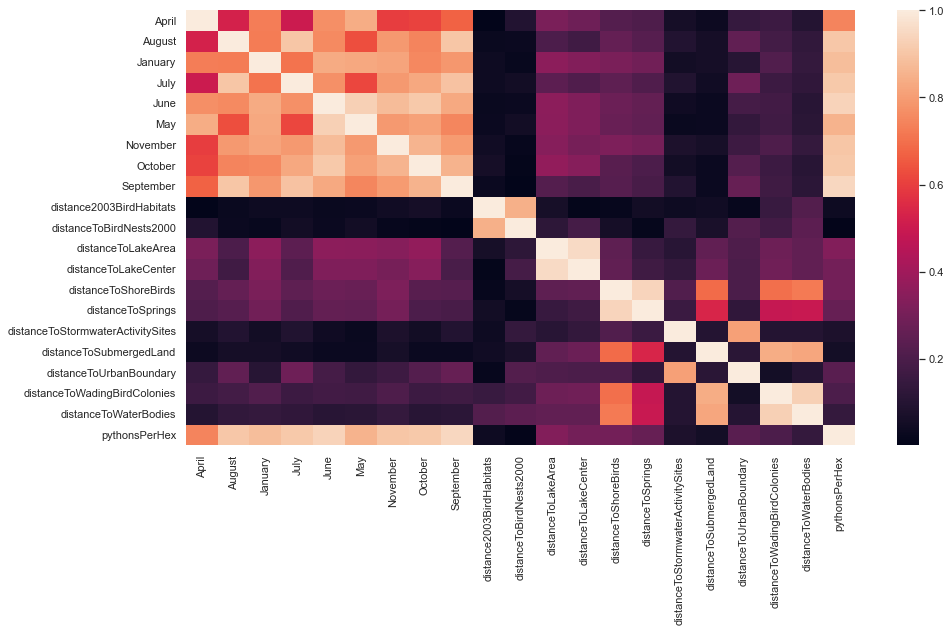

In [247]:
heatmap(absHighPass(corrDf, 0.8),cmap="rocket")
show()

In [248]:
upper_tri = corrDf.where(np.triu(np.ones(corrDf.shape),k=1).astype(bool))
print(upper_tri)

                                   pythonsPerHex     April    August  \
pythonsPerHex                                NaN  0.744693  0.904080   
April                                        NaN       NaN  0.526368   
August                                       NaN       NaN       NaN   
December                                     NaN       NaN       NaN   
February                                     NaN       NaN       NaN   
...                                          ...       ...       ...   
distanceToStormwaterActivitySites            NaN       NaN       NaN   
distanceToWaterBodies                        NaN       NaN       NaN   
distanceToSubmergedLand                      NaN       NaN       NaN   
INCOME_Hex                                   NaN       NaN       NaN   
POP_Hex                                      NaN       NaN       NaN   

                                   December  February   January      July  \
pythonsPerHex                      0.767307  0.621689  0.8

In [249]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.80)]
print(to_drop)

['August', 'January', 'July', 'June', 'May', 'November', 'October', 'September', 'distance2003BirdHabitats', 'distanceToLakeCenter', 'distanceToSprings', 'distanceToStormwaterActivitySites', 'distanceToWaterBodies', 'distanceToSubmergedLand']


In [250]:
WIP2 = WIP2.drop(to_drop, axis = 1)

In [251]:
WIP2

,hex_id,geometry,pythonsPerHex,April,December,February,March,NAME,NAME_Alachua,NAME_Baker,...,ploverNestsPerHex,distanceToWadingBirdColonies,distanceToUrbanBoundary,distanceToUrbanCenter,distanceToLakeArea,distanceToRivers,distanceToFlowingWater,distanceTo1999WadingBirdRookeries,INCOME_Hex,POP_Hex
0,8544a90ffffffff,"POLYGON ((-9047559.298 3315401.843, -9040287.4...",1,0.0,0.0,1.0,0.0,Seminole,0.0,0.0,...,0,32134.474175,0.000000,16583.773009,1450.106090,12425.853283,238.281241,9285.694791,5933.141596,137810.634167
1,8544acd7fffffff,"POLYGON ((-8995410.077 3020283.100, -8988308.4...",1,0.0,0.0,0.0,0.0,Broward,0.0,0.0,...,0,34197.785093,43834.338766,55910.104053,13231.088202,10330.731782,72.556366,8340.088857,1617.916279,60010.026065
3,85441a23fffffff,"POLYGON ((-9193899.960 3309082.059, -9186583.7...",1,0.0,0.0,0.0,0.0,Hernando,0.0,0.0,...,0,132795.985316,2079.668057,14076.213586,5686.412736,36312.743016,3119.570999,4948.457266,4579.602802,36533.707993
4,8544ac9bfffffff,"POLYGON ((-9012127.741 3015360.604, -9005022.5...",9,0.0,0.0,3.0,2.0,Collier,0.0,0.0,...,0,37743.192411,50179.496956,55662.417073,8265.248034,26907.788061,5319.635138,5933.563997,1473.426672,10133.499028
6,8544ad77fffffff,"POLYGON ((-9075323.998 3203195.502, -9068100.4...",10,1.0,0.0,2.0,1.0,Polk,0.0,0.0,...,0,19717.623189,92.821905,2147.728675,882.898196,13711.441070,3839.062815,15491.609557,2103.553751,16103.624499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,85441363fffffff,"POLYGON ((-9090323.769 3077862.161, -9083159.3...",1,0.0,0.0,0.0,0.0,Lee,0.0,0.0,...,0,12770.976333,536.494371,23384.929960,15938.002727,1.711579,93.462530,8687.933101,3273.839181,54554.465198
630,8544ae97fffffff,"POLYGON ((-8924130.773 3057972.338, -8917037.0...",1,0.0,0.0,0.0,0.0,Palm Beach,0.0,0.0,...,0,6674.210963,0.000000,45563.432478,11537.705669,14881.147495,1644.193640,6669.711861,1353.285046,69340.156463
632,8544136bfffffff,"POLYGON ((-9073391.275 3082856.537, -9066230.0...",2,0.0,1.0,1.0,0.0,Hendry,0.0,0.0,...,0,30430.228259,6770.436001,12692.617855,2862.100822,2629.863177,570.819878,7812.606704,2625.818330,28496.367360
635,8544a8c3fffffff,"POLYGON ((-8946210.569 3153823.420, -8939059.2...",1,0.0,0.0,0.0,0.0,St. Lucie,0.0,0.0,...,0,28136.519302,0.000000,11716.395759,15884.742119,5222.280952,5001.735414,11468.085674,3999.925430,50047.897422


In [252]:
WIP2.to_file('WIP2.geojson', driver="GeoJSON")

C:\Users\gianl\miniconda3\envs\Capstone\lib\site-packages\geopandas\io\file.py:299: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
